In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import re

def separate_integers_letters(string):
    integers = ''.join(re.findall(r'\d+', string))
    letters = ''.join(re.findall(r'[a-zA-Z]+', string))
    return integers, letters

In [3]:
dico_encodage_position = {'E_Bleu': 0, 'E_Rouge': 0, 'L_Bleu': 1, 'L_Rouge': 1}
dico_encodage_dynamique = {'E_Bleu': 0, 'E_Rouge': 1, 'L_Bleu': 0, 'L_Rouge': 1}
print(dico_encodage_position)
print()
print(dico_encodage_dynamique)

{'E_Bleu': 0, 'E_Rouge': 0, 'L_Bleu': 1, 'L_Rouge': 1}

{'E_Bleu': 0, 'E_Rouge': 1, 'L_Bleu': 0, 'L_Rouge': 1}


In [4]:
import pandas as pd

def add_labels(df):

  for index, row in df.iterrows():
    station_name_parts = row['station_name'].split('/')
    position_dynamique = station_name_parts[2]
    position_dynamique_parts = position_dynamique.split('_')
    _, position = separate_integers_letters(position_dynamique_parts[1])
    dynamique = position_dynamique_parts[2]

    position_dynamique = position + '_' + dynamique

    df.loc[index, 'label_position'] = dico_encodage_position[position_dynamique]
    df.loc[index, 'label_dynamique'] = dico_encodage_dynamique[position_dynamique]

  return df

In [5]:
from sklearn.metrics import accuracy_score

def train_and_predict(model, X_train, y_train, X_test, y_test):
    # Entraîner le modèle sur l'ensemble de données d'entraînement
    model.fit(X_train, y_train)

    # Prédire les étiquettes sur l'ensemble de test
    y_pred = model.predict(X_test)

    # Calculer la précision du modèle
    accuracy = accuracy_score(y_test, y_pred)

    return (accuracy, y_pred)

# 1. Random Forest Classifier

Dossier Antras_Isard (15 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.82, 0.95, 0.98, 0.94, 0.9, 0.94, 1.0, 0.97, 0.98, 0.98, 0.98, 0.99, 0.97, 0.99, 1.0]
- Moyenne des précisions : 0.96
- Intervalle de confiance (à 95%) : [0.93, 0.98]
- Top 5 local des features : ['V32', 'V36', 'V93', 'V29', 'V24']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.68, 0.9, 0.97, 0.94, 0.93, 0.98, 0.92, 1.0, 1.0, 1.0, 0.92, 1.0, 1.0, 0.99, 1.0]
- Moyenne des précisions : 0.95
- Intervalle de confiance (à 95%) : [0.9, 0.99]
- Top 5 local des features : ['V34', 'V5', 'V74', 'V19', 'V78']



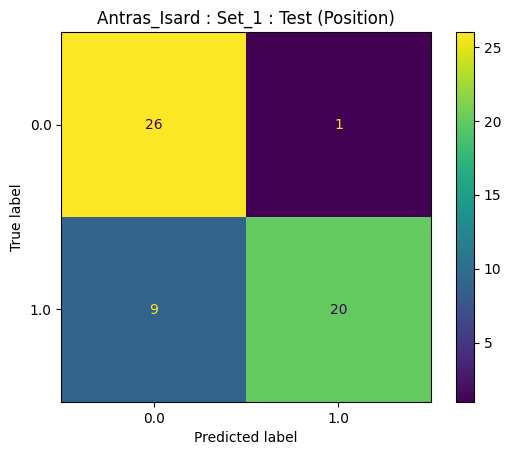

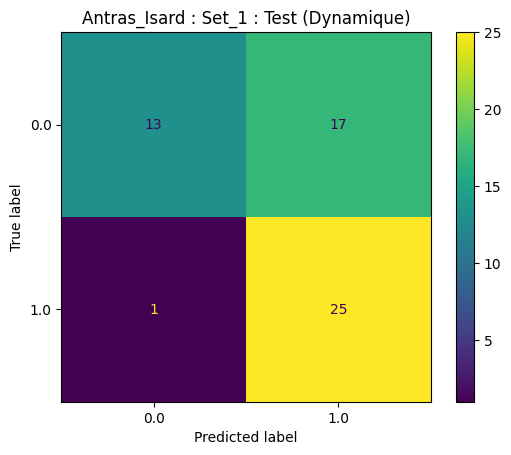



Dossier Appy_Etang_dAppy (8 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.84, 0.92, 0.93, 0.96, 0.95, 0.99, 0.98, 0.98]
- Moyenne des précisions : 0.94
- Intervalle de confiance (à 95%) : [0.9, 0.98]
- Top 5 local des features : ['V112', 'V39', 'V3', 'V33', 'V74']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.91, 0.91, 0.97, 0.97, 0.84, 0.97, 0.95, 0.88]
- Moyenne des précisions : 0.92
- Intervalle de confiance (à 95%) : [0.88, 0.96]
- Top 5 local des features : ['V36', 'V51', 'V52', 'V102', 'V100']



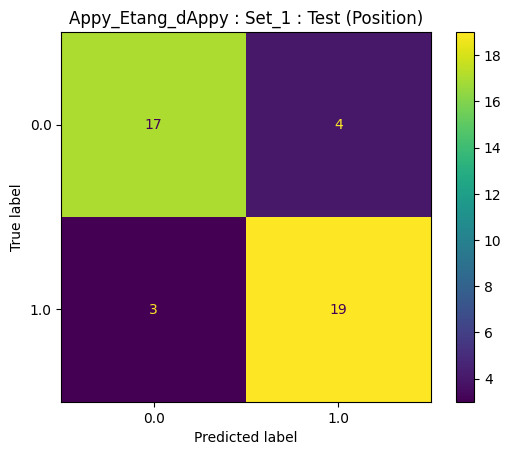

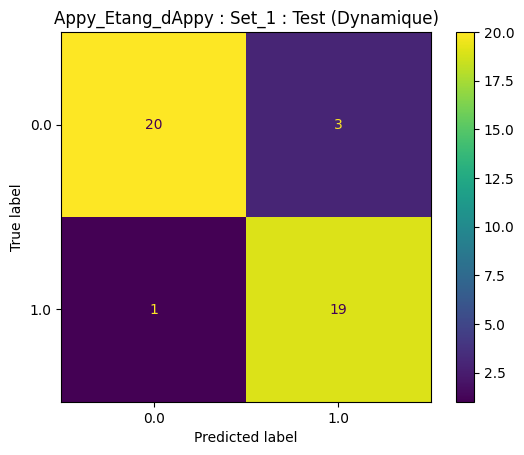



Dossier Arrien_Pic_Midi_Bordes (16 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.89, 0.89, 0.91, 0.85, 0.95, 0.89, 0.9, 0.89, 0.91, 0.93, 0.9, 0.93, 0.95, 0.95, 0.85, 0.85]
- Moyenne des précisions : 0.9
- Intervalle de confiance (à 95%) : [0.88, 0.92]
- Top 5 local des features : ['V39', 'V12', 'V58', 'V32', 'V114']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.91, 0.96, 0.91, 0.84, 0.83, 0.93, 0.84, 0.86, 0.93, 0.95, 0.93, 0.89, 0.89, 0.91, 0.94, 0.9]
- Moyenne des précisions : 0.9
- Intervalle de confiance (à 95%) : [0.88, 0.92]
- Top 5 local des features : ['V30', 'V107', 'V1', 'V53', 'V46']



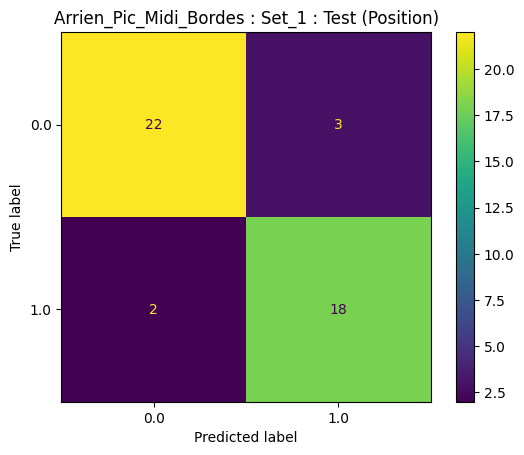

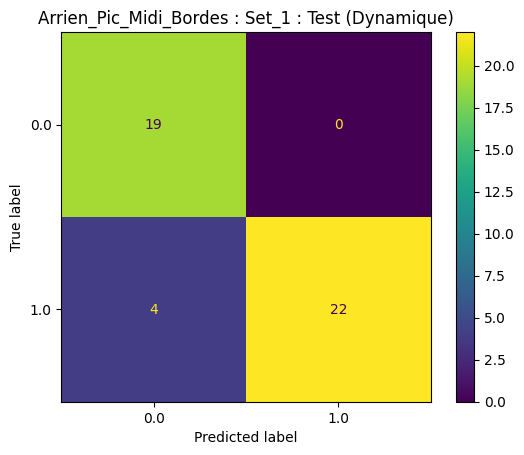



Dossier Ascou_Pailheres (4 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.92, 0.78, 0.91, 0.9]
- Moyenne des précisions : 0.88
- Intervalle de confiance (à 95%) : [0.77, 0.98]
- Top 5 local des features : ['V16', 'V23', 'V76', 'V3', 'V6']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.88, 0.83, 0.87, 0.78]
- Moyenne des précisions : 0.84
- Intervalle de confiance (à 95%) : [0.77, 0.91]
- Top 5 local des features : ['V19', 'V85', 'V114', 'V15', 'V12']



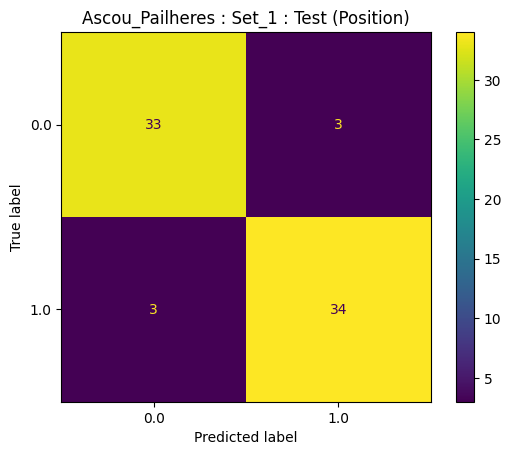

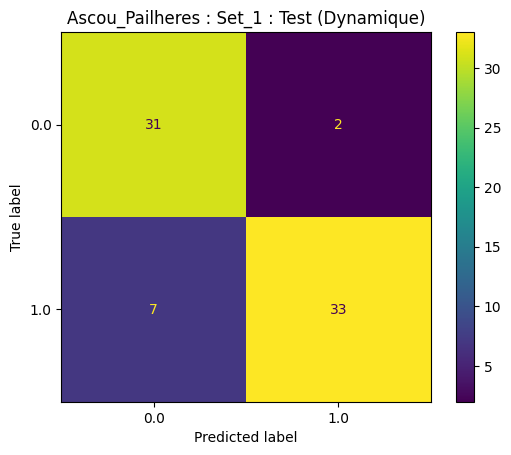



Dossier Aston_Plateau_de_Beille (7 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.98, 0.95, 0.91, 0.99, 0.97, 0.97, 0.97]
- Moyenne des précisions : 0.96
- Intervalle de confiance (à 95%) : [0.94, 0.99]
- Top 5 local des features : ['V49', 'V32', 'V12', 'V36', 'V40']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.96, 0.89, 0.97, 0.93, 0.89, 0.9, 0.94]
- Moyenne des précisions : 0.92
- Intervalle de confiance (à 95%) : [0.89, 0.96]
- Top 5 local des features : ['V85', 'V11', 'V43', 'V15', 'V104']



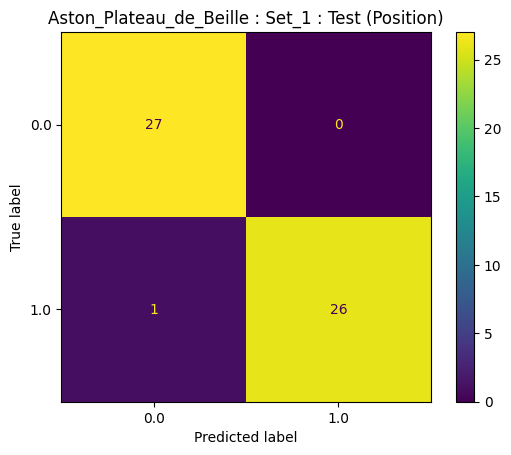

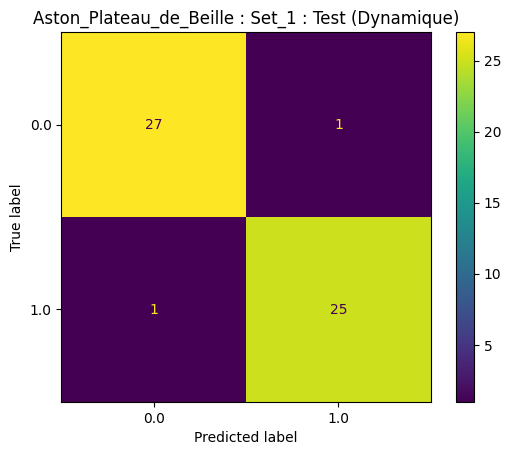



Dossier Aulus_Turon_Rose (8 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.98, 0.95, 0.95, 0.99, 0.98, 1.0, 0.97, 0.85]
- Moyenne des précisions : 0.96
- Intervalle de confiance (à 95%) : [0.92, 1.0]
- Top 5 local des features : ['V88', 'V24', 'V12', 'V34', 'V36']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.88, 0.77, 0.92, 0.93, 0.83, 0.83, 0.92, 0.94]
- Moyenne des précisions : 0.88
- Intervalle de confiance (à 95%) : [0.83, 0.93]
- Top 5 local des features : ['V20', 'V58', 'V105', 'V108', 'V74']



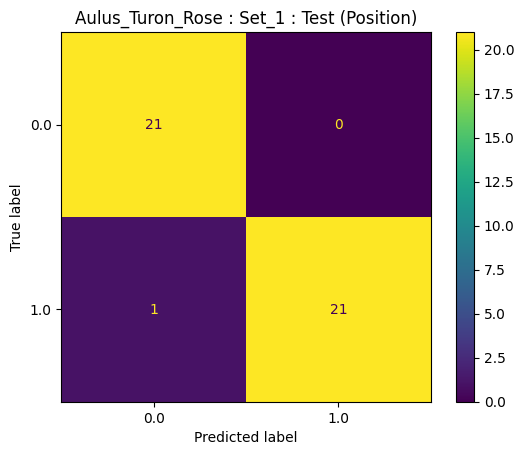

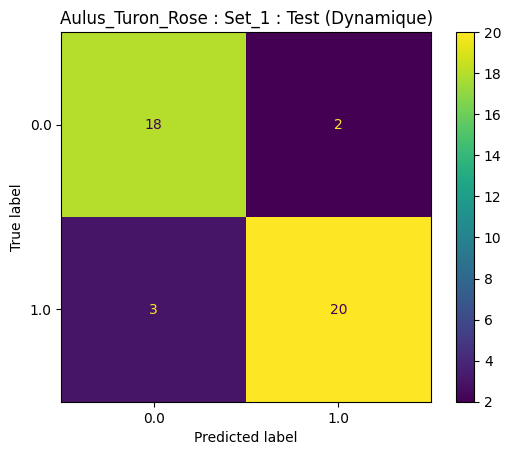



Dossier Bestiac_Trimouns (6 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.98, 0.96, 0.98, 0.97, 0.96, 0.9]
- Moyenne des précisions : 0.96
- Intervalle de confiance (à 95%) : [0.93, 0.99]
- Top 5 local des features : ['V49', 'V52', 'V40', 'V45', 'V12']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.87, 0.84, 0.89, 0.92, 0.87, 0.95]
- Moyenne des précisions : 0.89
- Intervalle de confiance (à 95%) : [0.85, 0.93]
- Top 5 local des features : ['V17', 'V19', 'V119', 'V29', 'V42']



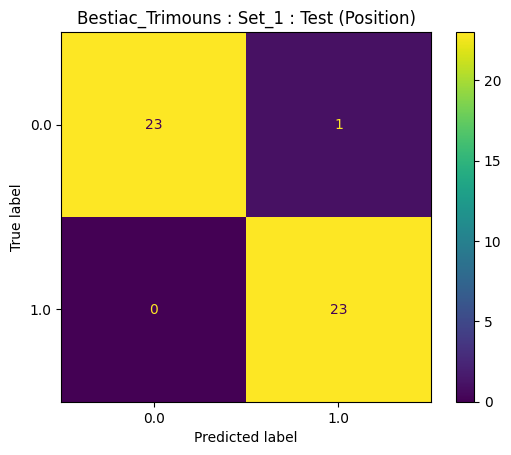

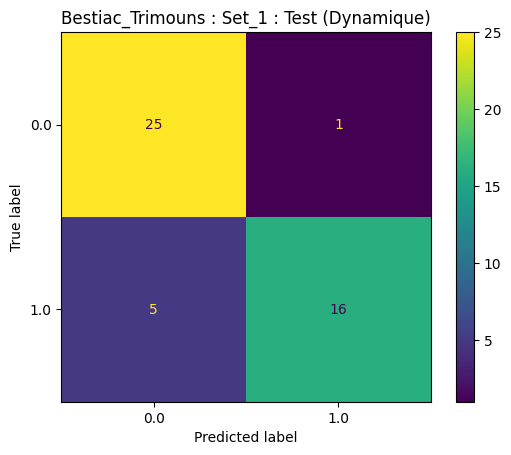



Dossier Bethmale_Ayet (5 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.95, 0.96, 0.99, 0.94, 1.0]
- Moyenne des précisions : 0.97
- Intervalle de confiance (à 95%) : [0.94, 1.0]
- Top 5 local des features : ['V12', 'V1', 'V21', 'V88', 'V34']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.7, 0.9, 0.83, 0.88, 0.97]
- Moyenne des précisions : 0.86
- Intervalle de confiance (à 95%) : [0.73, 0.98]
- Top 5 local des features : ['V3', 'V87', 'V75', 'V18', 'V33']



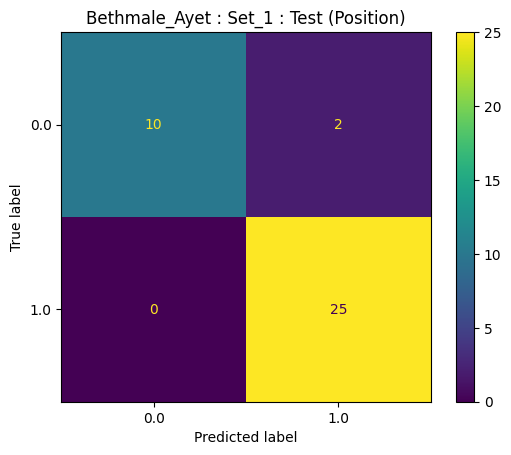

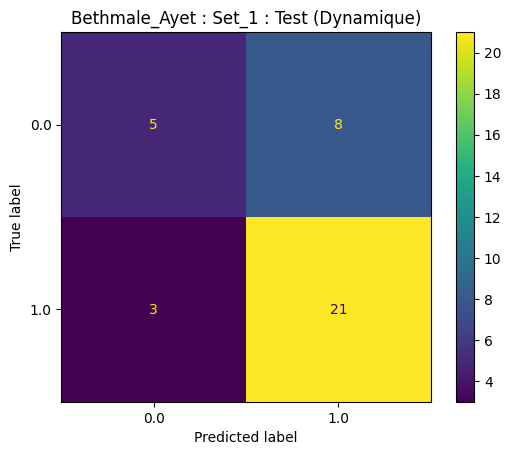



Dossier Bethmale_Eychelle (6 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.12, 0.27, 0.86, 0.93, 0.95, 0.94]
- Moyenne des précisions : 0.68
- Intervalle de confiance (à 95%) : [0.28, 1.08]
- Top 5 local des features : ['V12', 'V80', 'V62', 'V49', 'V52']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [1.0, 0.6, 0.72, 0.82, 0.91, 0.9]
- Moyenne des précisions : 0.82
- Intervalle de confiance (à 95%) : [0.67, 0.98]
- Top 5 local des features : ['V20', 'V99', 'V85', 'V6', 'V104']



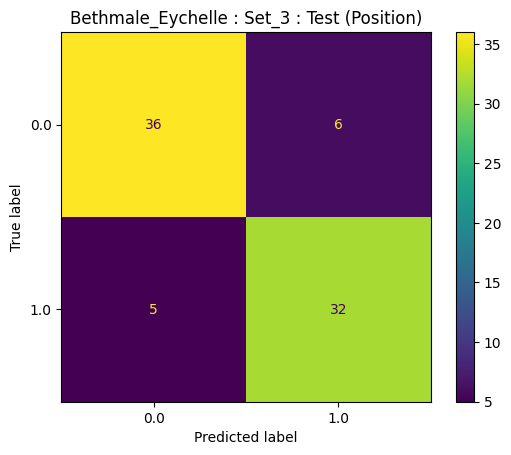

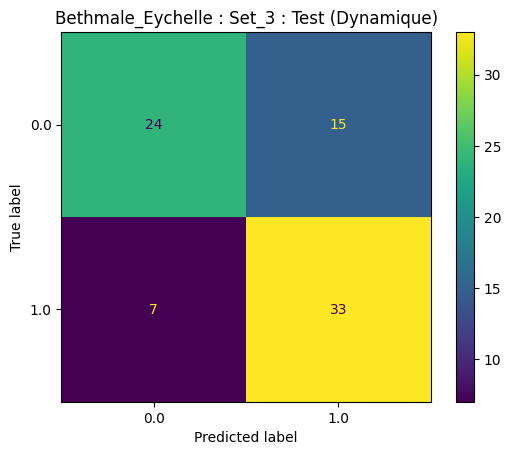



Dossier Bonac_Arech (9 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.78, 0.94, 0.94, 0.98, 0.91, 0.94, 0.98, 0.85, 0.88]
- Moyenne des précisions : 0.91
- Intervalle de confiance (à 95%) : [0.86, 0.96]
- Top 5 local des features : ['V12', 'V109', 'V52', 'V7', 'V71']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.84, 0.94, 0.88, 0.88, 0.85, 0.89, 0.93, 0.85, 0.98]
- Moyenne des précisions : 0.89
- Intervalle de confiance (à 95%) : [0.86, 0.93]
- Top 5 local des features : ['V33', 'V10', 'V47', 'V54', 'V56']



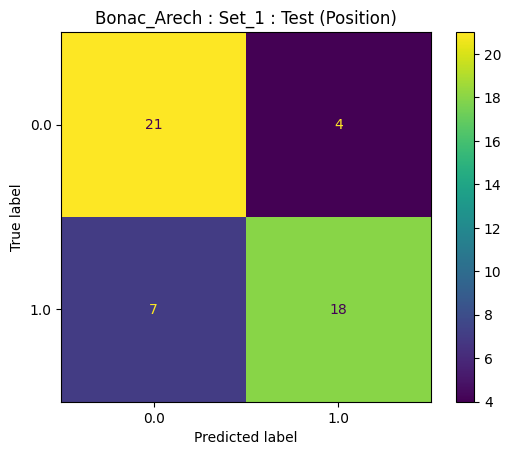

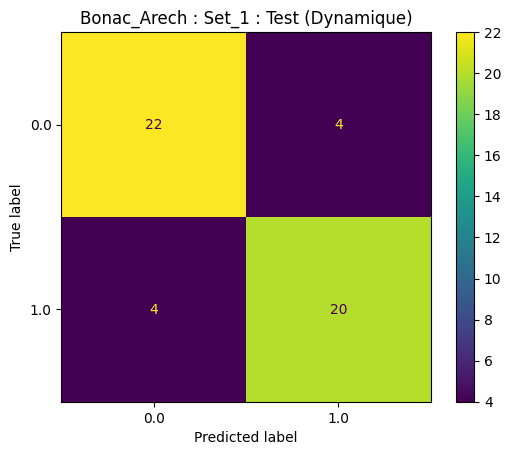



Dossier Bonac_Orle (8 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.92, 0.94, 0.87, 0.96, 0.97, 0.92, 0.94, 0.98]
- Moyenne des précisions : 0.94
- Intervalle de confiance (à 95%) : [0.91, 0.97]
- Top 5 local des features : ['V24', 'V4', 'V9', 'V90', 'V8']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.92, 0.91, 0.84, 0.93, 0.92, 0.94, 0.97, 0.99]
- Moyenne des précisions : 0.93
- Intervalle de confiance (à 95%) : [0.89, 0.96]
- Top 5 local des features : ['V64', 'V22', 'V72', 'V128', 'V29']



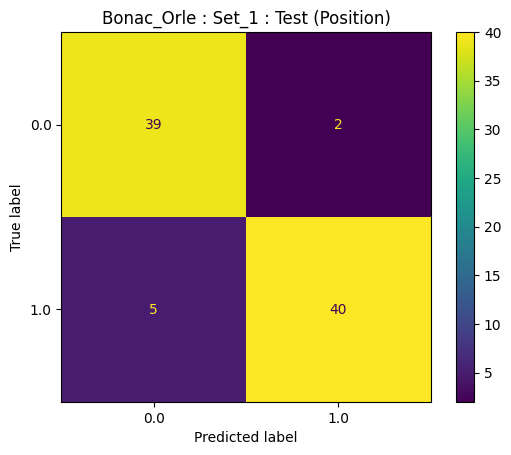

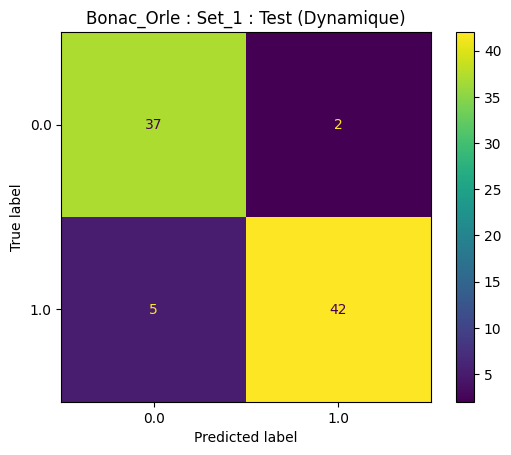



Dossier Couflens_Pouill (4 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.84, 0.95, 0.91, 1.0]
- Moyenne des précisions : 0.92
- Intervalle de confiance (à 95%) : [0.82, 1.03]
- Top 5 local des features : ['V32', 'V42', 'V36', 'V86', 'V67']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.95, 0.94, 0.95, 0.92]
- Moyenne des précisions : 0.94
- Intervalle de confiance (à 95%) : [0.92, 0.96]
- Top 5 local des features : ['V22', 'V9', 'V70', 'V65', 'V33']



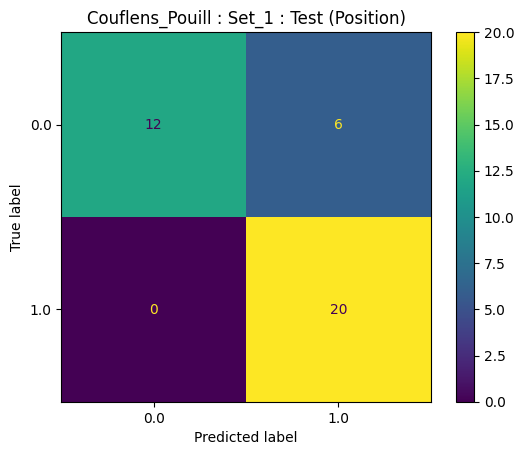

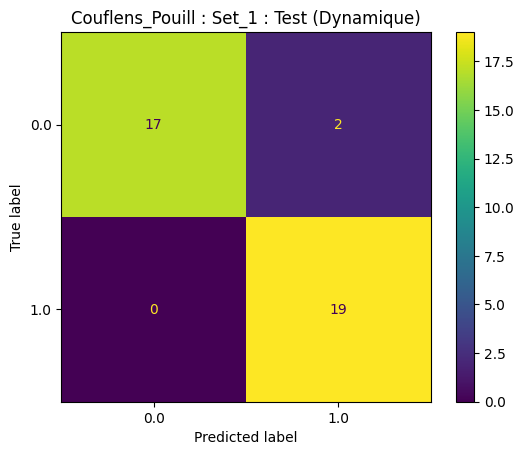



Dossier Couflens_Saubé (4 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.68, 0.76, 0.94, 0.92]
- Moyenne des précisions : 0.82
- Intervalle de confiance (à 95%) : [0.62, 1.03]
- Top 5 local des features : ['V54', 'V36', 'V59', 'V10', 'V53']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [1.0, 1.0, 1.0, 1.0]
- Moyenne des précisions : 1.0
- Intervalle de confiance (à 95%) : [1.0, 1.0]
- Top 5 local des features : ['V1', 'V2', 'V95', 'V94', 'V93']



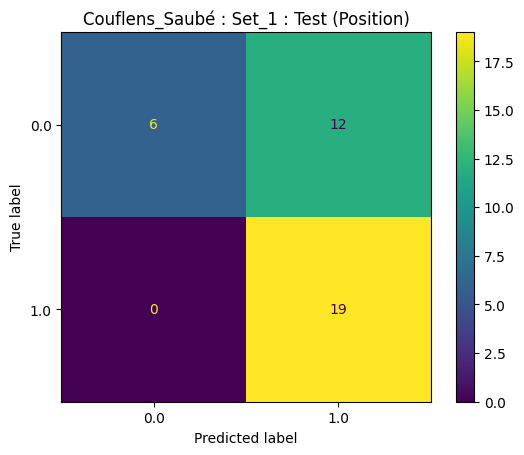

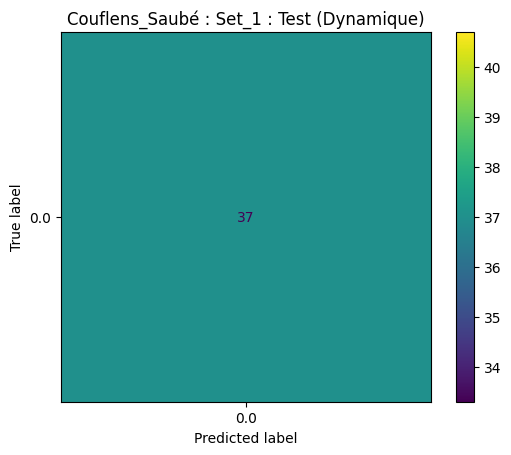



Dossier Formiguères_Serra_dels_Alarbs (16 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.8, 0.78, 0.92, 0.94, 0.95, 0.96, 0.96, 0.88, 0.95, 0.8, 0.91, 0.92, 0.98, 0.88, 0.92, 0.8]
- Moyenne des précisions : 0.9
- Intervalle de confiance (à 95%) : [0.86, 0.93]
- Top 5 local des features : ['V49', 'V34', 'V24', 'V40', 'V86']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.9, 0.84, 0.85, 0.88, 0.85, 0.94, 0.81, 0.83, 0.82, 0.77, 0.78, 0.77, 0.86, 0.77, 0.81, 0.65]
- Moyenne des précisions : 0.82
- Intervalle de confiance (à 95%) : [0.79, 0.86]
- Top 5 local des features : ['V87', 'V123', 'V26', 'V16', 'V55']



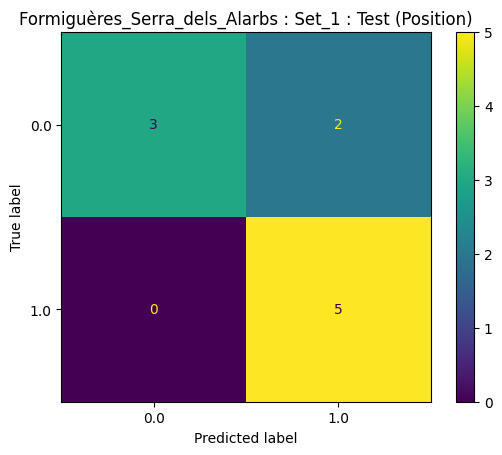

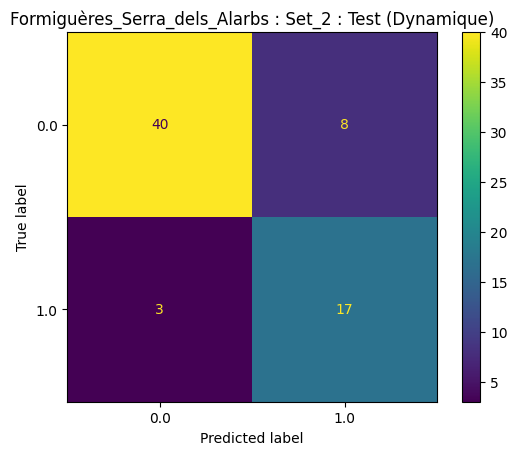



Dossier Gestiès_Col_du_Sasc (15 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.89, 0.92, 0.97, 1.0, 1.0, 1.0, 1.0, 0.95, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
- Moyenne des précisions : 0.98
- Intervalle de confiance (à 95%) : [0.96, 1.0]
- Top 5 local des features : ['V87', 'V11', 'V83', 'V62', 'V88']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [1.0, 0.94, 0.93, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.96, 0.88, 0.96, 0.96, 1.0]
- Moyenne des précisions : 0.97
- Intervalle de confiance (à 95%) : [0.95, 1.0]
- Top 5 local des features : ['V63', 'V9', 'V38', 'V16', 'V46']



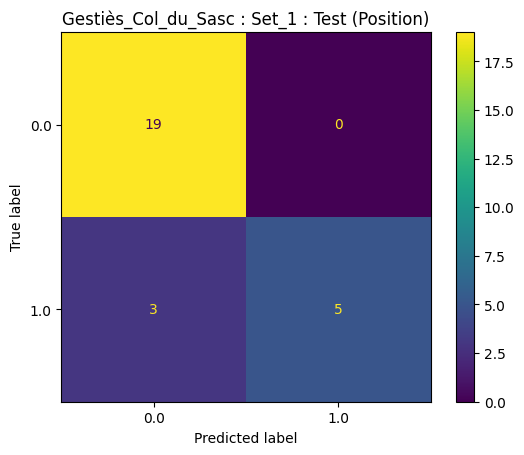

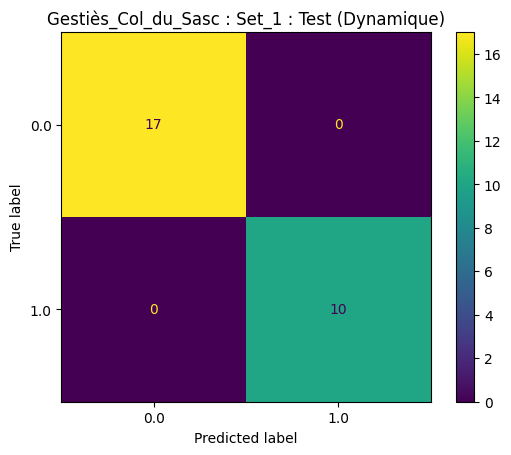



Dossier Gestiès_Le_Clot (8 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [1.0, 0.98, 1.0, 1.0, 0.98, 0.99, 0.98, 0.96]
- Moyenne des précisions : 0.99
- Intervalle de confiance (à 95%) : [0.98, 1.0]
- Top 5 local des features : ['V62', 'V108', 'V49', 'V36', 'V34']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [1.0, 0.89, 0.89, 0.92, 0.92, 0.85, 0.88, 0.89]
- Moyenne des précisions : 0.9
- Intervalle de confiance (à 95%) : [0.87, 0.94]
- Top 5 local des features : ['V87', 'V50', 'V44', 'V76', 'V33']



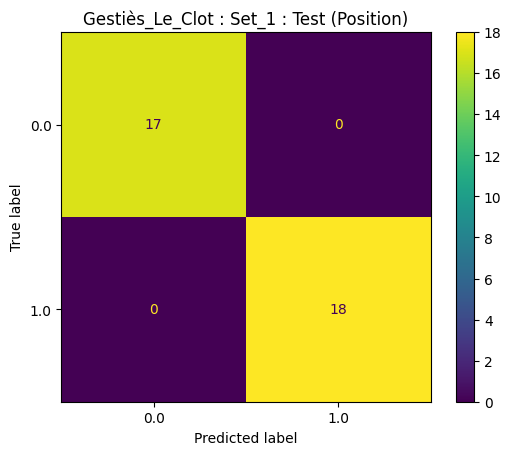

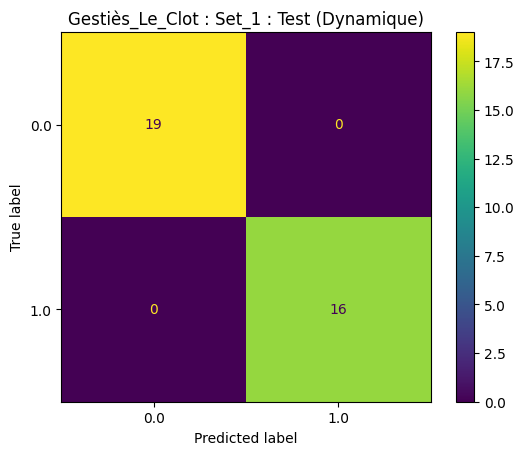



Dossier Goulier_Val_de_Sos (4 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.9, 0.82, 0.95, 0.98]
- Moyenne des précisions : 0.91
- Intervalle de confiance (à 95%) : [0.81, 1.02]
- Top 5 local des features : ['V42', 'V39', 'V4', 'V24', 'V57']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.75, 0.71, 0.85, 0.97]
- Moyenne des précisions : 0.82
- Intervalle de confiance (à 95%) : [0.63, 1.0]
- Top 5 local des features : ['V47', 'V85', 'V76', 'V22', 'V68']



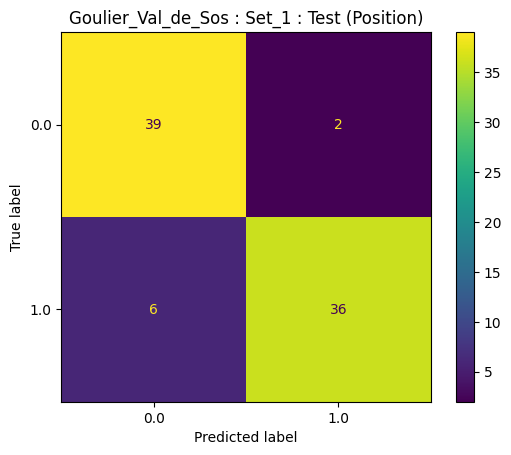

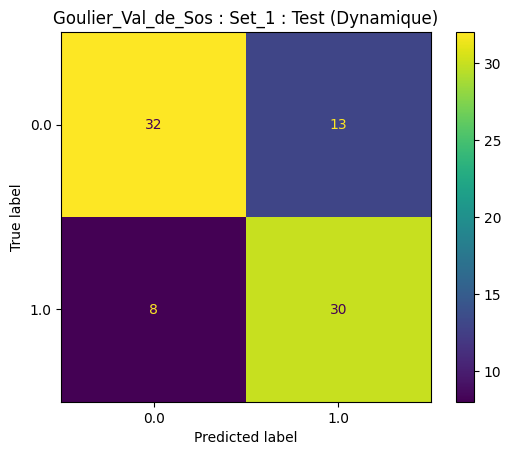



Dossier Lercoul_Col_de_Grail (14 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [1.0, 0.96, 0.92, 0.96, 0.96, 0.88, 1.0, 0.87, 0.94, 0.97, 0.89, 0.97, 0.96, 0.94]
- Moyenne des précisions : 0.94
- Intervalle de confiance (à 95%) : [0.92, 0.97]
- Top 5 local des features : ['V106', 'V71', 'V34', 'V88', 'V10']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.77, 0.71, 0.88, 0.83, 0.5, 0.79, 1.0, 0.67, 0.69, 0.82, 0.78, 0.79, 0.71, 0.76]
- Moyenne des précisions : 0.76
- Intervalle de confiance (à 95%) : [0.7, 0.83]
- Top 5 local des features : ['V123', 'V96', 'V77', 'V54', 'V42']



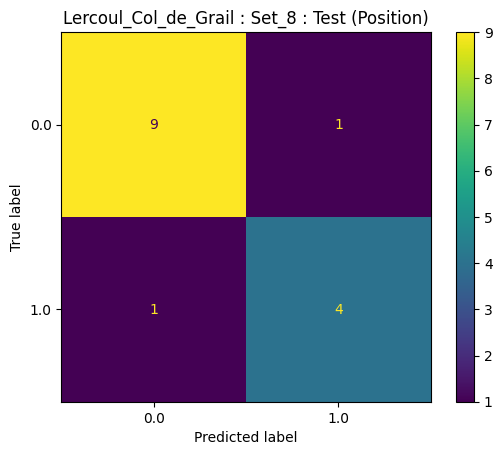

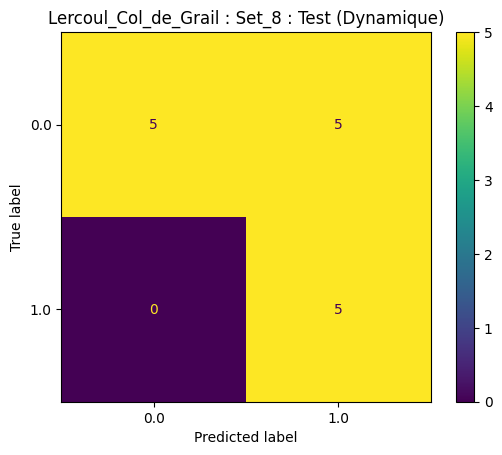



Dossier Les_Angles_Puig_del_Pam (16 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.86, 0.9, 0.8, 0.86, 0.88, 0.84, 0.91, 0.84, 0.97, 0.95, 0.98, 0.97, 0.96, 0.97, 0.88, 1.0]
- Moyenne des précisions : 0.91
- Intervalle de confiance (à 95%) : [0.88, 0.94]
- Top 5 local des features : ['V40', 'V49', 'V24', 'V80', 'V12']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.72, 0.68, 0.71, 0.73, 0.66, 0.72, 0.76, 0.76, 0.9, 0.86, 0.86, 0.89, 0.91, 0.81, 0.85, 0.81]
- Moyenne des précisions : 0.79
- Intervalle de confiance (à 95%) : [0.75, 0.83]
- Top 5 local des features : ['V26', 'V17', 'V57', 'V75', 'V3']



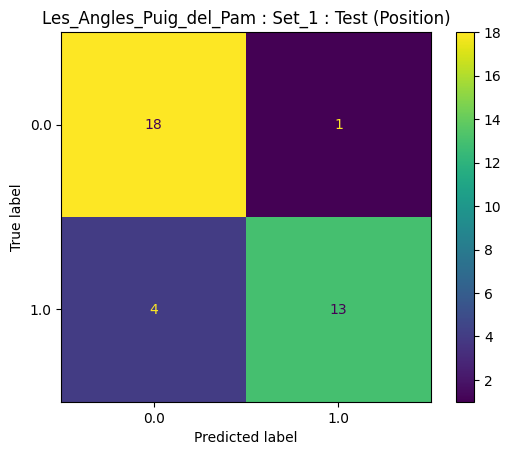

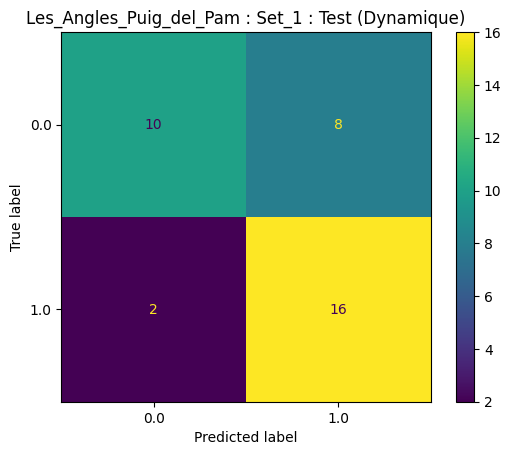



Dossier Les_Angles_Roc_dAude (17 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.69, 0.8, 0.82, 0.9, 0.93, 0.81, 0.82, 0.68, 0.83, 0.86, 0.89, 0.89, 0.84, 0.9, 0.83, 0.9, 0.83]
- Moyenne des précisions : 0.84
- Intervalle de confiance (à 95%) : [0.8, 0.87]
- Top 5 local des features : ['V19', 'V104', 'V4', 'V86', 'V32']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.88, 0.62, 0.64, 0.78, 0.76, 0.76, 0.67, 0.68, 0.8, 0.82, 0.86, 0.84, 0.88, 0.87, 0.74, 0.81, 0.72]
- Moyenne des précisions : 0.77
- Intervalle de confiance (à 95%) : [0.73, 0.82]
- Top 5 local des features : ['V18', 'V91', 'V73', 'V103', 'V15']



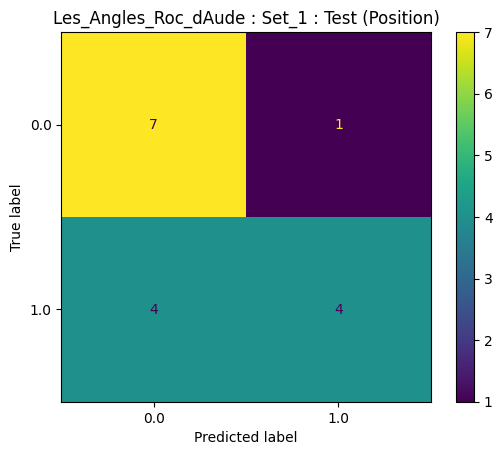

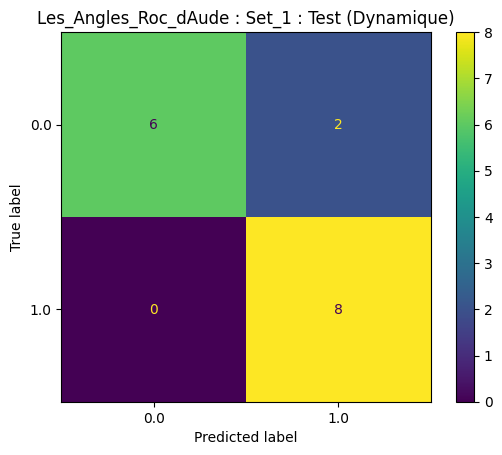



Dossier Merens_Comte (27 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.81, 0.89, 0.93, 0.91, 0.87, 0.98, 0.93, 0.91, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.58, 1.0, 1.0]
- Moyenne des précisions : 0.96
- Intervalle de confiance (à 95%) : [0.92, 0.99]
- Top 5 local des features : ['V6', 'V75', 'V101', 'V13', 'V3']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.97, 0.98, 0.99, 0.93, 0.91, 0.96, 1.0, 0.91, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.96, 1.0, 1.0, 0.96, 1.0, 0.96, 1.0, 0.96, 1.0, 1.0]
- Moyenne des précisions : 0.98
- Intervalle de confiance (à 95%) : [0.97, 0.99]
- Top 5 local des features : ['V65', 'V47', 'V87', 'V99', 'V10']



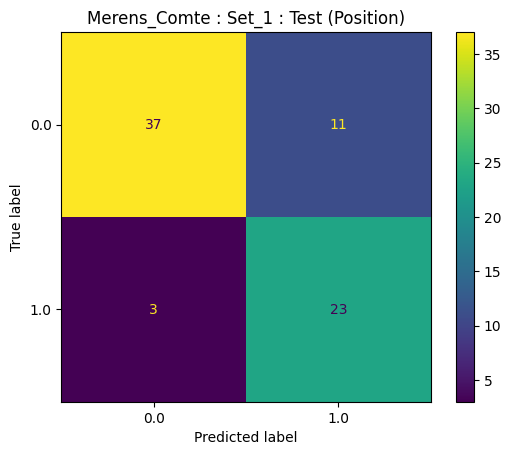

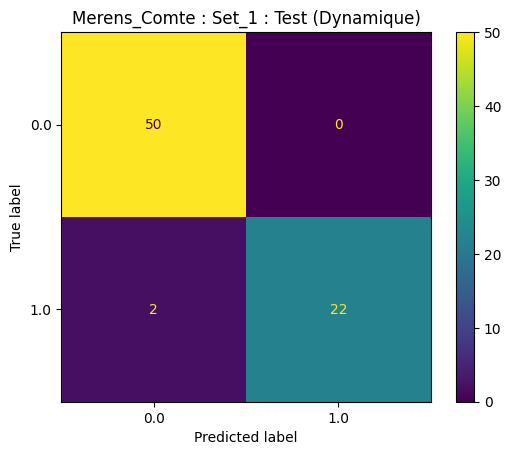



Dossier Miglos_Pla_de_Montcamp (7 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.89, 0.94, 0.89, 0.85, 0.89, 0.9, 0.9]
- Moyenne des précisions : 0.89
- Intervalle de confiance (à 95%) : [0.87, 0.92]
- Top 5 local des features : ['V115', 'V10', 'V14', 'V74', 'V108']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.85, 0.89, 0.9, 0.91, 0.88, 0.8, 0.93]
- Moyenne des précisions : 0.88
- Intervalle de confiance (à 95%) : [0.84, 0.92]
- Top 5 local des features : ['V19', 'V87', 'V119', 'V114', 'V16']



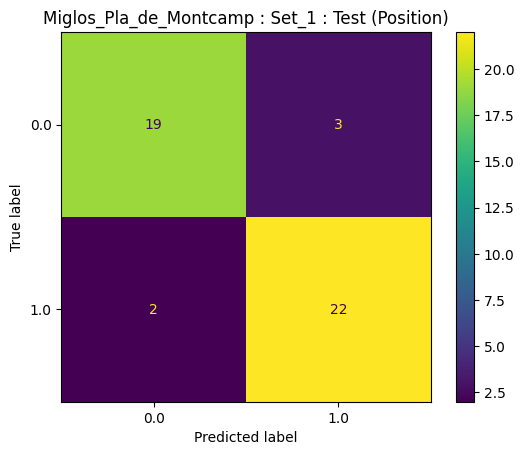

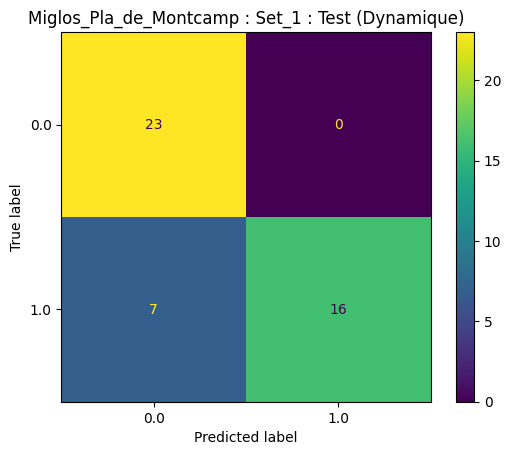



Dossier Mijanes_Estagnet (7 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.92, 0.88, 0.81, 0.79, 0.9, 0.72, 0.73]
- Moyenne des précisions : 0.82
- Intervalle de confiance (à 95%) : [0.75, 0.9]
- Top 5 local des features : ['V88', 'V76', 'V87', 'V29', 'V64']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.88, 0.89, 0.76, 0.81, 0.77, 0.81, 0.66]
- Moyenne des précisions : 0.8
- Intervalle de confiance (à 95%) : [0.72, 0.87]
- Top 5 local des features : ['V26', 'V63', 'V114', 'V87', 'V62']



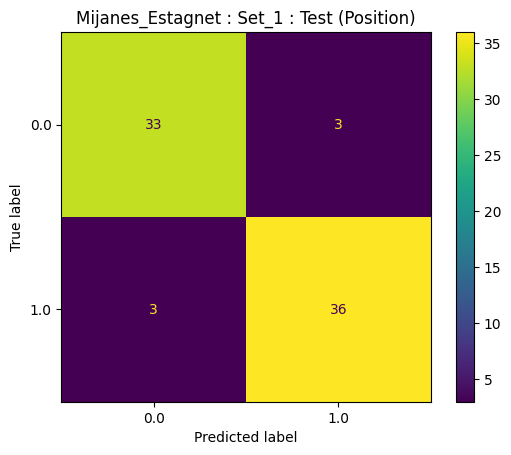

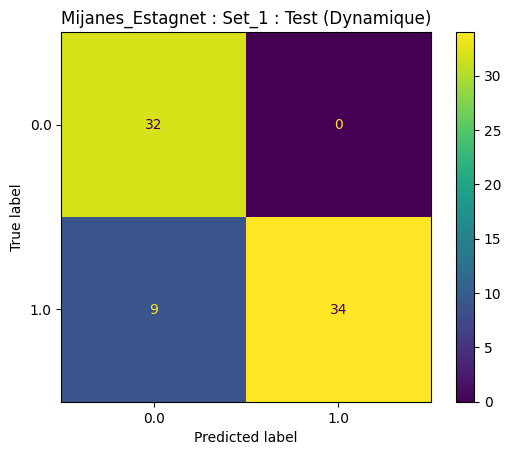



Dossier Mijanes_Trabesses (5 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.76, 0.74, 0.81, 0.73, 0.73]
- Moyenne des précisions : 0.75
- Intervalle de confiance (à 95%) : [0.71, 0.8]
- Top 5 local des features : ['V110', 'V95', 'V28', 'V89', 'V49']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.78, 0.86, 0.92, 0.87, 0.93]
- Moyenne des précisions : 0.87
- Intervalle de confiance (à 95%) : [0.8, 0.95]
- Top 5 local des features : ['V20', 'V63', 'V43', 'V49', 'V38']



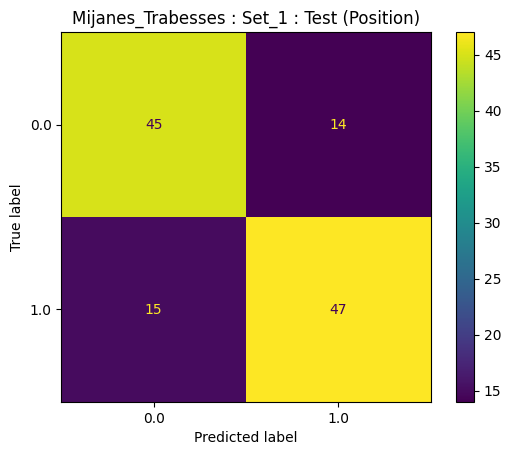

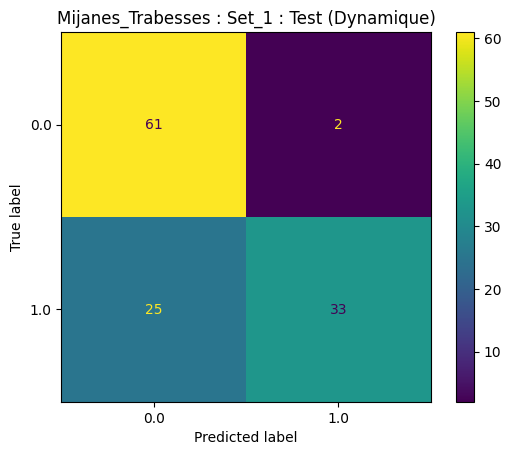



Dossier Montferrier_Mont_dOlmes (10 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.9, 0.97, 0.81, 0.8, 0.84, 0.79, 0.96, 0.76, 0.86, 0.86]
- Moyenne des précisions : 0.86
- Intervalle de confiance (à 95%) : [0.81, 0.91]
- Top 5 local des features : ['V88', 'V24', 'V29', 'V34', 'V68']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.88, 0.93, 0.8, 0.79, 0.87, 0.72, 0.95, 0.9, 0.82, 0.93]
- Moyenne des précisions : 0.86
- Intervalle de confiance (à 95%) : [0.8, 0.91]
- Top 5 local des features : ['V3', 'V77', 'V39', 'V16', 'V18']



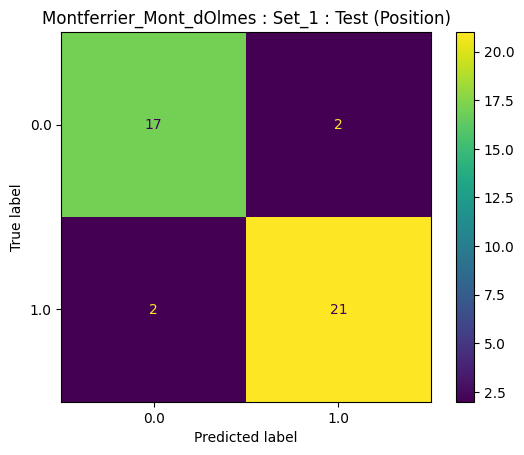

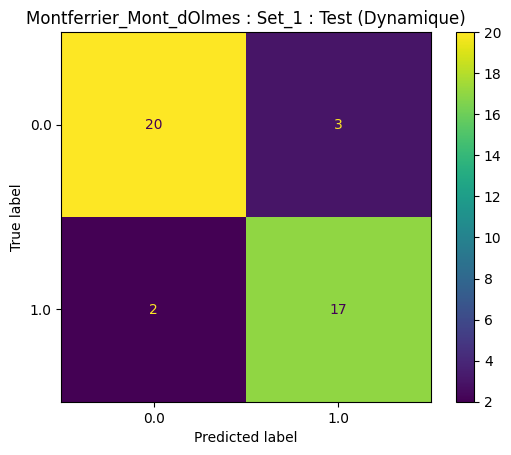



Dossier Montsegur_Frau (8 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.85, 0.81, 0.87, 0.85, 0.9, 0.92, 0.83, 1.0]
- Moyenne des précisions : 0.88
- Intervalle de confiance (à 95%) : [0.83, 0.93]
- Top 5 local des features : ['V57', 'V120', 'V124', 'V121', 'V83']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.63, 0.7, 0.69, 0.73, 0.82, 0.92, 0.92, 0.93]
- Moyenne des précisions : 0.79
- Intervalle de confiance (à 95%) : [0.69, 0.89]
- Top 5 local des features : ['V73', 'V57', 'V70', 'V120', 'V122']



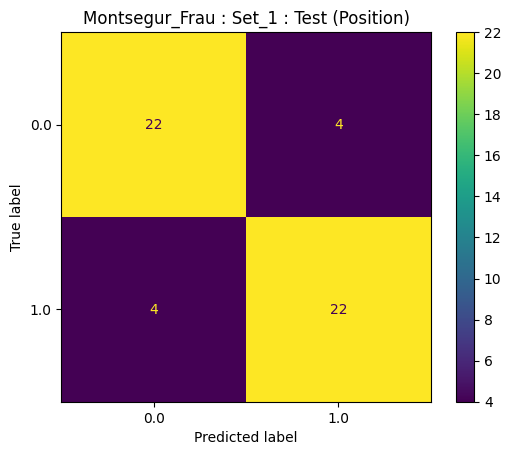

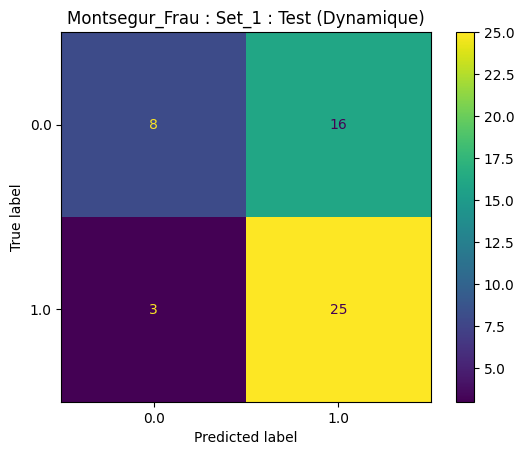



Dossier Montségur_Soularac (11 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.85, 0.9, 0.9, 0.92, 0.91, 0.92, 0.9, 0.85, 0.87, 0.78, 0.33]
- Moyenne des précisions : 0.83
- Intervalle de confiance (à 95%) : [0.72, 0.94]
- Top 5 local des features : ['V4', 'V36', 'V16', 'V29', 'V89']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.96, 0.98, 0.96, 0.98, 0.95, 0.94, 0.94, 0.97, 0.94, 0.77, 0.33]
- Moyenne des précisions : 0.89
- Intervalle de confiance (à 95%) : [0.76, 1.01]
- Top 5 local des features : ['V3', 'V87', 'V19', 'V106', 'V45']



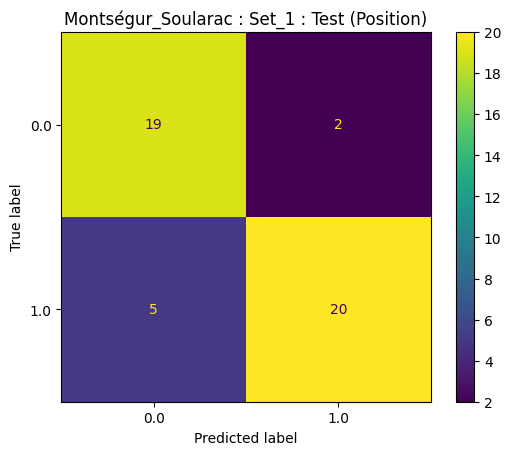

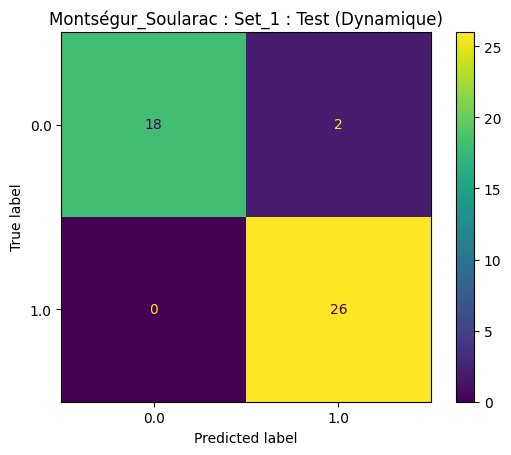



Dossier Orgeix_Coume (7 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.82, 0.82, 0.93, 0.94, 0.88, 1.0, 0.96]
- Moyenne des précisions : 0.91
- Intervalle de confiance (à 95%) : [0.84, 0.97]
- Top 5 local des features : ['V100', 'V118', 'V124', 'V17', 'V75']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.92, 0.93, 0.91, 0.9, 0.97, 0.98, 0.86]
- Moyenne des précisions : 0.92
- Intervalle de confiance (à 95%) : [0.88, 0.96]
- Top 5 local des features : ['V16', 'V64', 'V105', 'V93', 'V102']



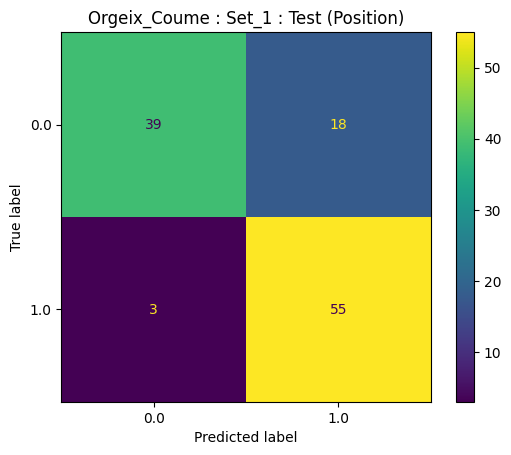

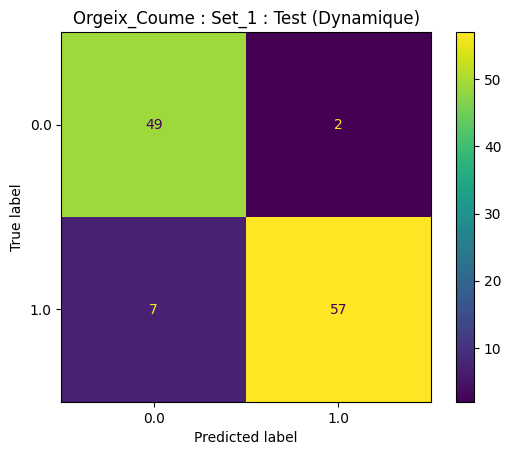



Dossier Orlu_RNCFS (23 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.87, 0.79, 0.85, 0.96, 1.0, 1.0, 1.0, 1.0, 0.94, 0.98, 0.96, 1.0, 1.0, 0.98, 1.0, 0.98, 1.0, 1.0, 0.98, 0.96, 1.0, 0.9, 1.0]
- Moyenne des précisions : 0.96
- Intervalle de confiance (à 95%) : [0.94, 0.99]
- Top 5 local des features : ['V56', 'V47', 'V67', 'V125', 'V122']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.93, 0.72, 0.8, 1.0, 0.98, 1.0, 0.93, 1.0, 1.0, 1.0, 1.0, 0.98, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 1.0]
- Moyenne des précisions : 0.97
- Intervalle de confiance (à 95%) : [0.94, 1.0]
- Top 5 local des features : ['V46', 'V37', 'V72', 'V23', 'V20']



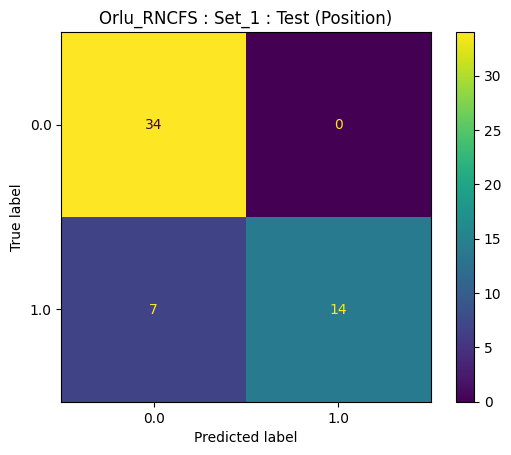

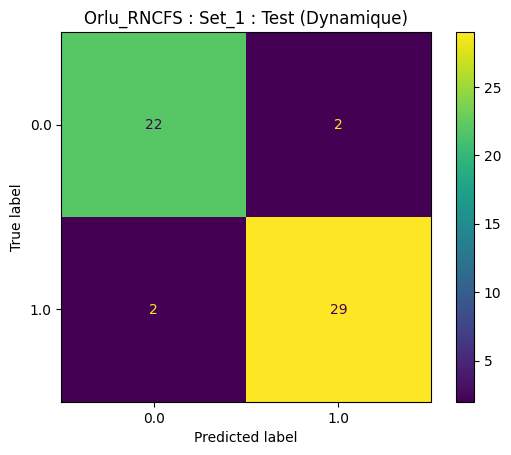



Dossier Saint-Lary_Herbe_Soulette (9 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.79, 0.86, 0.97, 1.0, 0.99, 0.99, 0.97, 0.88, 0.94]
- Moyenne des précisions : 0.93
- Intervalle de confiance (à 95%) : [0.87, 0.99]
- Top 5 local des features : ['V53', 'V21', 'V1', 'V34', 'V24']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.83, 0.87, 1.0, 0.99, 0.9, 0.96, 0.97, 0.9, 0.91]
- Moyenne des précisions : 0.93
- Intervalle de confiance (à 95%) : [0.88, 0.97]
- Top 5 local des features : ['V12', 'V79', 'V62', 'V97', 'V2']



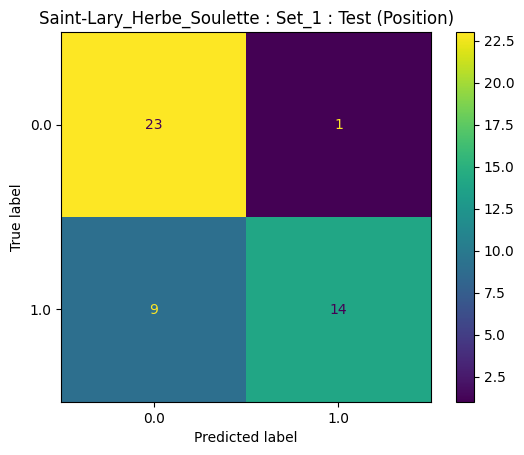

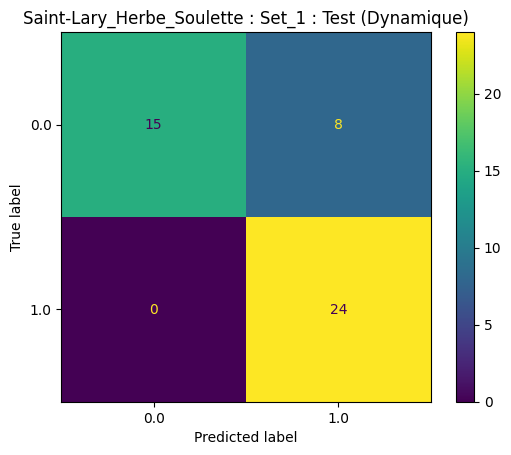



Dossier Seix_Col_de_Pause (4 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.97, 0.96, 0.96, 0.93]
- Moyenne des précisions : 0.96
- Intervalle de confiance (à 95%) : [0.93, 0.98]
- Top 5 local des features : ['V103', 'V52', 'V70', 'V90', 'V122']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [1.0, 0.98, 0.94, 0.92]
- Moyenne des précisions : 0.96
- Intervalle de confiance (à 95%) : [0.9, 1.02]
- Top 5 local des features : ['V26', 'V29', 'V72', 'V22', 'V99']



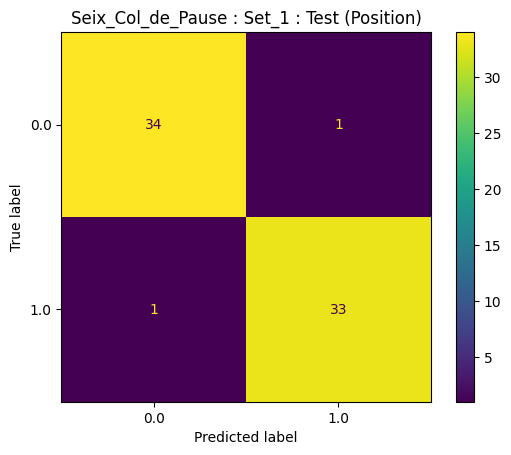

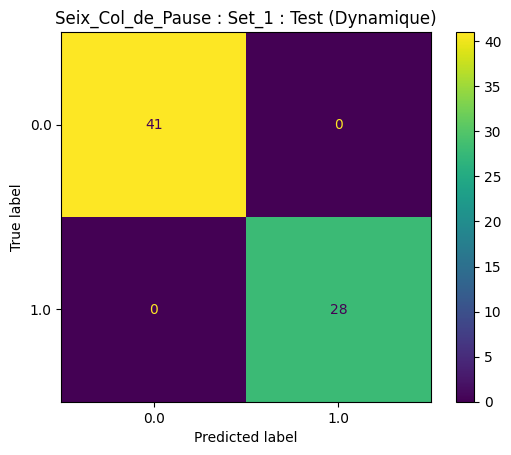



Dossier Seix_Pic_de_Montbuou (16 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.93, 0.95, 0.98, 0.95, 0.97, 1.0, 0.99, 0.95, 0.95, 0.97, 0.93, 0.95, 0.93, 0.98, 0.96, 0.93]
- Moyenne des précisions : 0.96
- Intervalle de confiance (à 95%) : [0.94, 0.97]
- Top 5 local des features : ['V100', 'V96', 'V62', 'V87', 'V110']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.98, 1.0, 1.0, 0.99, 0.98, 0.99, 1.0, 1.0, 0.97, 0.97, 0.97, 0.97, 1.0, 0.98, 1.0, 0.97]
- Moyenne des précisions : 0.98
- Intervalle de confiance (à 95%) : [0.98, 0.99]
- Top 5 local des features : ['V20', 'V16', 'V22', 'V49', 'V40']



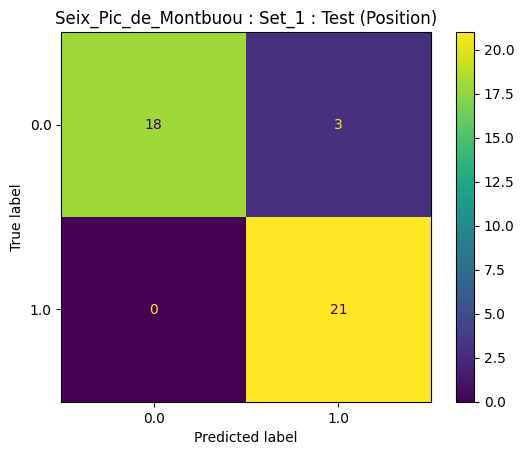

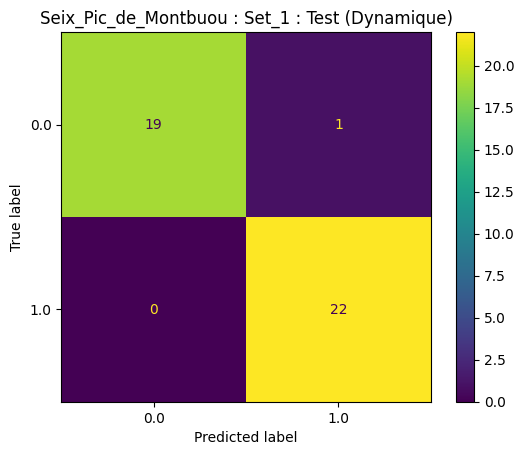



Dossier Sentein_Eylie (9 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.94, 0.96, 0.93, 0.9, 0.95, 0.88, 0.92, 0.89, 0.67]
- Moyenne des précisions : 0.89
- Intervalle de confiance (à 95%) : [0.82, 0.96]
- Top 5 local des features : ['V39', 'V42', 'V4', 'V127', 'V44']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.93, 0.93, 0.92, 0.76, 0.92, 0.86, 0.89, 0.85, 0.67]
- Moyenne des précisions : 0.86
- Intervalle de confiance (à 95%) : [0.79, 0.93]
- Top 5 local des features : ['V86', 'V32', 'V30', 'V24', 'V38']



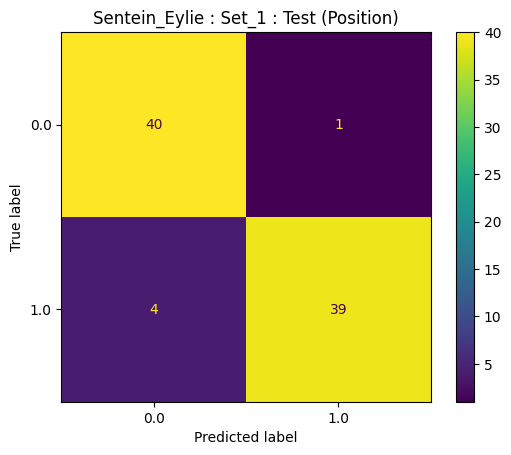

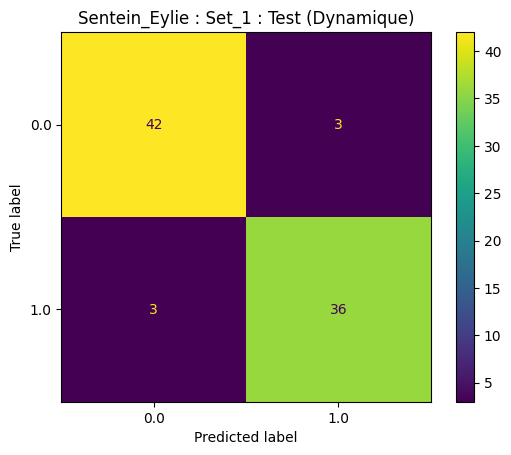



Dossier Ustou_Col_dEscots (14 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.95, 1.0, 0.99, 0.97, 0.98, 0.98, 0.99, 0.99, 0.98, 0.96, 0.96, 0.93, 0.98, 0.96]
- Moyenne des précisions : 0.97
- Intervalle de confiance (à 95%) : [0.96, 0.98]
- Top 5 local des features : ['V71', 'V34', 'V123', 'V91', 'V36']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.95, 0.99, 1.0, 1.0, 0.99, 0.96, 0.99, 1.0, 0.98, 0.98, 0.91, 0.94, 0.94, 0.98]
- Moyenne des précisions : 0.97
- Intervalle de confiance (à 95%) : [0.95, 0.99]
- Top 5 local des features : ['V87', 'V44', 'V29', 'V121', 'V52']



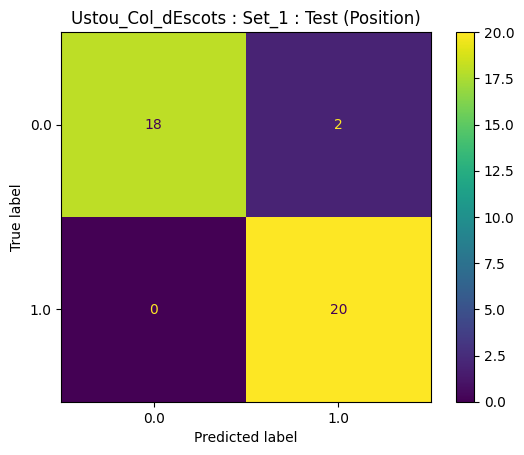

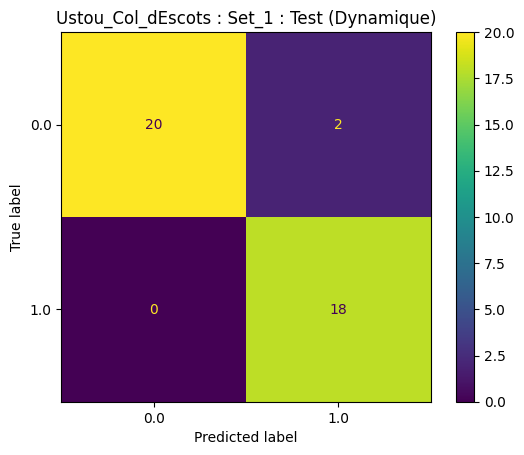



Dossier Ustou_Guzet-Neige (5 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.84, 0.93, 0.9, 0.92, 0.98]
- Moyenne des précisions : 0.91
- Intervalle de confiance (à 95%) : [0.85, 0.97]
- Top 5 local des features : ['V44', 'V36', 'V88', 'V59', 'V64']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [1.0, 1.0, 1.0, 1.0, 1.0]
- Moyenne des précisions : 1.0
- Intervalle de confiance (à 95%) : [1.0, 1.0]
- Top 5 local des features : ['V1', 'V2', 'V95', 'V94', 'V93']



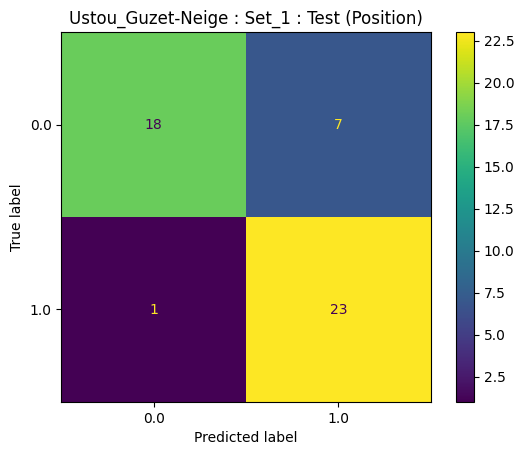

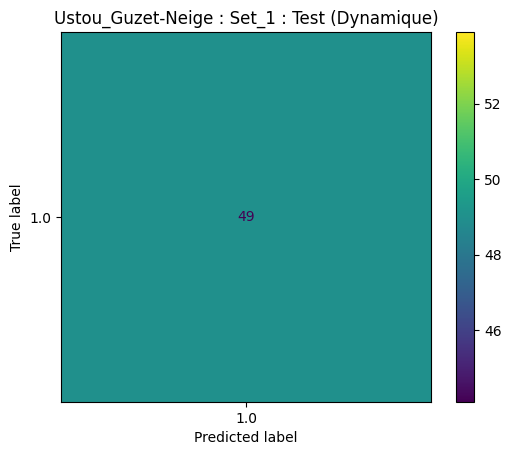



Dossier Valcebollère_Pla_des_Salines (17 cross validation) :

Random Forest Classifier : Position :
- Précisions sur les ensembles de test : [0.6, 0.68, 0.82, 0.75, 0.72, 0.7, 0.83, 0.81, 0.77, 0.72, 0.79, 0.83, 0.76, 0.78, 0.79, 0.74, 1.0]
- Moyenne des précisions : 0.77
- Intervalle de confiance (à 95%) : [0.73, 0.81]
- Top 5 local des features : ['V20', 'V22', 'V93', 'V63', 'V68']

Random Forest Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.8, 0.89, 0.83, 0.79, 0.85, 0.86, 0.82, 0.83, 0.83, 0.79, 0.75, 0.83, 0.86, 0.93, 1.0, 0.95, 1.0]
- Moyenne des précisions : 0.86
- Intervalle de confiance (à 95%) : [0.82, 0.9]
- Top 5 local des features : ['V68', 'V105', 'V20', 'V96', 'V33']



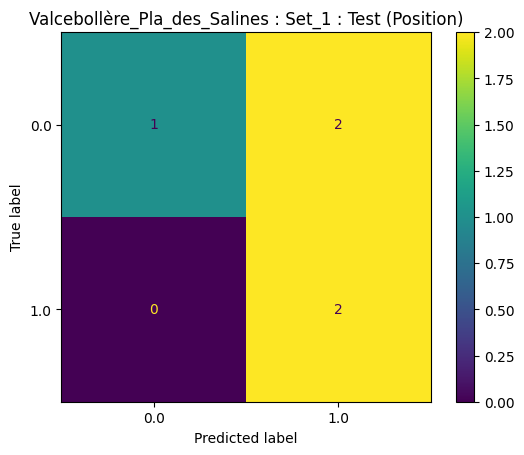

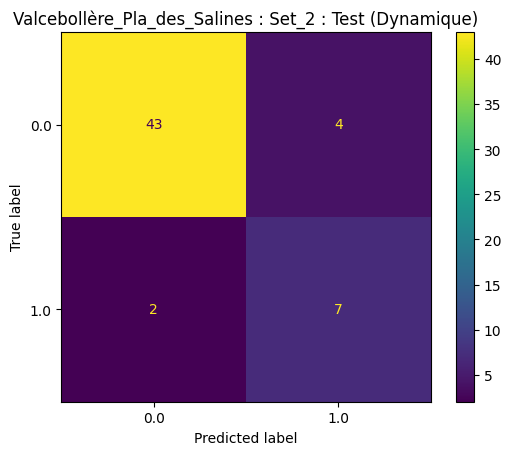



GLOBAL (36 stations) :

Random Forest Classifier : Position :
- Moyenne globale des précisions : 0.9
- Intervalle de confiance global (à 95%) : [0.88, 0.93]
- Top 5 global des features : [('V36', 9), ('V24', 8), ('V12', 8), ('V34', 8), ('V49', 7)]

Random Forest Classifier : Dynamique :
- Moyenne globale des précisions : 0.89
- Intervalle de confiance global (à 95%) : [0.87, 0.91]
- Top 5 global des features : [('V87', 8), ('V20', 6), ('V16', 6), ('V19', 5), ('V33', 5)]


In [6]:
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
import numpy as np
from scipy import stats

# Chemin vers le répertoire contenant les dossiers de données sur Google Drive
data_directory = "/content/gdrive/MyDrive/ListenToTheWild/vggish_cross_validation_par_site"

# Liste des dossiers dans le répertoire
directories = sorted(os.listdir(data_directory))

# Initialisation du dictionnaire
main_dico = {}
for key in directories:
    main_dico[key] = {
        'list_acc': [],
        'mean_acc': 0,
        'mean_confidence_interval': (0, 0),
        'top_5_features_lists': [],
        'local_top_5_features': [],
        'conf_mat': np.array([]),
        'title_conf_mat': None,
        'list_acc_bis': [],
        'mean_acc_bis': 0,
        'mean_confidence_interval_bis': (0, 0),
        'top_5_features_lists_bis': [],
        'local_top_5_features_bis': [],
        'conf_mat_bis': np.array([]),
        'title_conf_mat_bis': None
    }
# Boucle sur chaque dossier
for directory in directories:
  # Chemin vers le dossier contenant les sous-dossiers de données sur Google Drive
  sub_data_directory = "/content/gdrive/MyDrive/ListenToTheWild/vggish_cross_validation_par_site/"+directory

  # Liste des sous-dossiers dans le dossier
  sub_directories = sorted(os.listdir(sub_data_directory), key=lambda x: int(x.split('_')[1]))

  # Boucle sur chaque sous-dossier
  for sub_directory in sub_directories:
    # Chemin vers le sous-dossier contenant les fichiers de train/test
    sub_directory_path = os.path.join(sub_data_directory, sub_directory)

    # Charger les données d'entraînement
    train_data = pd.read_csv(os.path.join(sub_directory_path, f"{directory}_{sub_directory}_train.csv"))
    # Ajouter les labels
    train_data_with_labels = add_labels(train_data)
    # Supprimer les colonnes "station_name" et "file_name"
    train_data_with_labels = train_data_with_labels.drop(['station_name', 'file_name'], axis=1)
    # Créer X et y
    X_train = train_data_with_labels.drop(columns=['label_position', 'label_dynamique'])  # attributs
    y_train = train_data_with_labels['label_position']  # étiquettes
    y_train_bis = train_data_with_labels['label_dynamique']  # étiquettes

    # Charger les données de test
    test_data = pd.read_csv(os.path.join(sub_directory_path, f"{directory}_{sub_directory}_test.csv"))
    # Ajouter les labels
    test_data_with_labels = add_labels(test_data)
    # Supprimer les colonnes "station_name" et "file_name"
    test_data_with_labels = test_data_with_labels.drop(['station_name', 'file_name'], axis=1)
    # Créer X et y
    X_test = test_data_with_labels.drop(columns=['label_position', 'label_dynamique'])  # attributs
    y_test = test_data_with_labels['label_position']  # étiquettes
    y_test_bis = test_data_with_labels['label_dynamique']  # étiquettes

    # Créer le modèle
    rf_model = RandomForestClassifier()
    rf_model_bis = RandomForestClassifier()

    # Entraîner sur l'ensemble de train et prédire sur l'ensemble de test
    rf_accuracy, rf_y_pred = train_and_predict(rf_model, X_train, y_train, X_test, y_test)
    rf_accuracy_bis, rf_y_pred_bis = train_and_predict(rf_model_bis, X_train, y_train_bis, X_test, y_test_bis)

    # Ajouter la valeur de la précision au main_dico
    main_dico[directory]['list_acc'].append(rf_accuracy)
    main_dico[directory]['list_acc_bis'].append(rf_accuracy_bis)

    # Créer series contenant les importances des features du modèle et les noms des features à partir des données d'entraînement
    rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    rf_feature_importances_bis = pd.Series(rf_model_bis.feature_importances_, index=X_train.columns).sort_values(ascending=False)

    # Ajouter le top 5 des features au main_dico
    top_5_features = rf_feature_importances.head(5)
    list_top_5_features = top_5_features.index.tolist()
    main_dico[directory]['top_5_features_lists'].append(list_top_5_features)

    top_5_features_bis = rf_feature_importances_bis.head(5)
    list_top_5_features_bis = top_5_features_bis.index.tolist()
    main_dico[directory]['top_5_features_lists_bis'].append(list_top_5_features_bis)

    # Calculer une matrice de confusion par station (si toutes les classes)
    train_classes = list(rf_model.classes_)
    test_classes = list(set(y_test))
    if main_dico[directory]['conf_mat'].size == 0 and train_classes == test_classes:
      main_dico[directory]['conf_mat'] = confusion_matrix(y_test, rf_y_pred, labels=rf_model.classes_)
      main_dico[directory]['title_conf_mat'] = f"{directory} : {sub_directory} : Test"

    train_classes_bis = list(rf_model_bis.classes_)
    test_classes_bis = list(set(y_test_bis))
    if main_dico[directory]['conf_mat_bis'].size == 0 and train_classes_bis == test_classes_bis:
      main_dico[directory]['conf_mat_bis'] = confusion_matrix(y_test_bis, rf_y_pred_bis, labels=rf_model_bis.classes_)
      main_dico[directory]['title_conf_mat_bis'] = f"{directory} : {sub_directory} : Test"

  # Calculer la moyenne des précisions pour le site "directory"
  sample_data = main_dico[directory]['list_acc']
  sample_mean = np.mean(sample_data)
  main_dico[directory]['mean_acc'] = sample_mean

  sample_data_bis = main_dico[directory]['list_acc_bis']
  sample_mean_bis = np.mean(sample_data_bis)
  main_dico[directory]['mean_acc_bis'] = sample_mean_bis

  # Calculer l'intervalle de confiance de la moyenne pour le site "directory"
  # (Intervalle de confiance t de Student car moins de 30 échantillons)
  sample_std = np.std(sample_data, ddof=1)  # ddof=1 pour utiliser la formule non biaisée de l'écart-type
  n = len(sample_data)
  confidence_level = 0.95
  degrees_of_freedom = n - 1
  t_critical = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)
  margin_of_error = t_critical * (sample_std / np.sqrt(n))
  main_dico[directory]['mean_confidence_interval'] = (sample_mean - margin_of_error, sample_mean + margin_of_error)

  sample_std_bis = np.std(sample_data_bis, ddof=1)  # ddof=1 pour utiliser la formule non biaisée de l'écart-type
  n_bis = len(sample_data_bis)
  confidence_level_bis = 0.95
  degrees_of_freedom_bis = n_bis - 1
  t_critical_bis = stats.t.ppf((1 + confidence_level_bis) / 2, degrees_of_freedom_bis)
  margin_of_error_bis = t_critical_bis * (sample_std_bis / np.sqrt(n_bis))
  main_dico[directory]['mean_confidence_interval_bis'] = (sample_mean_bis - margin_of_error_bis, sample_mean_bis + margin_of_error_bis)

  # Calculer le top 5 local (pour le site "directory") des features
  all_features = [feature for sublist in main_dico[directory]['top_5_features_lists'] for feature in sublist]
  feature_counter = Counter(all_features)
  top_5_features_tuples = feature_counter.most_common(5)
  top_5_features_names = []
  for feature_tuple in top_5_features_tuples:
    top_5_features_names.append(feature_tuple[0])
  main_dico[directory]['local_top_5_features'] = top_5_features_names

  all_features_bis = [feature for sublist in main_dico[directory]['top_5_features_lists_bis'] for feature in sublist]
  feature_counter_bis = Counter(all_features_bis)
  top_5_features_tuples_bis = feature_counter_bis.most_common(5)
  top_5_features_names_bis = []
  for feature_tuple in top_5_features_tuples_bis:
    top_5_features_names_bis.append(feature_tuple[0])
  main_dico[directory]['local_top_5_features_bis'] = top_5_features_names_bis

  # Affichage des différents résultats
  print(f"Dossier {directory} ({len(sub_directories)} cross validation) :")
  print()
  print("Random Forest Classifier : Position :")
  rounded_list = [round(x, 2) for x in main_dico[directory]['list_acc']]
  print(f"- Précisions sur les ensembles de test : {rounded_list}")
  print(f"- Moyenne des précisions : {round(main_dico[directory]['mean_acc'], 2)}")
  rounded_confidence_interval = tuple(round(value, 2) for value in main_dico[directory]['mean_confidence_interval'])
  print(f"- Intervalle de confiance (à {int(confidence_level*100)}%) : [{rounded_confidence_interval[0]}, {rounded_confidence_interval[1]}]")
  print(f"- Top 5 local des features : {main_dico[directory]['local_top_5_features']}")
  print()
  print("Random Forest Classifier : Dynamique :")
  rounded_list_bis = [round(x, 2) for x in main_dico[directory]['list_acc_bis']]
  print(f"- Précisions sur les ensembles de test : {rounded_list_bis}")
  print(f"- Moyenne des précisions : {round(main_dico[directory]['mean_acc_bis'], 2)}")
  rounded_confidence_interval_bis = tuple(round(value, 2) for value in main_dico[directory]['mean_confidence_interval_bis'])
  print(f"- Intervalle de confiance (à {int(confidence_level_bis*100)}%) : [{rounded_confidence_interval_bis[0]}, {rounded_confidence_interval_bis[1]}]")
  print(f"- Top 5 local des features : {main_dico[directory]['local_top_5_features_bis']}")

  print()

  # Affichage de la matrice de confusion
  if main_dico[directory]['conf_mat'].size != 0:
    ConfusionMatrixDisplay(main_dico[directory]['conf_mat'], display_labels=rf_model.classes_).plot();
    plt.title(main_dico[directory]['title_conf_mat'] + " (Position)")
    plt.show()
  else:
    print("Pas de matrice de confusion présentant toutes les classes. (Position)")

  print()

  # Affichage de la matrice de confusion
  if main_dico[directory]['conf_mat_bis'].size != 0:
    ConfusionMatrixDisplay(main_dico[directory]['conf_mat_bis'], display_labels=rf_model_bis.classes_).plot();
    plt.title(main_dico[directory]['title_conf_mat_bis'] + " (Dynamique)")
    plt.show()
  else:
    print("Pas de matrice de confusion présentant toutes les classes. (Dynamique)")

  print()
  print("=======================================================================================================================================================")
  print()

# Calculer la moyenne globale des précisions sur tous les sites
global_list_acc = []
for key, value in main_dico.items():
    global_list_acc.append(value['mean_acc'])
global_mean_acc = np.mean(global_list_acc)

global_list_acc_bis = []
for key, value in main_dico.items():
    global_list_acc_bis.append(value['mean_acc_bis'])
global_mean_acc_bis = np.mean(global_list_acc_bis)

# Calculer l'intervalle de confiance de la moyenne globale
# (Intervalle de confiance z car plus de 30 échantillons)
sample_mean = global_mean_acc
sample_std = np.std(global_list_acc, ddof=1)  # ddof=1 pour utiliser la formule non biaisée de l'écart-type
n = len(global_list_acc)
confidence_level = 0.95
z_critical = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_critical * (sample_std / np.sqrt(n))
global_confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

sample_mean_bis = global_mean_acc_bis
sample_std_bis = np.std(global_list_acc_bis, ddof=1)  # ddof=1 pour utiliser la formule non biaisée de l'écart-type
n_bis = len(global_list_acc_bis)
confidence_level_bis = 0.95
z_critical_bis = stats.norm.ppf((1 + confidence_level_bis) / 2)
margin_of_error_bis = z_critical_bis * (sample_std_bis / np.sqrt(n_bis))
global_confidence_interval_bis = (sample_mean_bis - margin_of_error_bis, sample_mean_bis + margin_of_error_bis)

# Calculer le top 5 global des features
global_top_5_features_lists = []
for key, value in main_dico.items():
    global_top_5_features_lists.append(value['local_top_5_features'])
all_features = [feature for sublist in global_top_5_features_lists for feature in sublist]
feature_counter = Counter(all_features)
global_top_5_features = feature_counter.most_common(5)

global_top_5_features_lists_bis = []
for key, value in main_dico.items():
    global_top_5_features_lists_bis.append(value['local_top_5_features_bis'])
all_features_bis = [feature for sublist in global_top_5_features_lists_bis for feature in sublist]
feature_counter_bis = Counter(all_features_bis)
global_top_5_features_bis = feature_counter_bis.most_common(5)

# Affichage des différents résultats
print(f"GLOBAL ({len(directories)} stations) :")
print()
print("Random Forest Classifier : Position :")
print(f"- Moyenne globale des précisions : {round(global_mean_acc, 2)}")
rounded_global_confidence_interval = tuple(round(value, 2) for value in global_confidence_interval)
print(f"- Intervalle de confiance global (à {int(confidence_level*100)}%) : [{rounded_global_confidence_interval[0]}, {rounded_global_confidence_interval[1]}]")
print(f"- Top 5 global des features : {global_top_5_features}")
print()
print("Random Forest Classifier : Dynamique :")
print(f"- Moyenne globale des précisions : {round(global_mean_acc_bis, 2)}")
rounded_global_confidence_interval_bis = tuple(round(value, 2) for value in global_confidence_interval_bis)
print(f"- Intervalle de confiance global (à {int(confidence_level_bis*100)}%) : [{rounded_global_confidence_interval_bis[0]}, {rounded_global_confidence_interval_bis[1]}]")
print(f"- Top 5 global des features : {global_top_5_features_bis}")

# 2. MLP Classifier

Dossier Antras_Isard (15 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.89, 0.92, 0.99, 0.94, 0.9, 0.97, 0.92, 0.88, 0.93, 0.97, 0.95, 0.98, 0.95, 0.93, 0.97]
- Moyenne des précisions : 0.94
- Intervalle de confiance (à 95%) : [0.92, 0.96]
- Top 5 local des features : ['V124', 'V104', 'V18', 'V97', 'V23']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.75, 0.89, 0.93, 0.92, 0.94, 0.96, 0.92, 1.0, 1.0, 0.97, 0.93, 1.0, 0.91, 0.96, 0.97]
- Moyenne des précisions : 0.94
- Intervalle de confiance (à 95%) : [0.9, 0.97]
- Top 5 local des features : ['V87', 'V97', 'V36', 'V9', 'V96']



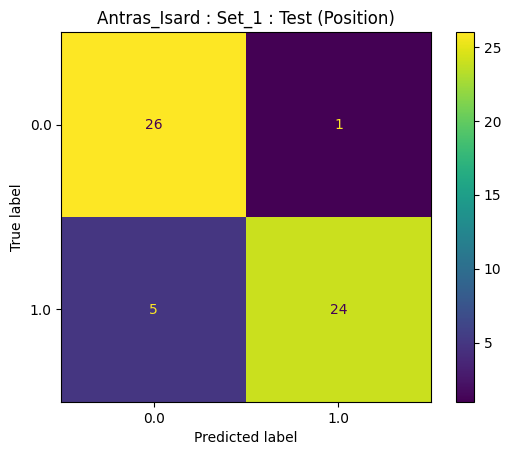

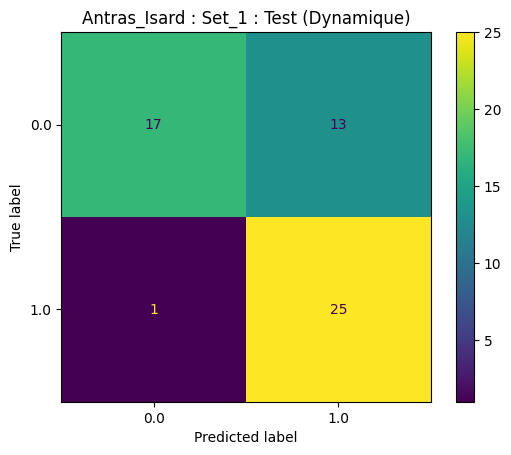



Dossier Appy_Etang_dAppy (8 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.72, 0.89, 0.9, 0.95, 0.89, 0.98, 0.94, 0.92]
- Moyenne des précisions : 0.9
- Intervalle de confiance (à 95%) : [0.83, 0.96]
- Top 5 local des features : ['V18', 'V97', 'V90', 'V127', 'V48']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.88, 0.88, 0.94, 0.91, 0.76, 0.89, 0.9, 0.88]
- Moyenne des précisions : 0.88
- Intervalle de confiance (à 95%) : [0.83, 0.92]
- Top 5 local des features : ['V35', 'V121', 'V46', 'V119', 'V95']



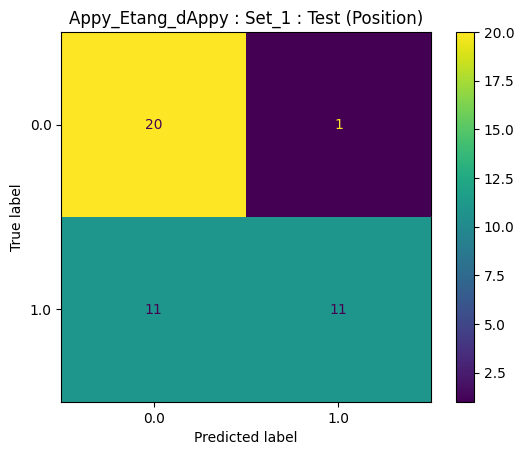

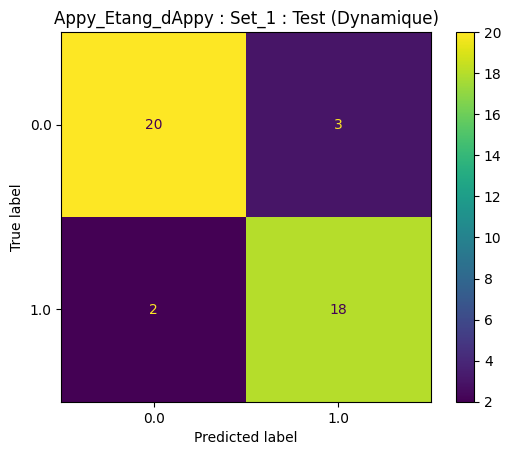



Dossier Arrien_Pic_Midi_Bordes (16 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.87, 0.88, 0.9, 0.85, 0.93, 0.9, 0.91, 0.8, 0.83, 0.91, 0.93, 0.94, 0.96, 0.93, 0.88, 0.9]
- Moyenne des précisions : 0.89
- Intervalle de confiance (à 95%) : [0.87, 0.92]
- Top 5 local des features : ['V116', 'V68', 'V41', 'V89', 'V46']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.89, 0.94, 0.94, 0.86, 0.79, 0.94, 0.84, 0.82, 0.92, 0.93, 0.89, 0.84, 0.83, 0.88, 0.85, 0.75]
- Moyenne des précisions : 0.87
- Intervalle de confiance (à 95%) : [0.84, 0.9]
- Top 5 local des features : ['V49', 'V57', 'V12', 'V67', 'V63']



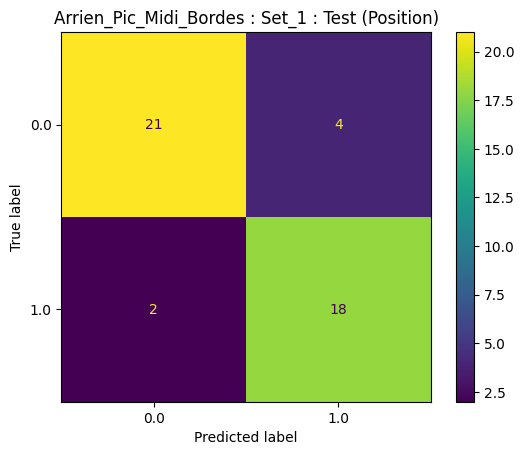

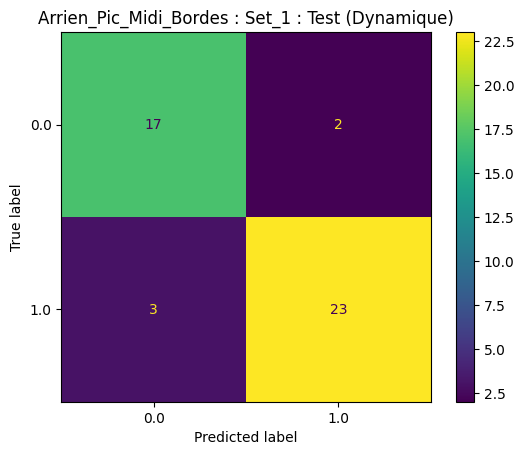



Dossier Ascou_Pailheres (4 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.86, 0.74, 0.87, 0.87]
- Moyenne des précisions : 0.84
- Intervalle de confiance (à 95%) : [0.74, 0.93]
- Top 5 local des features : ['V55', 'V24', 'V60', 'V42', 'V101']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.85, 0.82, 0.82, 0.75]
- Moyenne des précisions : 0.81
- Intervalle de confiance (à 95%) : [0.74, 0.88]
- Top 5 local des features : ['V67', 'V93', 'V66', 'V63', 'V51']



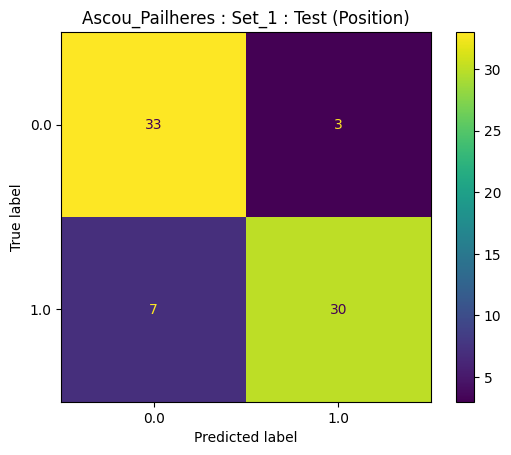

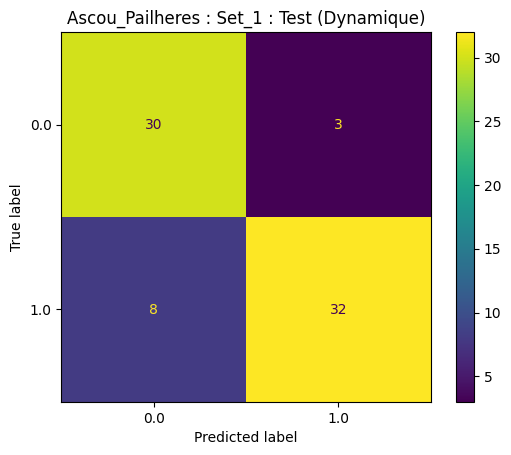



Dossier Aston_Plateau_de_Beille (7 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.98, 0.92, 0.91, 0.95, 0.93, 0.95, 0.86]
- Moyenne des précisions : 0.93
- Intervalle de confiance (à 95%) : [0.89, 0.96]
- Top 5 local des features : ['V73', 'V17', 'V64', 'V103', 'V108']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.94, 0.9, 0.94, 0.93, 0.78, 0.82, 0.92]
- Moyenne des précisions : 0.89
- Intervalle de confiance (à 95%) : [0.83, 0.95]
- Top 5 local des features : ['V90', 'V25', 'V13', 'V81', 'V9']



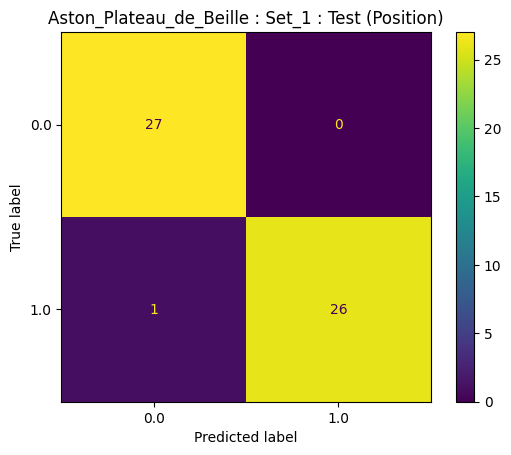

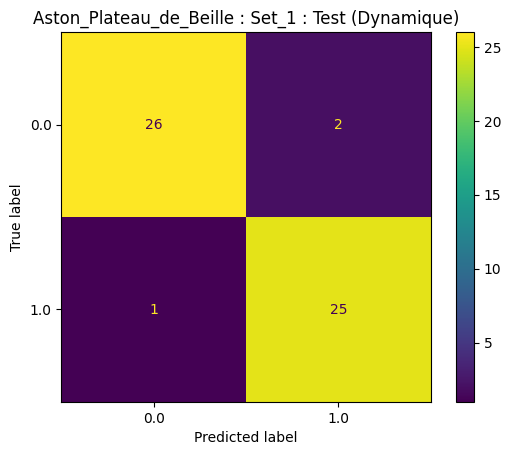



Dossier Aulus_Turon_Rose (8 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.98, 0.96, 0.95, 0.98, 0.93, 0.94, 0.95, 0.89]
- Moyenne des précisions : 0.95
- Intervalle de confiance (à 95%) : [0.92, 0.97]
- Top 5 local des features : ['V88', 'V63', 'V106', 'V121', 'V4']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.74, 0.83, 0.83, 0.92, 0.8, 0.86, 0.85, 0.94]
- Moyenne des précisions : 0.85
- Intervalle de confiance (à 95%) : [0.8, 0.9]
- Top 5 local des features : ['V87', 'V45', 'V61', 'V94', 'V98']



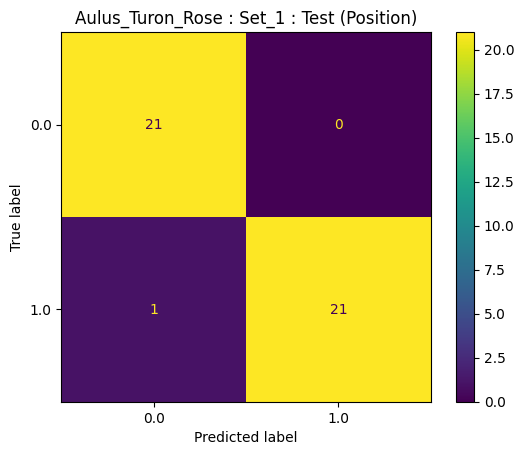

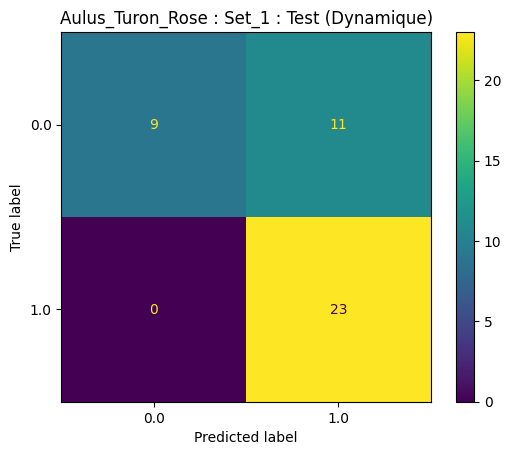



Dossier Bestiac_Trimouns (6 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.96, 0.96, 0.95, 0.94, 0.96, 0.92]
- Moyenne des précisions : 0.95
- Intervalle de confiance (à 95%) : [0.93, 0.96]
- Top 5 local des features : ['V42', 'V30', 'V86', 'V125', 'V67']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.91, 0.78, 0.82, 0.86, 0.87, 0.97]
- Moyenne des précisions : 0.87
- Intervalle de confiance (à 95%) : [0.8, 0.94]
- Top 5 local des features : ['V26', 'V107', 'V1', 'V100', 'V70']



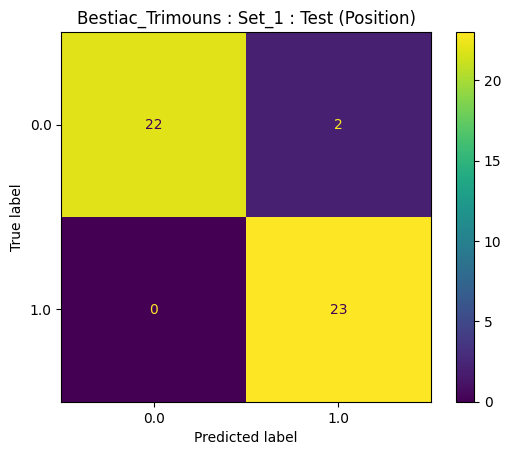

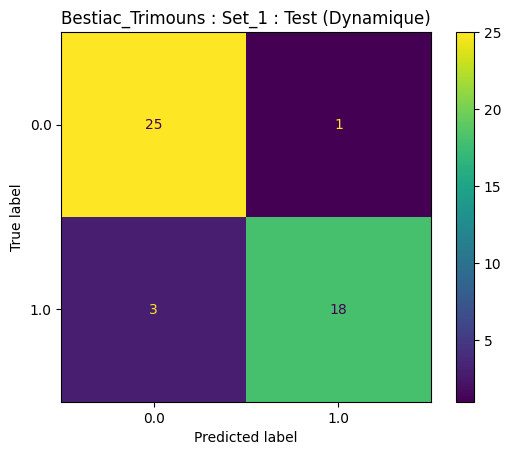



Dossier Bethmale_Ayet (5 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.89, 0.9, 0.93, 0.94, 1.0]
- Moyenne des précisions : 0.93
- Intervalle de confiance (à 95%) : [0.88, 0.99]
- Top 5 local des features : ['V9', 'V128', 'V83', 'V8', 'V72']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.65, 0.81, 0.81, 0.83, 0.82]
- Moyenne des précisions : 0.78
- Intervalle de confiance (à 95%) : [0.69, 0.88]
- Top 5 local des features : ['V32', 'V122', 'V25', 'V23', 'V12']



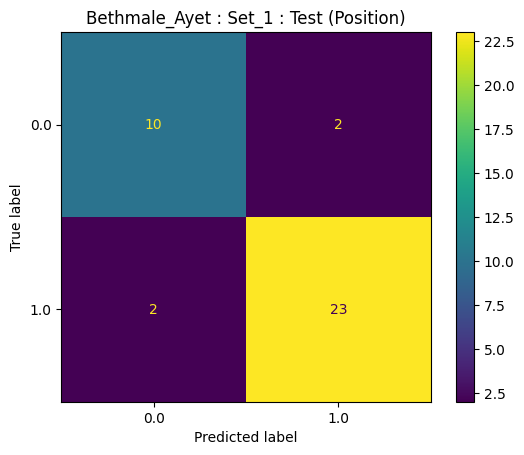

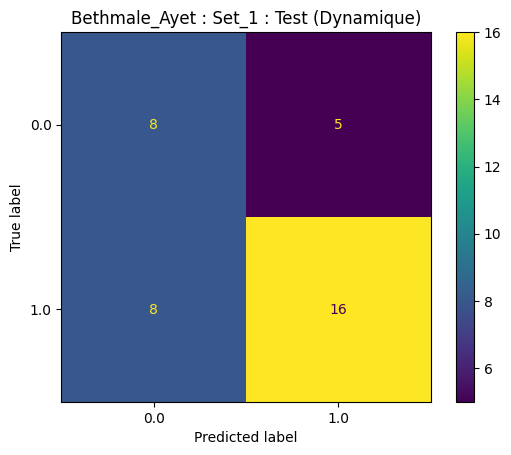



Dossier Bethmale_Eychelle (6 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.81, 0.4, 0.8, 0.93, 0.88, 0.93]
- Moyenne des précisions : 0.79
- Intervalle de confiance (à 95%) : [0.58, 1.0]
- Top 5 local des features : ['V103', 'V112', 'V18', 'V9', 'V11']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.38, 0.6, 0.78, 0.82, 0.87, 0.91]
- Moyenne des précisions : 0.73
- Intervalle de confiance (à 95%) : [0.51, 0.94]
- Top 5 local des features : ['V20', 'V6', 'V49', 'V97', 'V31']



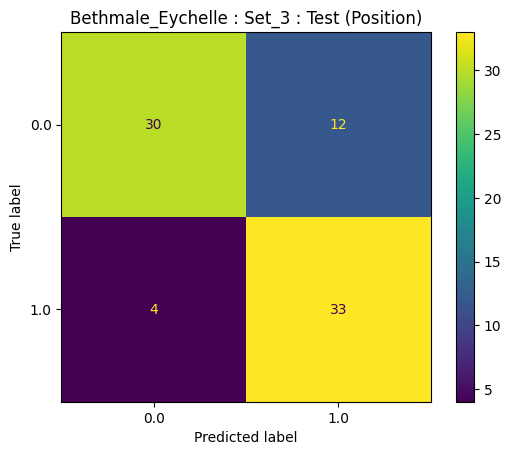

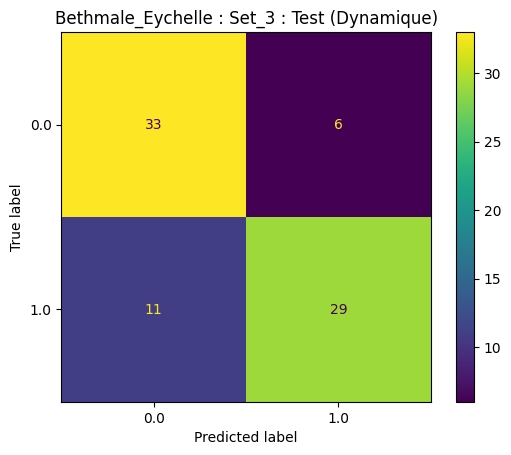



Dossier Bonac_Arech (9 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.82, 0.84, 0.92, 0.9, 0.96, 0.93, 0.92, 0.86, 0.77]
- Moyenne des précisions : 0.88
- Intervalle de confiance (à 95%) : [0.83, 0.92]
- Top 5 local des features : ['V106', 'V84', 'V127', 'V54', 'V62']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.76, 0.82, 0.85, 0.88, 0.82, 0.85, 0.91, 0.81, 0.9]
- Moyenne des précisions : 0.84
- Intervalle de confiance (à 95%) : [0.81, 0.88]
- Top 5 local des features : ['V16', 'V79', 'V118', 'V111', 'V7']



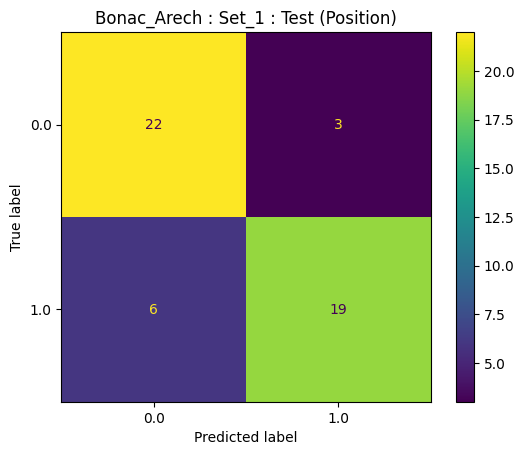

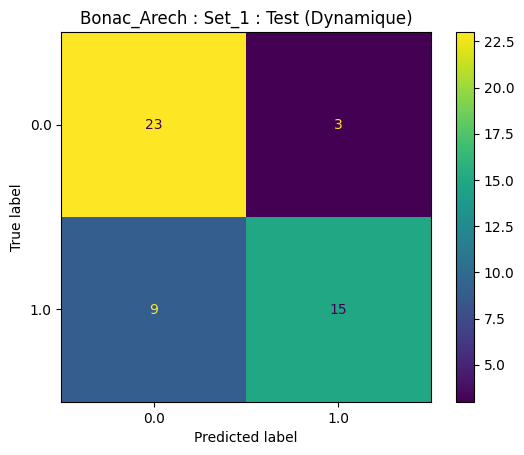



Dossier Bonac_Orle (8 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.91, 0.92, 0.8, 0.91, 0.93, 0.89, 0.93, 0.94]
- Moyenne des précisions : 0.9
- Intervalle de confiance (à 95%) : [0.87, 0.94]
- Top 5 local des features : ['V75', 'V114', 'V29', 'V82', 'V96']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.93, 0.9, 0.79, 0.9, 0.93, 0.95, 0.96, 1.0]
- Moyenne des précisions : 0.92
- Intervalle de confiance (à 95%) : [0.87, 0.97]
- Top 5 local des features : ['V98', 'V42', 'V72', 'V29', 'V114']



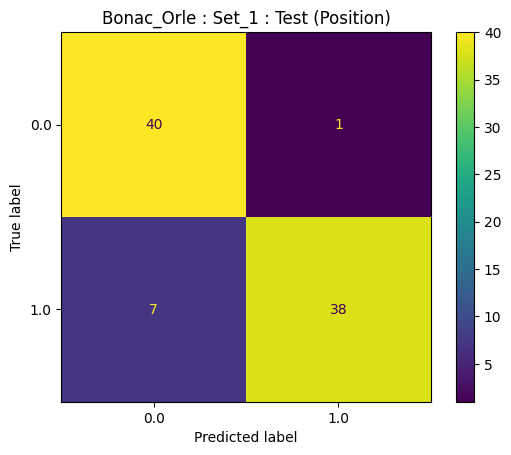

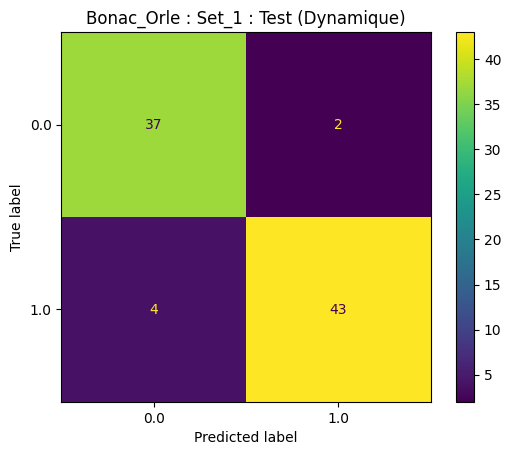



Dossier Couflens_Pouill (4 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.87, 0.93, 0.88, 0.96]
- Moyenne des précisions : 0.91
- Intervalle de confiance (à 95%) : [0.84, 0.98]
- Top 5 local des features : ['V74', 'V23', 'V18', 'V93', 'V79']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.89, 0.89, 0.82, 0.92]
- Moyenne des précisions : 0.88
- Intervalle de confiance (à 95%) : [0.81, 0.95]
- Top 5 local des features : ['V17', 'V118', 'V96', 'V73', 'V113']



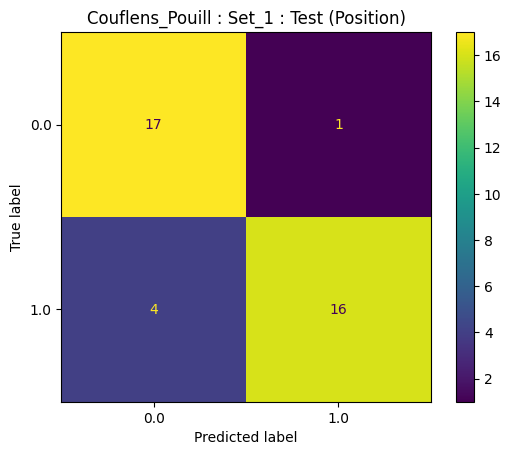

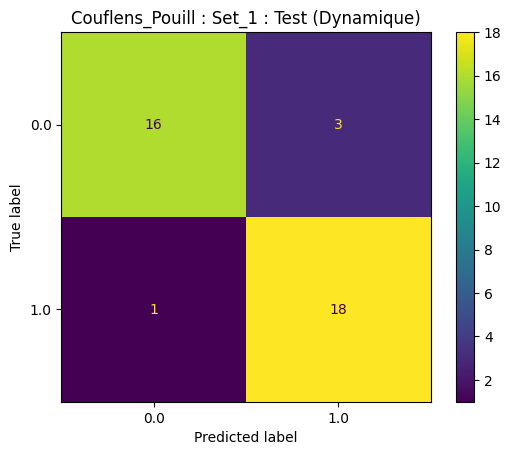



Dossier Couflens_Saubé (4 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.68, 0.76, 0.88, 0.82]
- Moyenne des précisions : 0.78
- Intervalle de confiance (à 95%) : [0.65, 0.92]
- Top 5 local des features : ['V2', 'V10', 'V71', 'V103', 'V100']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [1.0, 1.0, 1.0, 1.0]
- Moyenne des précisions : 1.0
- Intervalle de confiance (à 95%) : [1.0, 1.0]
- Top 5 local des features : ['V22', 'V19', 'V105', 'V127', 'V41']



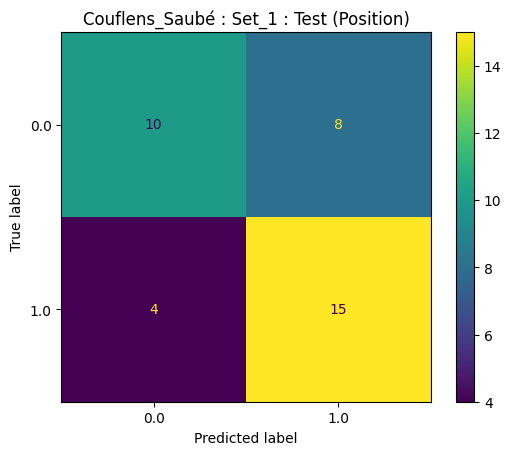

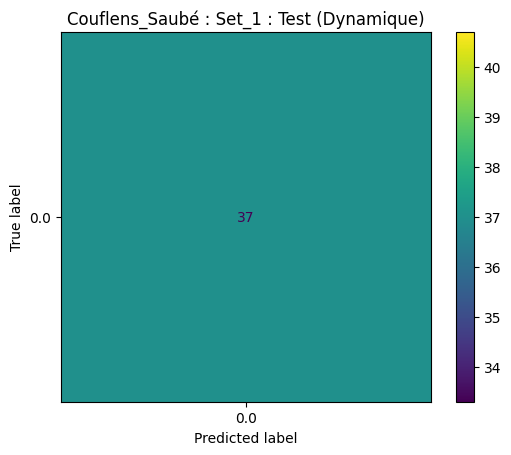



Dossier Formiguères_Serra_dels_Alarbs (16 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.7, 0.76, 0.97, 0.86, 0.95, 0.94, 0.93, 0.85, 0.96, 0.85, 0.92, 0.85, 0.91, 0.84, 0.89, 0.65]
- Moyenne des précisions : 0.86
- Intervalle de confiance (à 95%) : [0.82, 0.91]
- Top 5 local des features : ['V95', 'V74', 'V40', 'V91', 'V23']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.7, 0.84, 0.79, 0.9, 0.88, 0.91, 0.81, 0.75, 0.84, 0.69, 0.76, 0.76, 0.79, 0.74, 0.86, 0.7]
- Moyenne des précisions : 0.79
- Intervalle de confiance (à 95%) : [0.76, 0.83]
- Top 5 local des features : ['V41', 'V40', 'V75', 'V55', 'V78']



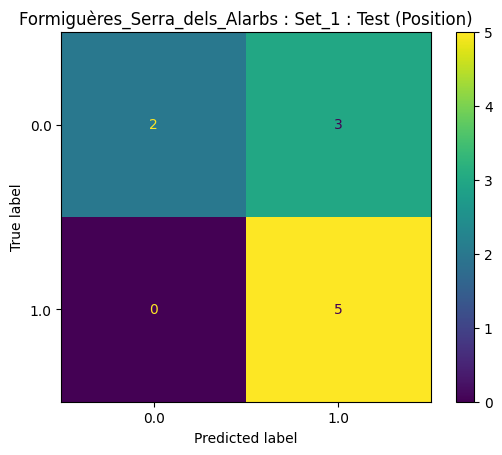

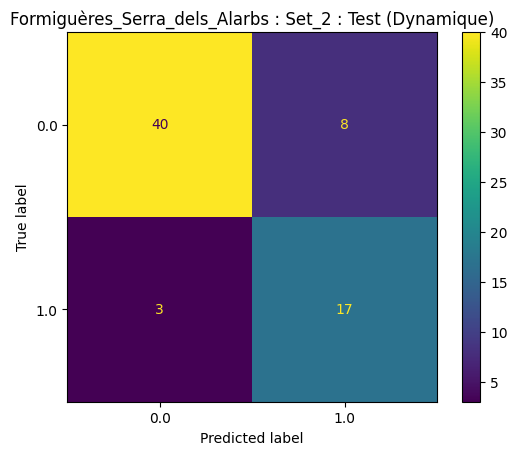



Dossier Gestiès_Col_du_Sasc (15 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.89, 0.88, 0.96, 1.0, 0.96, 1.0, 1.0, 1.0, 1.0, 0.88, 1.0, 0.96, 1.0, 0.96, 0.94]
- Moyenne des précisions : 0.96
- Intervalle de confiance (à 95%) : [0.93, 0.99]
- Top 5 local des features : ['V11', 'V6', 'V109', 'V112', 'V120']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.96, 0.9, 0.87, 0.94, 1.0, 0.96, 1.0, 0.95, 1.0, 1.0, 0.96, 0.96, 1.0, 0.92, 1.0]
- Moyenne des précisions : 0.96
- Intervalle de confiance (à 95%) : [0.94, 0.98]
- Top 5 local des features : ['V82', 'V32', 'V112', 'V37', 'V109']



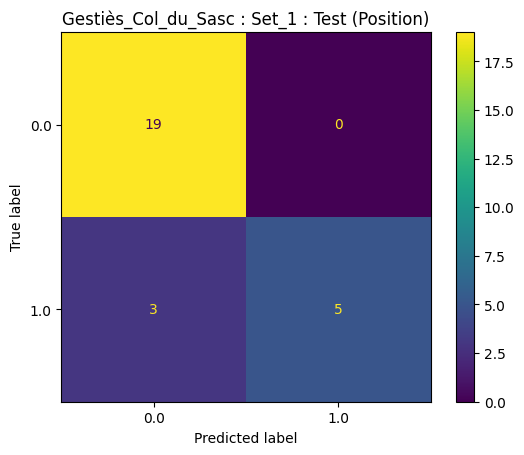

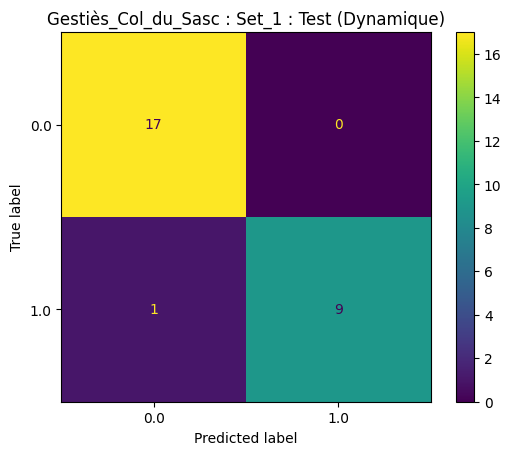



Dossier Gestiès_Le_Clot (8 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.94, 0.97, 1.0, 0.99, 0.98, 1.0, 0.94, 0.93]
- Moyenne des précisions : 0.97
- Intervalle de confiance (à 95%) : [0.94, 0.99]
- Top 5 local des features : ['V127', 'V98', 'V115', 'V64', 'V94']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.86, 0.84, 0.88, 0.95, 0.89, 0.83, 0.77, 0.88]
- Moyenne des précisions : 0.86
- Intervalle de confiance (à 95%) : [0.82, 0.9]
- Top 5 local des features : ['V48', 'V77', 'V15', 'V39', 'V117']



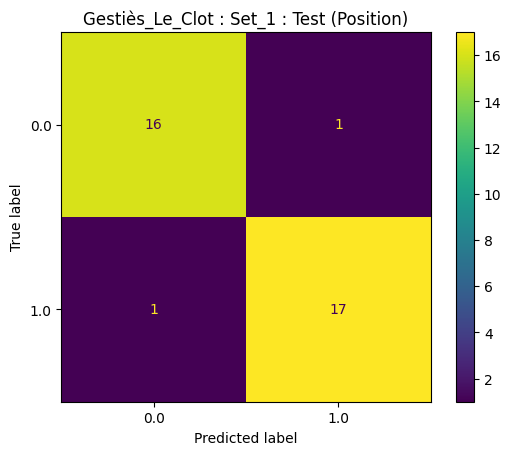

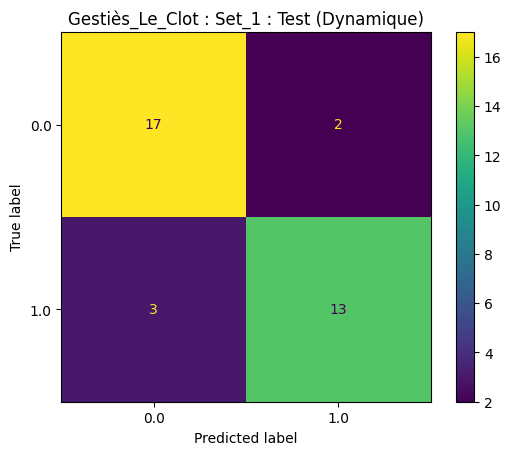



Dossier Goulier_Val_de_Sos (4 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.84, 0.76, 0.86, 0.98]
- Moyenne des précisions : 0.86
- Intervalle de confiance (à 95%) : [0.72, 1.0]
- Top 5 local des features : ['V12', 'V39', 'V86', 'V41', 'V70']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.78, 0.72, 0.84, 0.92]
- Moyenne des précisions : 0.82
- Intervalle de confiance (à 95%) : [0.68, 0.95]
- Top 5 local des features : ['V124', 'V54', 'V100', 'V16', 'V52']



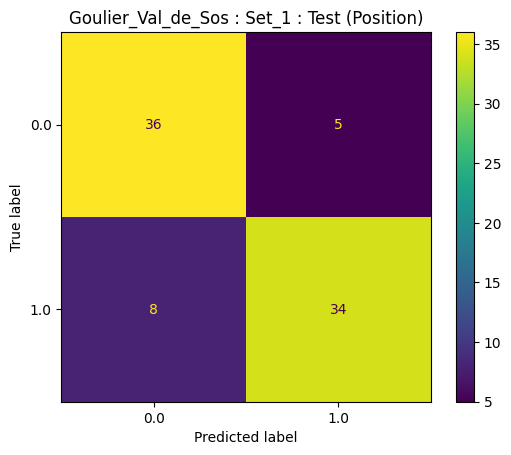

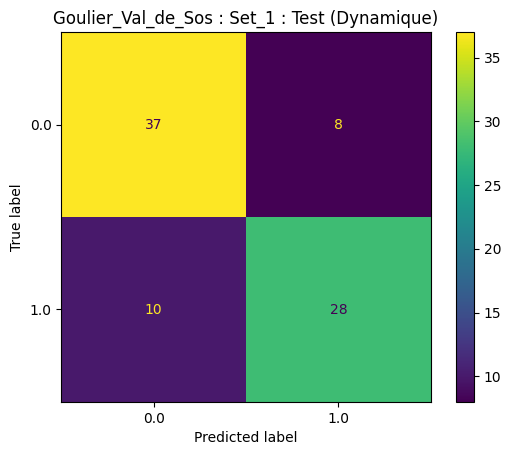

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Dossier Lercoul_Col_de_Grail (14 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [1.0, 1.0, 0.96, 0.96, 0.96, 0.96, 1.0, 0.8, 0.97, 0.93, 0.89, 0.93, 0.99, 0.93]
- Moyenne des précisions : 0.95
- Intervalle de confiance (à 95%) : [0.92, 0.98]
- Top 5 local des features : ['V80', 'V74', 'V95', 'V1', 'V14']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.77, 0.58, 0.62, 0.54, 0.42, 0.58, 1.0, 0.67, 0.62, 0.72, 0.62, 0.69, 0.68, 0.63]
- Moyenne des précisions : 0.65
- Intervalle de confiance (à 95%) : [0.58, 0.73]
- Top 5 local des features : ['V121', 'V77', 'V108', 'V87', 'V52']



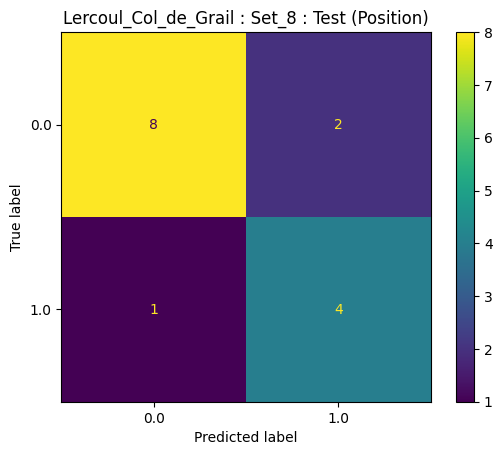

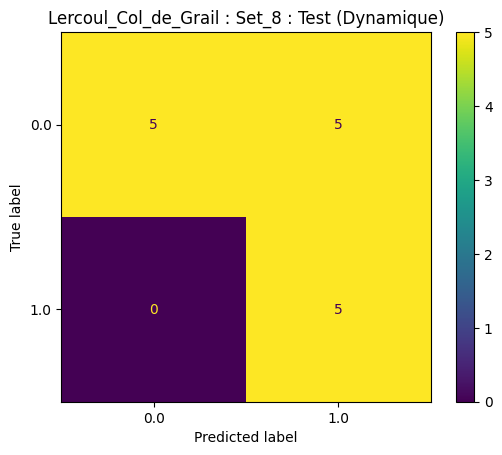

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Dossier Les_Angles_Puig_del_Pam (16 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.83, 0.93, 0.84, 0.84, 0.84, 0.88, 0.9, 0.88, 0.96, 0.96, 0.93, 0.95, 0.94, 0.94, 0.93, 0.96]
- Moyenne des précisions : 0.91
- Intervalle de confiance (à 95%) : [0.88, 0.93]
- Top 5 local des features : ['V22', 'V82', 'V14', 'V79', 'V61']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.69, 0.68, 0.7, 0.67, 0.67, 0.69, 0.74, 0.74, 0.83, 0.73, 0.8, 0.78, 0.82, 0.76, 0.79, 0.72]
- Moyenne des précisions : 0.74
- Intervalle de confiance (à 95%) : [0.71, 0.77]
- Top 5 local des features : ['V92', 'V13', 'V104', 'V73', 'V82']



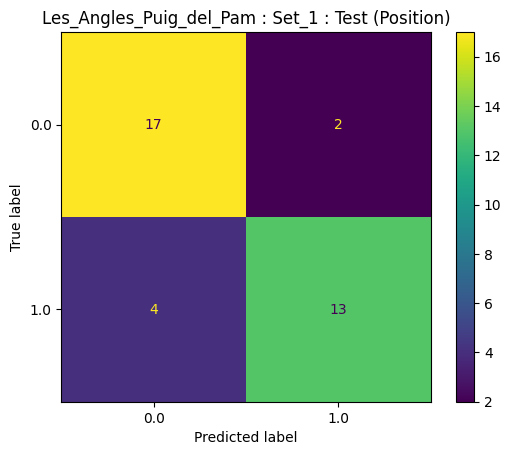

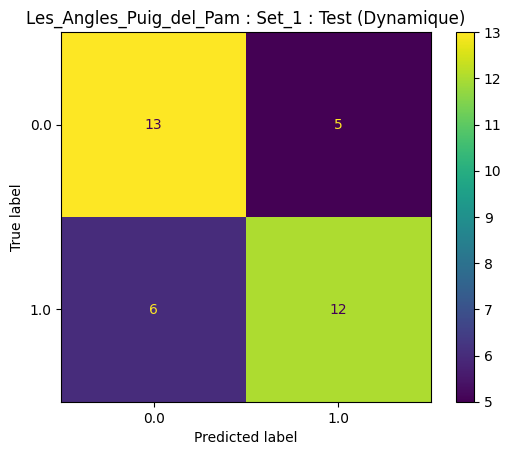



Dossier Les_Angles_Roc_dAude (17 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.69, 0.79, 0.78, 0.86, 0.94, 0.83, 0.81, 0.69, 0.86, 0.85, 0.85, 0.89, 0.86, 0.9, 0.86, 0.92, 0.89]
- Moyenne des précisions : 0.84
- Intervalle de confiance (à 95%) : [0.8, 0.88]
- Top 5 local des features : ['V100', 'V103', 'V14', 'V42', 'V4']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.81, 0.61, 0.64, 0.73, 0.8, 0.65, 0.64, 0.58, 0.7, 0.76, 0.81, 0.86, 0.8, 0.81, 0.85, 0.78, 0.67]
- Moyenne des précisions : 0.74
- Intervalle de confiance (à 95%) : [0.69, 0.78]
- Top 5 local des features : ['V71', 'V122', 'V121', 'V36', 'V35']



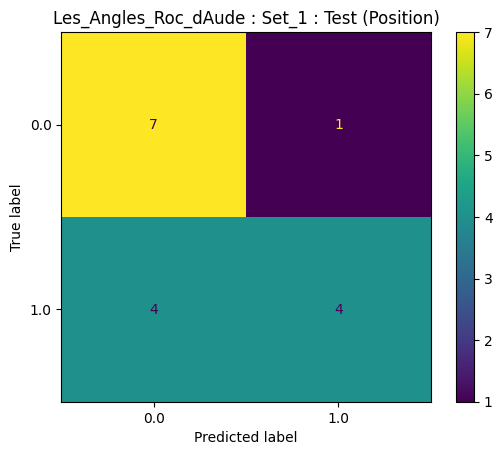

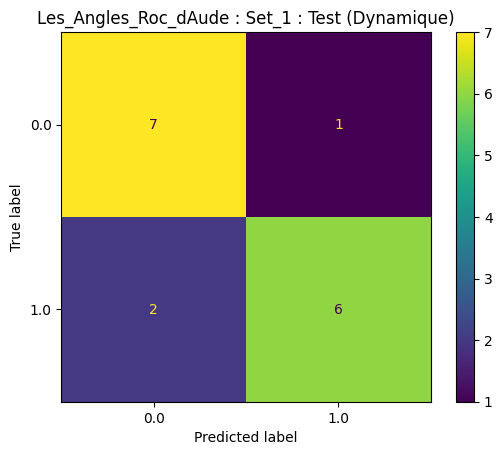



Dossier Merens_Comte (27 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.91, 0.87, 0.9, 0.86, 0.85, 0.94, 0.93, 0.97, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.79, 1.0, 1.0, 1.0, 1.0, 0.96, 0.92, 1.0, 1.0, 0.96, 0.75, 0.96, 0.86]
- Moyenne des précisions : 0.94
- Intervalle de confiance (à 95%) : [0.91, 0.97]
- Top 5 local des features : ['V27', 'V84', 'V74', 'V88', 'V82']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.99, 0.96, 1.0, 0.88, 0.96, 0.96, 1.0, 0.97, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.96, 1.0, 1.0, 0.96, 1.0, 1.0, 1.0, 1.0, 1.0, 0.88, 0.96, 1.0, 1.0]
- Moyenne des précisions : 0.98
- Intervalle de confiance (à 95%) : [0.97, 0.99]
- Top 5 local des features : ['V85', 'V48', 'V108', 'V114', 'V34']



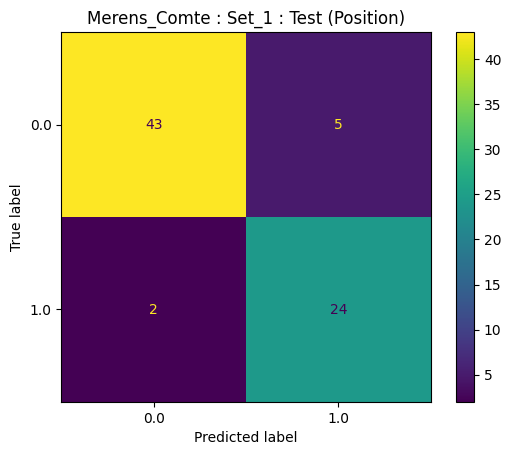

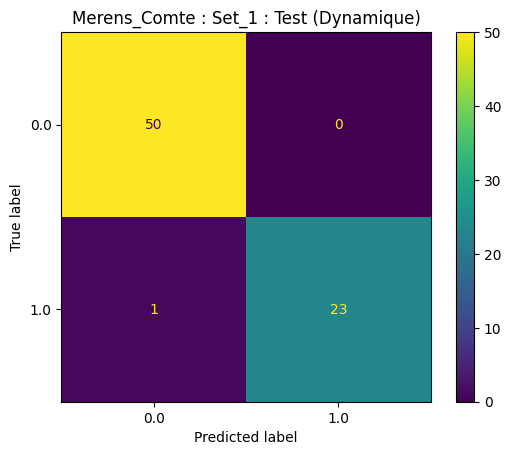



Dossier Miglos_Pla_de_Montcamp (7 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.83, 0.88, 0.8, 0.79, 0.83, 0.89, 0.86]
- Moyenne des précisions : 0.84
- Intervalle de confiance (à 95%) : [0.81, 0.87]
- Top 5 local des features : ['V67', 'V103', 'V97', 'V106', 'V93']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.76, 0.83, 0.88, 0.87, 0.84, 0.83, 0.93]
- Moyenne des précisions : 0.85
- Intervalle de confiance (à 95%) : [0.8, 0.9]
- Top 5 local des features : ['V79', 'V54', 'V83', 'V72', 'V11']



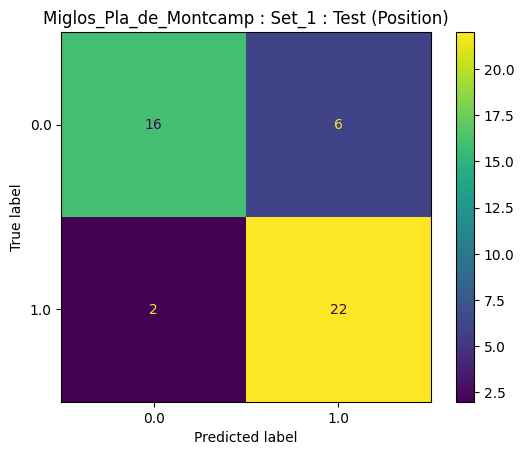

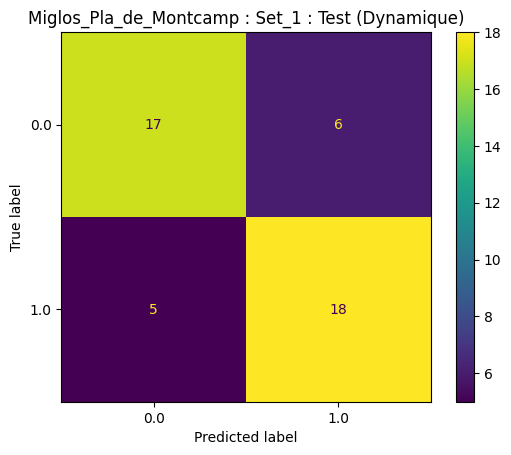



Dossier Mijanes_Estagnet (7 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.75, 0.89, 0.82, 0.72, 0.85, 0.68, 0.65]
- Moyenne des précisions : 0.76
- Intervalle de confiance (à 95%) : [0.68, 0.85]
- Top 5 local des features : ['V108', 'V74', 'V13', 'V6', 'V56']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.92, 0.82, 0.82, 0.72, 0.83, 0.77, 0.75]
- Moyenne des précisions : 0.8
- Intervalle de confiance (à 95%) : [0.75, 0.86]
- Top 5 local des features : ['V81', 'V29', 'V53', 'V8', 'V126']



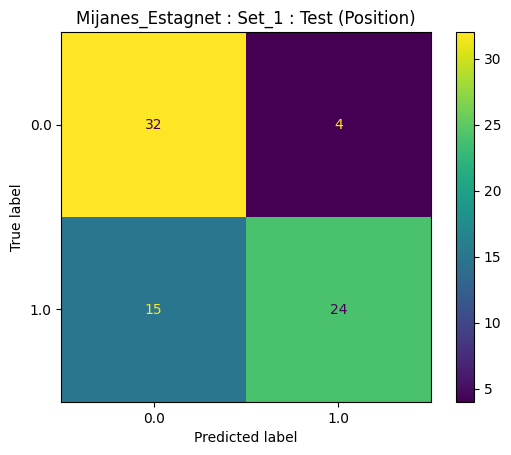

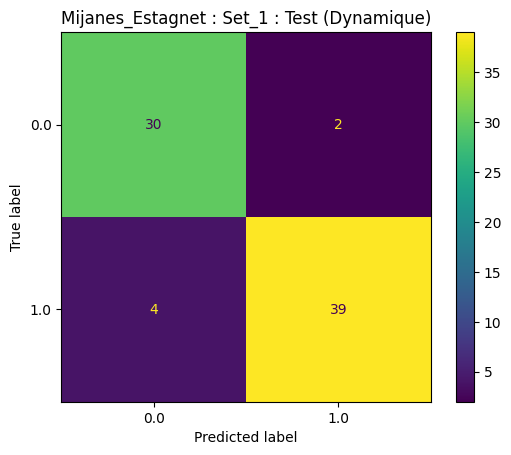



Dossier Mijanes_Trabesses (5 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.58, 0.75, 0.81, 0.71, 0.69]
- Moyenne des précisions : 0.71
- Intervalle de confiance (à 95%) : [0.6, 0.81]
- Top 5 local des features : ['V128', 'V71', 'V35', 'V44', 'V66']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.81, 0.86, 0.9, 0.84, 0.78]
- Moyenne des précisions : 0.84
- Intervalle de confiance (à 95%) : [0.78, 0.89]
- Top 5 local des features : ['V105', 'V80', 'V36', 'V4', 'V72']



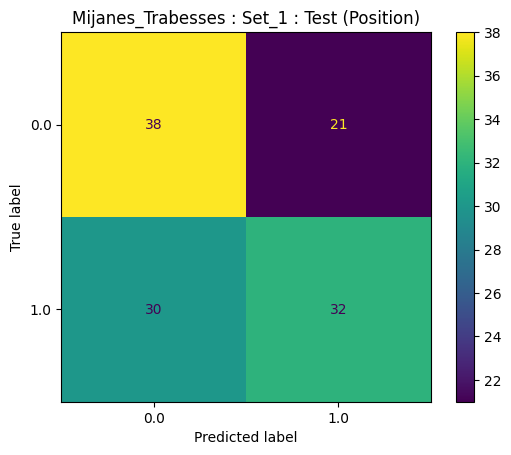

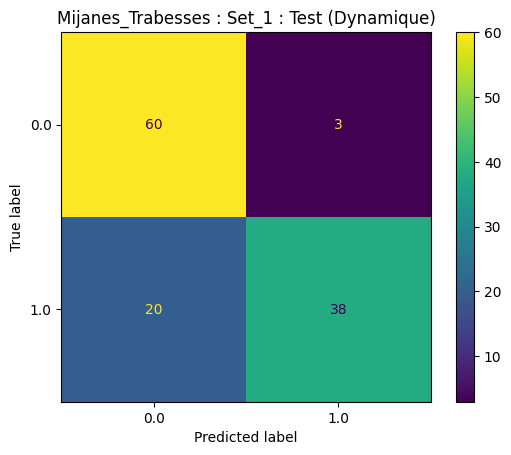



Dossier Montferrier_Mont_dOlmes (10 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.88, 0.92, 0.78, 0.81, 0.85, 0.79, 0.87, 0.85, 0.83, 0.83]
- Moyenne des précisions : 0.84
- Intervalle de confiance (à 95%) : [0.81, 0.87]
- Top 5 local des features : ['V14', 'V116', 'V24', 'V58', 'V16']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.79, 0.86, 0.86, 0.82, 0.87, 0.83, 0.89, 0.85, 0.68, 0.86]
- Moyenne des précisions : 0.83
- Intervalle de confiance (à 95%) : [0.79, 0.88]
- Top 5 local des features : ['V126', 'V24', 'V17', 'V52', 'V15']



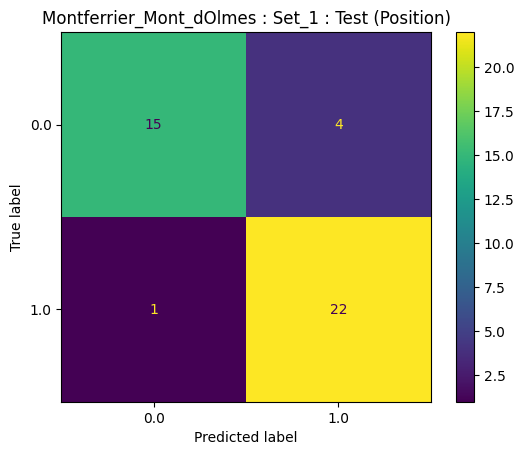

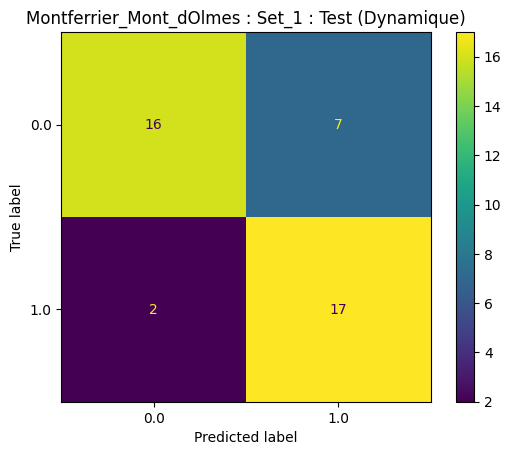

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Dossier Montsegur_Frau (8 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.73, 0.82, 0.78, 0.88, 0.9, 0.71, 0.79, 0.93]
- Moyenne des précisions : 0.82
- Intervalle de confiance (à 95%) : [0.75, 0.88]
- Top 5 local des features : ['V19', 'V58', 'V85', 'V114', 'V45']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.62, 0.68, 0.63, 0.69, 0.78, 0.79, 0.92, 0.6]
- Moyenne des précisions : 0.71
- Intervalle de confiance (à 95%) : [0.62, 0.8]
- Top 5 local des features : ['V45', 'V35', 'V15', 'V32', 'V46']



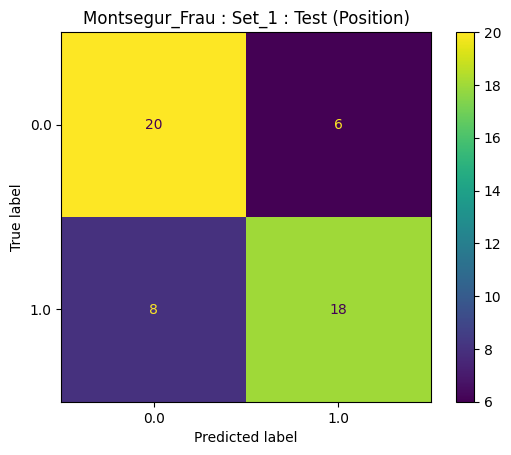

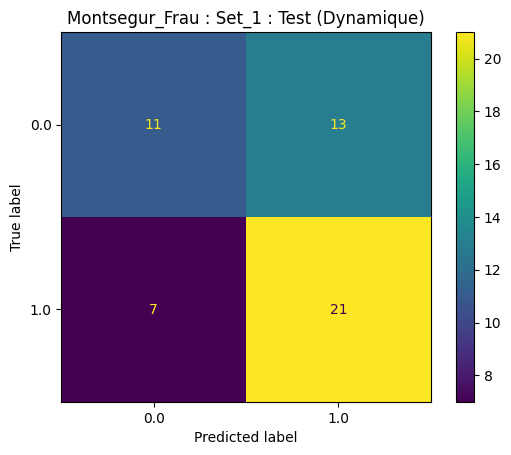



Dossier Montségur_Soularac (11 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.89, 0.87, 0.87, 0.7, 0.88, 0.86, 0.9, 0.89, 0.87, 0.91, 0.33]
- Moyenne des précisions : 0.82
- Intervalle de confiance (à 95%) : [0.7, 0.93]
- Top 5 local des features : ['V53', 'V5', 'V51', 'V118', 'V71']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.96, 0.94, 0.95, 0.96, 0.94, 0.94, 0.91, 0.97, 0.91, 0.81, 0.67]
- Moyenne des précisions : 0.9
- Intervalle de confiance (à 95%) : [0.84, 0.97]
- Top 5 local des features : ['V3', 'V108', 'V79', 'V16', 'V8']



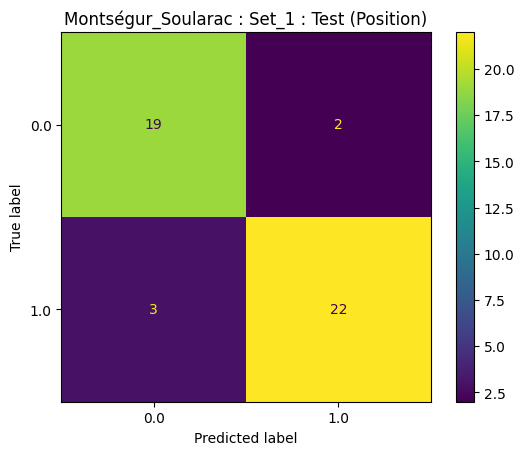

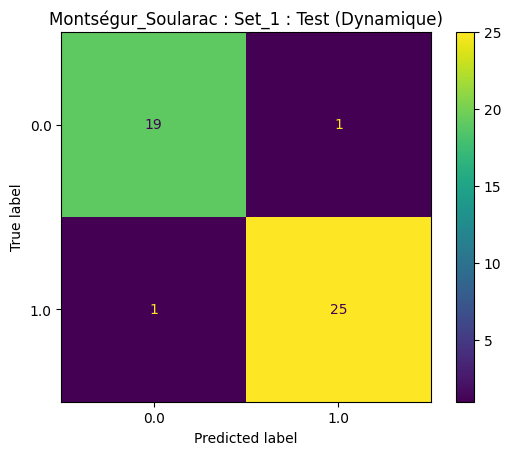



Dossier Orgeix_Coume (7 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.83, 0.86, 0.89, 0.92, 0.76, 0.98, 1.0]
- Moyenne des précisions : 0.89
- Intervalle de confiance (à 95%) : [0.82, 0.97]
- Top 5 local des features : ['V49', 'V39', 'V106', 'V62', 'V57']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.89, 0.85, 0.87, 0.87, 0.97, 0.96, 0.86]
- Moyenne des précisions : 0.89
- Intervalle de confiance (à 95%) : [0.85, 0.94]
- Top 5 local des features : ['V116', 'V39', 'V70', 'V57', 'V22']



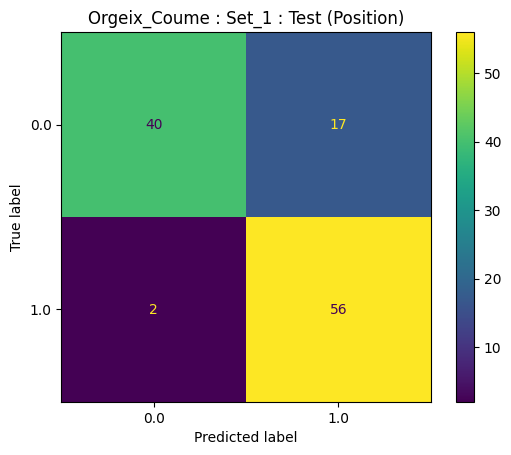

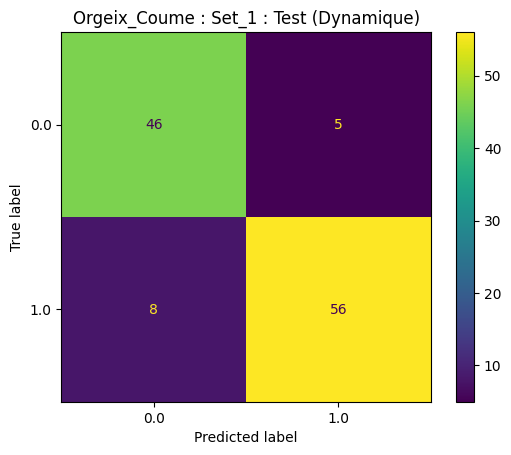



Dossier Orlu_RNCFS (23 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.91, 0.93, 0.95, 0.94, 1.0, 1.0, 1.0, 0.94, 0.96, 1.0, 0.98, 0.98, 1.0, 0.96, 0.98, 0.98, 1.0, 1.0, 0.96, 1.0, 0.98, 0.94, 1.0]
- Moyenne des précisions : 0.97
- Intervalle de confiance (à 95%) : [0.96, 0.98]
- Top 5 local des features : ['V98', 'V64', 'V51', 'V30', 'V5']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.91, 0.82, 0.89, 1.0, 0.98, 1.0, 0.96, 1.0, 1.0, 1.0, 1.0, 0.96, 0.96, 0.98, 0.96, 0.96, 1.0, 1.0, 1.0, 0.98, 1.0, 0.92, 1.0]
- Moyenne des précisions : 0.97
- Intervalle de confiance (à 95%) : [0.95, 0.99]
- Top 5 local des features : ['V99', 'V116', 'V76', 'V38', 'V51']



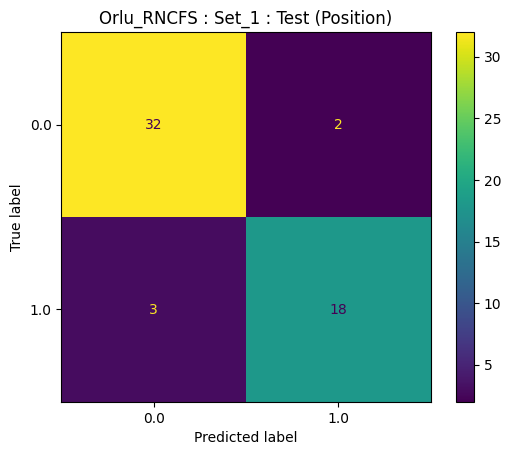

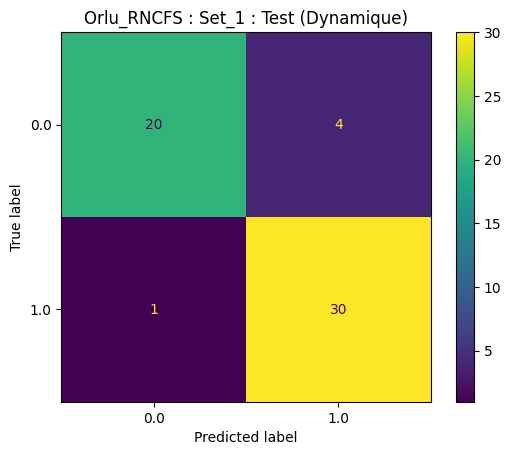



Dossier Saint-Lary_Herbe_Soulette (9 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.83, 0.88, 0.97, 0.97, 0.94, 0.89, 0.93, 0.86, 0.85]
- Moyenne des précisions : 0.9
- Intervalle de confiance (à 95%) : [0.86, 0.94]
- Top 5 local des features : ['V23', 'V57', 'V124', 'V72', 'V111']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.72, 0.87, 0.96, 0.93, 0.89, 0.94, 0.94, 0.9, 0.82]
- Moyenne des précisions : 0.89
- Intervalle de confiance (à 95%) : [0.83, 0.94]
- Top 5 local des features : ['V21', 'V47', 'V65', 'V110', 'V59']



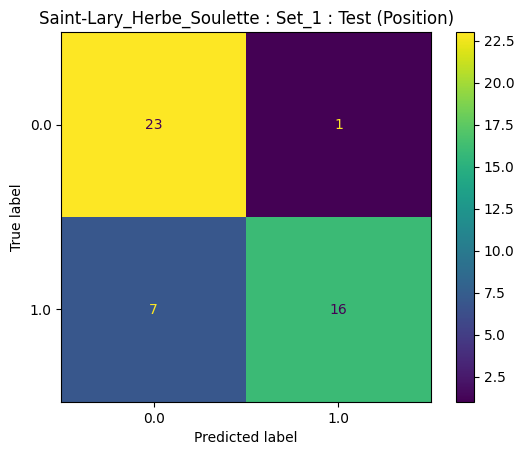

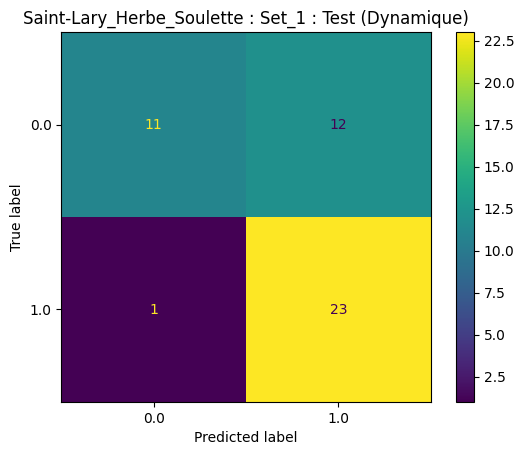



Dossier Seix_Col_de_Pause (4 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.99, 0.97, 0.91, 0.98]
- Moyenne des précisions : 0.96
- Intervalle de confiance (à 95%) : [0.91, 1.01]
- Top 5 local des features : ['V48', 'V70', 'V128', 'V61', 'V113']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.99, 0.95, 0.91, 0.91]
- Moyenne des précisions : 0.94
- Intervalle de confiance (à 95%) : [0.88, 1.0]
- Top 5 local des features : ['V100', 'V119', 'V47', 'V90', 'V128']



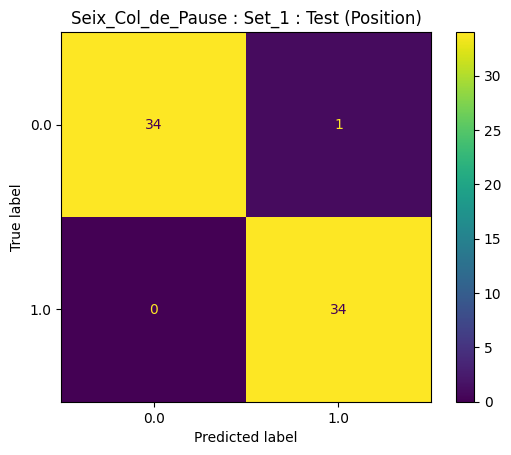

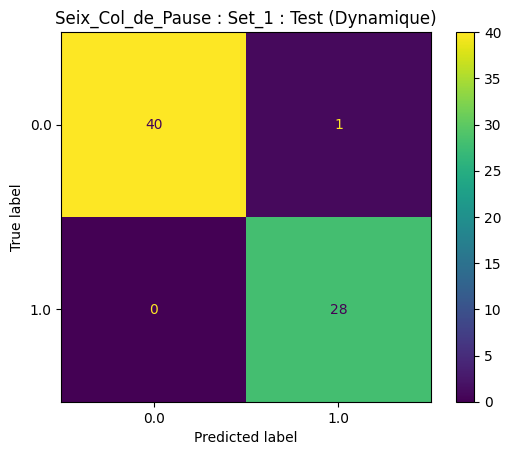



Dossier Seix_Pic_de_Montbuou (16 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.95, 0.91, 0.98, 0.95, 0.89, 0.99, 0.98, 0.92, 0.91, 0.93, 0.96, 0.97, 0.95, 0.96, 0.9, 0.93]
- Moyenne des précisions : 0.94
- Intervalle de confiance (à 95%) : [0.92, 0.96]
- Top 5 local des features : ['V20', 'V2', 'V23', 'V4', 'V64']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.98, 0.99, 1.0, 0.98, 0.95, 1.0, 1.0, 1.0, 0.98, 0.97, 0.94, 0.98, 0.99, 0.98, 1.0, 1.0]
- Moyenne des précisions : 0.98
- Intervalle de confiance (à 95%) : [0.97, 0.99]
- Top 5 local des features : ['V18', 'V39', 'V19', 'V65', 'V37']



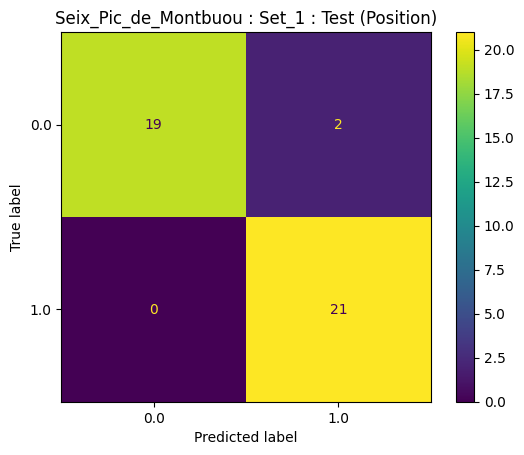

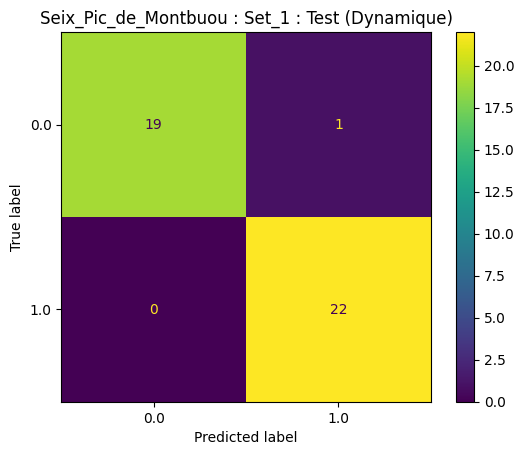



Dossier Sentein_Eylie (9 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.92, 0.89, 0.92, 0.88, 0.93, 0.92, 0.94, 0.88, 1.0]
- Moyenne des précisions : 0.92
- Intervalle de confiance (à 95%) : [0.89, 0.95]
- Top 5 local des features : ['V91', 'V126', 'V90', 'V60', 'V44']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.93, 0.91, 0.87, 0.65, 0.9, 0.83, 0.83, 0.89, 1.0]
- Moyenne des précisions : 0.87
- Intervalle de confiance (à 95%) : [0.79, 0.94]
- Top 5 local des features : ['V121', 'V51', 'V11', 'V88', 'V115']



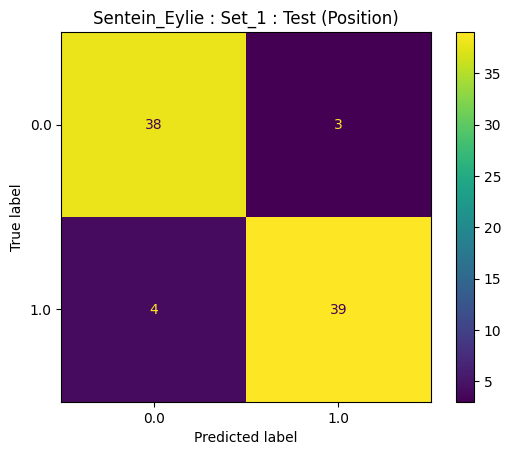

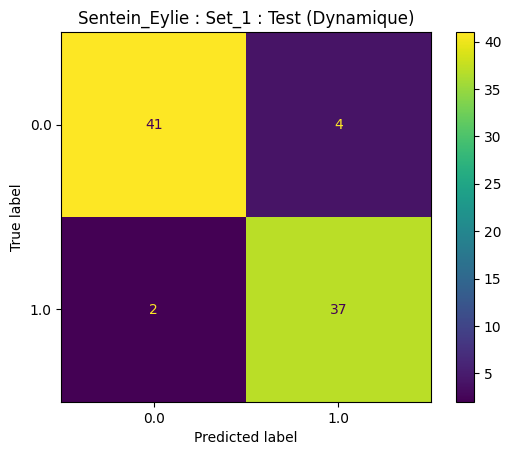



Dossier Ustou_Col_dEscots (14 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.95, 0.98, 1.0, 0.97, 0.96, 0.96, 0.98, 0.96, 0.97, 0.95, 0.99, 0.92, 0.98, 0.96]
- Moyenne des précisions : 0.97
- Intervalle de confiance (à 95%) : [0.95, 0.98]
- Top 5 local des features : ['V127', 'V9', 'V57', 'V18', 'V88']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.95, 0.97, 0.98, 0.98, 0.95, 0.96, 0.95, 0.98, 0.97, 0.94, 0.9, 0.97, 0.95, 0.98]
- Moyenne des précisions : 0.96
- Intervalle de confiance (à 95%) : [0.94, 0.97]
- Top 5 local des features : ['V38', 'V20', 'V15', 'V27', 'V5']



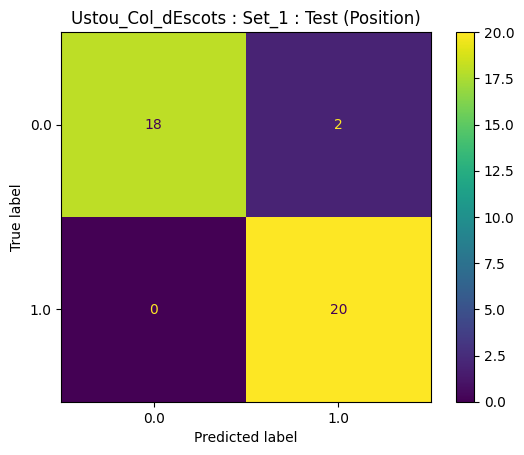

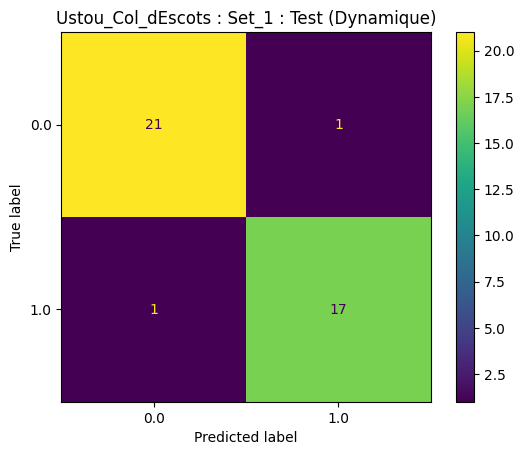



Dossier Ustou_Guzet-Neige (5 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.82, 0.93, 0.89, 0.95, 0.77]
- Moyenne des précisions : 0.87
- Intervalle de confiance (à 95%) : [0.77, 0.96]
- Top 5 local des features : ['V45', 'V124', 'V55', 'V105', 'V106']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [1.0, 1.0, 1.0, 1.0, 1.0]
- Moyenne des précisions : 1.0
- Intervalle de confiance (à 95%) : [1.0, 1.0]
- Top 5 local des features : ['V68', 'V66', 'V70', 'V54', 'V11']



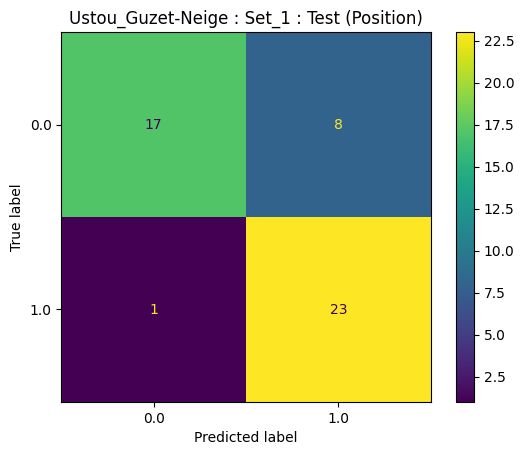

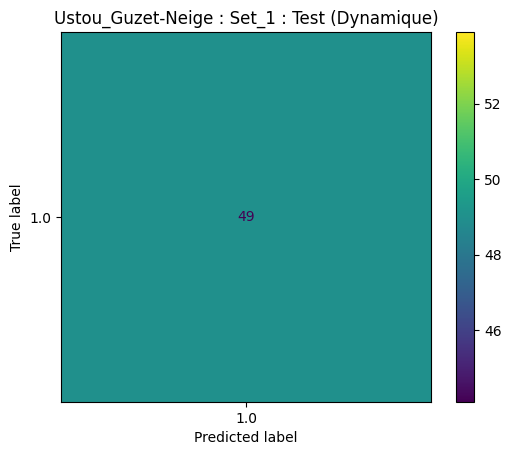



Dossier Valcebollère_Pla_des_Salines (17 cross validation) :

MLP Classifier : Position :
- Précisions sur les ensembles de test : [0.8, 0.68, 0.72, 0.7, 0.76, 0.69, 0.76, 0.78, 0.8, 0.67, 0.8, 0.79, 0.75, 0.75, 0.71, 0.83, 0.5]
- Moyenne des précisions : 0.74
- Intervalle de confiance (à 95%) : [0.7, 0.78]
- Top 5 local des features : ['V48', 'V22', 'V25', 'V57', 'V30']

MLP Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.4, 0.82, 0.78, 0.75, 0.75, 0.87, 0.75, 0.81, 0.83, 0.75, 0.79, 0.88, 0.86, 0.87, 0.77, 0.86, 1.0]
- Moyenne des précisions : 0.8
- Intervalle de confiance (à 95%) : [0.73, 0.86]
- Top 5 local des features : ['V121', 'V3', 'V42', 'V103', 'V114']



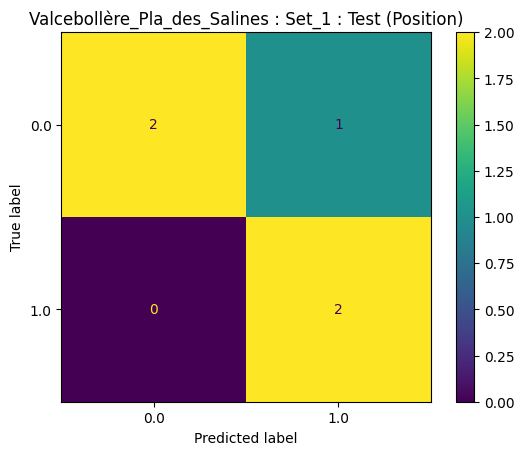

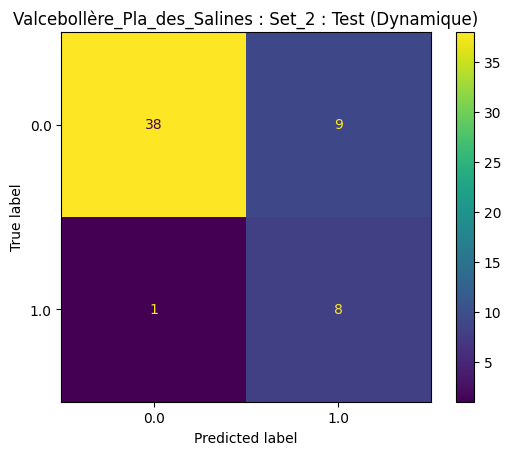



GLOBAL (36 stations) :

MLP Classifier : Position :
- Moyenne globale des précisions : 0.88
- Intervalle de confiance global (à 95%) : [0.86, 0.91]
- Top 5 global des features : [('V18', 5), ('V23', 5), ('V103', 5), ('V106', 5), ('V74', 5)]

MLP Classifier : Dynamique :
- Moyenne globale des précisions : 0.86
- Intervalle de confiance global (à 95%) : [0.83, 0.89]
- Top 5 global des features : [('V121', 5), ('V15', 4), ('V87', 3), ('V36', 3), ('V35', 3)]


In [7]:
import pandas as pd
import os
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
import numpy as np
from scipy import stats

# Chemin vers le répertoire contenant les dossiers de données sur Google Drive
data_directory = "/content/gdrive/MyDrive/ListenToTheWild/vggish_cross_validation_par_site"

# Liste des dossiers dans le répertoire
directories = sorted(os.listdir(data_directory))

# Initialisation du dictionnaire
main_dico = {}
for key in directories:
    main_dico[key] = {
        'list_acc': [],
        'mean_acc': 0,
        'mean_confidence_interval': (0, 0),
        'top_5_features_lists': [],
        'local_top_5_features': [],
        'conf_mat': np.array([]),
        'title_conf_mat': None,
        'list_acc_bis': [],
        'mean_acc_bis': 0,
        'mean_confidence_interval_bis': (0, 0),
        'top_5_features_lists_bis': [],
        'local_top_5_features_bis': [],
        'conf_mat_bis': np.array([]),
        'title_conf_mat_bis': None
    }
# Boucle sur chaque dossier
for directory in directories:
  # Chemin vers le dossier contenant les sous-dossiers de données sur Google Drive
  sub_data_directory = "/content/gdrive/MyDrive/ListenToTheWild/vggish_cross_validation_par_site/"+directory

  # Liste des sous-dossiers dans le dossier
  sub_directories = sorted(os.listdir(sub_data_directory), key=lambda x: int(x.split('_')[1]))

  # Boucle sur chaque sous-dossier
  for sub_directory in sub_directories:
    # Chemin vers le sous-dossier contenant les fichiers de train/test
    sub_directory_path = os.path.join(sub_data_directory, sub_directory)

    # Charger les données d'entraînement
    train_data = pd.read_csv(os.path.join(sub_directory_path, f"{directory}_{sub_directory}_train.csv"))
    # Ajouter les labels
    train_data_with_labels = add_labels(train_data)
    # Supprimer les colonnes "station_name" et "file_name"
    train_data_with_labels = train_data_with_labels.drop(['station_name', 'file_name'], axis=1)
    # Créer X et y
    X_train = train_data_with_labels.drop(columns=['label_position', 'label_dynamique'])  # attributs
    y_train = train_data_with_labels['label_position']  # étiquettes
    y_train_bis = train_data_with_labels['label_dynamique']  # étiquettes

    # Charger les données de test
    test_data = pd.read_csv(os.path.join(sub_directory_path, f"{directory}_{sub_directory}_test.csv"))
    # Ajouter les labels
    test_data_with_labels = add_labels(test_data)
    # Supprimer les colonnes "station_name" et "file_name"
    test_data_with_labels = test_data_with_labels.drop(['station_name', 'file_name'], axis=1)
    # Créer X et y
    X_test = test_data_with_labels.drop(columns=['label_position', 'label_dynamique'])  # attributs
    y_test = test_data_with_labels['label_position']  # étiquettes
    y_test_bis = test_data_with_labels['label_dynamique']  # étiquettes

    # Créer le modèle
    mlp_model = MLPClassifier()
    mlp_model_bis = MLPClassifier()

    # Entraîner sur l'ensemble de train et prédire sur l'ensemble de test
    mlp_accuracy, mlp_y_pred = train_and_predict(mlp_model, X_train, y_train, X_test, y_test)
    mlp_accuracy_bis, mlp_y_pred_bis = train_and_predict(mlp_model_bis, X_train, y_train_bis, X_test, y_test_bis)

    # Ajouter la valeur de la précision au main_dico
    main_dico[directory]['list_acc'].append(mlp_accuracy)
    main_dico[directory]['list_acc_bis'].append(mlp_accuracy_bis)

    # Importances des features
    input_layer_weights = mlp_model.coefs_[0]
    feature_names = list(X_train.columns)
    feature_importance = np.sum(np.abs(input_layer_weights), axis=1)
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    mlp_feature_importances = feature_importance_df.sort_values(by='Importance', ascending=False)

    input_layer_weights_bis = mlp_model_bis.coefs_[0]
    feature_names_bis = list(X_train.columns)
    feature_importance_bis = np.sum(np.abs(input_layer_weights_bis), axis=1)
    feature_importance_df_bis = pd.DataFrame({'Feature': feature_names_bis, 'Importance': feature_importance_bis})
    mlp_feature_importances_bis = feature_importance_df_bis.sort_values(by='Importance', ascending=False)

    # Ajouter le top 5 des features au main_dico
    top_5_features = mlp_feature_importances['Feature'].head(5)
    list_top_5_features = top_5_features.tolist()
    main_dico[directory]['top_5_features_lists'].append(list_top_5_features)

    top_5_features_bis = mlp_feature_importances_bis['Feature'].head(5)
    list_top_5_features_bis = top_5_features_bis.tolist()
    main_dico[directory]['top_5_features_lists_bis'].append(list_top_5_features_bis)

    # Calculer une matrice de confusion par station (si toutes les classes)
    train_classes = list(mlp_model.classes_)
    test_classes = list(set(y_test))
    if main_dico[directory]['conf_mat'].size == 0 and train_classes == test_classes:
      main_dico[directory]['conf_mat'] = confusion_matrix(y_test, mlp_y_pred, labels=mlp_model.classes_)
      main_dico[directory]['title_conf_mat'] = f"{directory} : {sub_directory} : Test"

    train_classes_bis = list(mlp_model_bis.classes_)
    test_classes_bis = list(set(y_test_bis))
    if main_dico[directory]['conf_mat_bis'].size == 0 and train_classes_bis == test_classes_bis:
      main_dico[directory]['conf_mat_bis'] = confusion_matrix(y_test_bis, mlp_y_pred_bis, labels=mlp_model_bis.classes_)
      main_dico[directory]['title_conf_mat_bis'] = f"{directory} : {sub_directory} : Test"

  # Calculer la moyenne des précisions pour le site "directory"
  sample_data = main_dico[directory]['list_acc']
  sample_mean = np.mean(sample_data)
  main_dico[directory]['mean_acc'] = sample_mean

  sample_data_bis = main_dico[directory]['list_acc_bis']
  sample_mean_bis = np.mean(sample_data_bis)
  main_dico[directory]['mean_acc_bis'] = sample_mean_bis

  # Calculer l'intervalle de confiance de la moyenne pour le site "directory"
  # (Intervalle de confiance t de Student car moins de 30 échantillons)
  sample_std = np.std(sample_data, ddof=1)  # ddof=1 pour utiliser la formule non biaisée de l'écart-type
  n = len(sample_data)
  confidence_level = 0.95
  degrees_of_freedom = n - 1
  t_critical = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)
  margin_of_error = t_critical * (sample_std / np.sqrt(n))
  main_dico[directory]['mean_confidence_interval'] = (sample_mean - margin_of_error, sample_mean + margin_of_error)

  sample_std_bis = np.std(sample_data_bis, ddof=1)  # ddof=1 pour utiliser la formule non biaisée de l'écart-type
  n_bis = len(sample_data_bis)
  confidence_level_bis = 0.95
  degrees_of_freedom_bis = n_bis - 1
  t_critical_bis = stats.t.ppf((1 + confidence_level_bis) / 2, degrees_of_freedom_bis)
  margin_of_error_bis = t_critical_bis * (sample_std_bis / np.sqrt(n_bis))
  main_dico[directory]['mean_confidence_interval_bis'] = (sample_mean_bis - margin_of_error_bis, sample_mean_bis + margin_of_error_bis)

  # Calculer le top 5 local (pour le site "directory") des features
  all_features = [feature for sublist in main_dico[directory]['top_5_features_lists'] for feature in sublist]
  feature_counter = Counter(all_features)
  top_5_features_tuples = feature_counter.most_common(5)
  top_5_features_names = []
  for feature_tuple in top_5_features_tuples:
    top_5_features_names.append(feature_tuple[0])
  main_dico[directory]['local_top_5_features'] = top_5_features_names

  all_features_bis = [feature for sublist in main_dico[directory]['top_5_features_lists_bis'] for feature in sublist]
  feature_counter_bis = Counter(all_features_bis)
  top_5_features_tuples_bis = feature_counter_bis.most_common(5)
  top_5_features_names_bis = []
  for feature_tuple in top_5_features_tuples_bis:
    top_5_features_names_bis.append(feature_tuple[0])
  main_dico[directory]['local_top_5_features_bis'] = top_5_features_names_bis

  # Affichage des différents résultats
  print(f"Dossier {directory} ({len(sub_directories)} cross validation) :")
  print()
  print("MLP Classifier : Position :")
  rounded_list = [round(x, 2) for x in main_dico[directory]['list_acc']]
  print(f"- Précisions sur les ensembles de test : {rounded_list}")
  print(f"- Moyenne des précisions : {round(main_dico[directory]['mean_acc'], 2)}")
  rounded_confidence_interval = tuple(round(value, 2) for value in main_dico[directory]['mean_confidence_interval'])
  print(f"- Intervalle de confiance (à {int(confidence_level*100)}%) : [{rounded_confidence_interval[0]}, {rounded_confidence_interval[1]}]")
  print(f"- Top 5 local des features : {main_dico[directory]['local_top_5_features']}")
  print()
  print("MLP Classifier : Dynamique :")
  rounded_list_bis = [round(x, 2) for x in main_dico[directory]['list_acc_bis']]
  print(f"- Précisions sur les ensembles de test : {rounded_list_bis}")
  print(f"- Moyenne des précisions : {round(main_dico[directory]['mean_acc_bis'], 2)}")
  rounded_confidence_interval_bis = tuple(round(value, 2) for value in main_dico[directory]['mean_confidence_interval_bis'])
  print(f"- Intervalle de confiance (à {int(confidence_level_bis*100)}%) : [{rounded_confidence_interval_bis[0]}, {rounded_confidence_interval_bis[1]}]")
  print(f"- Top 5 local des features : {main_dico[directory]['local_top_5_features_bis']}")

  print()

  # Affichage de la matrice de confusion
  if main_dico[directory]['conf_mat'].size != 0:
    ConfusionMatrixDisplay(main_dico[directory]['conf_mat'], display_labels=mlp_model.classes_).plot();
    plt.title(main_dico[directory]['title_conf_mat'] + " (Position)")
    plt.show()
  else:
    print("Pas de matrice de confusion présentant toutes les classes. (Position)")

  print()

  # Affichage de la matrice de confusion
  if main_dico[directory]['conf_mat_bis'].size != 0:
    ConfusionMatrixDisplay(main_dico[directory]['conf_mat_bis'], display_labels=mlp_model_bis.classes_).plot();
    plt.title(main_dico[directory]['title_conf_mat_bis'] + " (Dynamique)")
    plt.show()
  else:
    print("Pas de matrice de confusion présentant toutes les classes. (Dynamique)")

  print()
  print("=======================================================================================================================================================")
  print()

# Calculer la moyenne globale des précisions sur tous les sites
global_list_acc = []
for key, value in main_dico.items():
    global_list_acc.append(value['mean_acc'])
global_mean_acc = np.mean(global_list_acc)

global_list_acc_bis = []
for key, value in main_dico.items():
    global_list_acc_bis.append(value['mean_acc_bis'])
global_mean_acc_bis = np.mean(global_list_acc_bis)

# Calculer l'intervalle de confiance de la moyenne globale
# (Intervalle de confiance z car plus de 30 échantillons)
sample_mean = global_mean_acc
sample_std = np.std(global_list_acc, ddof=1)  # ddof=1 pour utiliser la formule non biaisée de l'écart-type
n = len(global_list_acc)
confidence_level = 0.95
z_critical = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_critical * (sample_std / np.sqrt(n))
global_confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

sample_mean_bis = global_mean_acc_bis
sample_std_bis = np.std(global_list_acc_bis, ddof=1)  # ddof=1 pour utiliser la formule non biaisée de l'écart-type
n_bis = len(global_list_acc_bis)
confidence_level_bis = 0.95
z_critical_bis = stats.norm.ppf((1 + confidence_level_bis) / 2)
margin_of_error_bis = z_critical_bis * (sample_std_bis / np.sqrt(n_bis))
global_confidence_interval_bis = (sample_mean_bis - margin_of_error_bis, sample_mean_bis + margin_of_error_bis)

# Calculer le top 5 global des features
global_top_5_features_lists = []
for key, value in main_dico.items():
    global_top_5_features_lists.append(value['local_top_5_features'])
all_features = [feature for sublist in global_top_5_features_lists for feature in sublist]
feature_counter = Counter(all_features)
global_top_5_features = feature_counter.most_common(5)

global_top_5_features_lists_bis = []
for key, value in main_dico.items():
    global_top_5_features_lists_bis.append(value['local_top_5_features_bis'])
all_features_bis = [feature for sublist in global_top_5_features_lists_bis for feature in sublist]
feature_counter_bis = Counter(all_features_bis)
global_top_5_features_bis = feature_counter_bis.most_common(5)

# Affichage des différents résultats
print(f"GLOBAL ({len(directories)} stations) :")
print()
print("MLP Classifier : Position :")
print(f"- Moyenne globale des précisions : {round(global_mean_acc, 2)}")
rounded_global_confidence_interval = tuple(round(value, 2) for value in global_confidence_interval)
print(f"- Intervalle de confiance global (à {int(confidence_level*100)}%) : [{rounded_global_confidence_interval[0]}, {rounded_global_confidence_interval[1]}]")
print(f"- Top 5 global des features : {global_top_5_features}")
print()
print("MLP Classifier : Dynamique :")
print(f"- Moyenne globale des précisions : {round(global_mean_acc_bis, 2)}")
rounded_global_confidence_interval_bis = tuple(round(value, 2) for value in global_confidence_interval_bis)
print(f"- Intervalle de confiance global (à {int(confidence_level_bis*100)}%) : [{rounded_global_confidence_interval_bis[0]}, {rounded_global_confidence_interval_bis[1]}]")
print(f"- Top 5 global des features : {global_top_5_features_bis}")

# 3. Gradient Boosting Classifier

Dossier Antras_Isard (15 cross validation) :

Gradient Boosting Classifier : Position :
- Précisions sur les ensembles de test : [0.89, 0.94, 0.99, 0.94, 0.9, 0.96, 1.0, 1.0, 0.99, 0.99, 0.98, 0.99, 0.92, 0.99, 1.0]
- Moyenne des précisions : 0.96
- Intervalle de confiance (à 95%) : [0.94, 0.99]
- Top 5 local des features : ['V32', 'V36', 'V24', 'V93', 'V87']

Gradient Boosting Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.68, 0.91, 0.97, 0.95, 0.94, 0.99, 0.94, 1.0, 1.0, 0.99, 0.95, 1.0, 1.0, 0.99, 1.0]
- Moyenne des précisions : 0.95
- Intervalle de confiance (à 95%) : [0.91, 1.0]
- Top 5 local des features : ['V34', 'V33', 'V23', 'V5', 'V98']



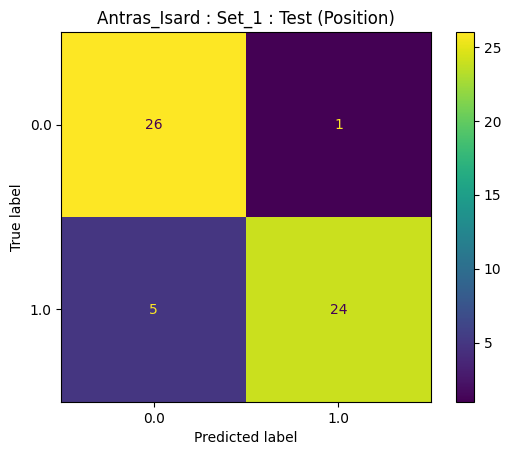

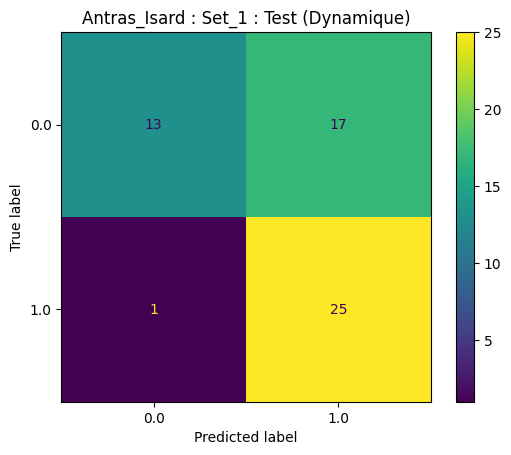



Dossier Appy_Etang_dAppy (8 cross validation) :

Gradient Boosting Classifier : Position :
- Précisions sur les ensembles de test : [0.74, 0.9, 0.94, 0.96, 0.94, 0.98, 0.99, 0.94]
- Moyenne des précisions : 0.92
- Intervalle de confiance (à 95%) : [0.86, 0.99]
- Top 5 local des features : ['V3', 'V112', 'V39', 'V24', 'V47']

Gradient Boosting Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.98, 0.96, 0.96, 0.98, 0.85, 0.95, 0.95, 0.94]
- Moyenne des précisions : 0.95
- Intervalle de confiance (à 95%) : [0.91, 0.98]
- Top 5 local des features : ['V102', 'V36', 'V52', 'V51', 'V30']



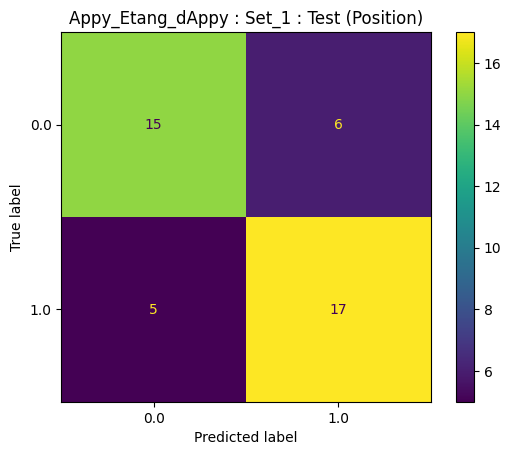

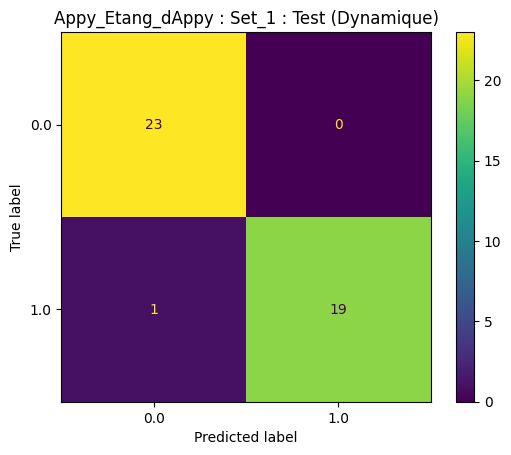



Dossier Arrien_Pic_Midi_Bordes (16 cross validation) :

Gradient Boosting Classifier : Position :
- Précisions sur les ensembles de test : [0.87, 0.9, 0.91, 0.84, 0.96, 0.9, 0.91, 0.91, 0.87, 0.9, 0.94, 0.91, 0.96, 0.96, 0.85, 0.85]
- Moyenne des précisions : 0.9
- Intervalle de confiance (à 95%) : [0.88, 0.92]
- Top 5 local des features : ['V39', 'V12', 'V58', 'V114', 'V103']

Gradient Boosting Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.93, 0.96, 0.91, 0.9, 0.85, 0.94, 0.83, 0.87, 0.92, 0.93, 0.93, 0.91, 0.86, 0.89, 0.92, 0.95]
- Moyenne des précisions : 0.91
- Intervalle de confiance (à 95%) : [0.89, 0.92]
- Top 5 local des features : ['V30', 'V107', 'V12', 'V50', 'V53']



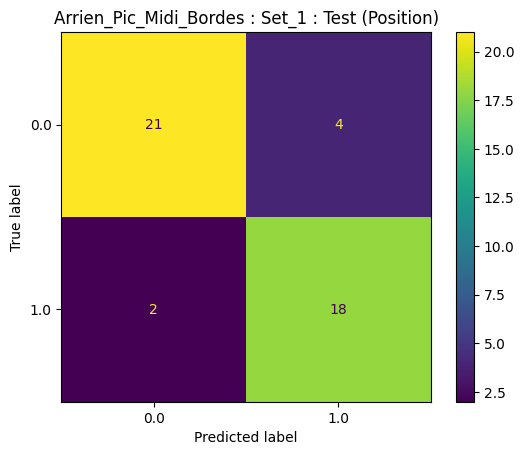

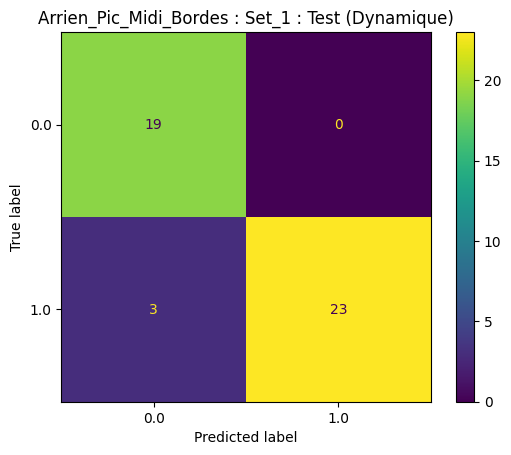



Dossier Ascou_Pailheres (4 cross validation) :

Gradient Boosting Classifier : Position :
- Précisions sur les ensembles de test : [0.93, 0.78, 0.88, 0.93]
- Moyenne des précisions : 0.88
- Intervalle de confiance (à 95%) : [0.77, 0.99]
- Top 5 local des features : ['V23', 'V76', 'V16', 'V42', 'V91']

Gradient Boosting Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.86, 0.83, 0.87, 0.78]
- Moyenne des précisions : 0.84
- Intervalle de confiance (à 95%) : [0.77, 0.9]
- Top 5 local des features : ['V19', 'V85', 'V114', 'V12', 'V125']



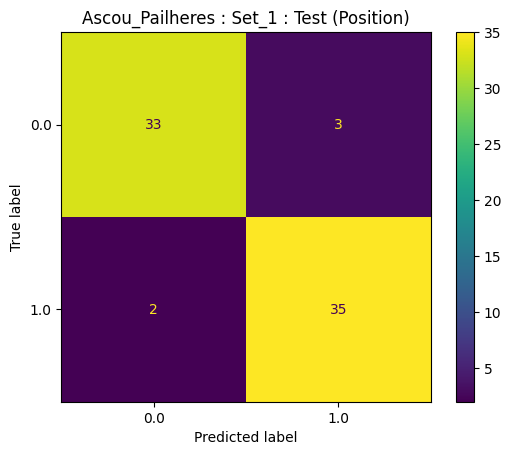

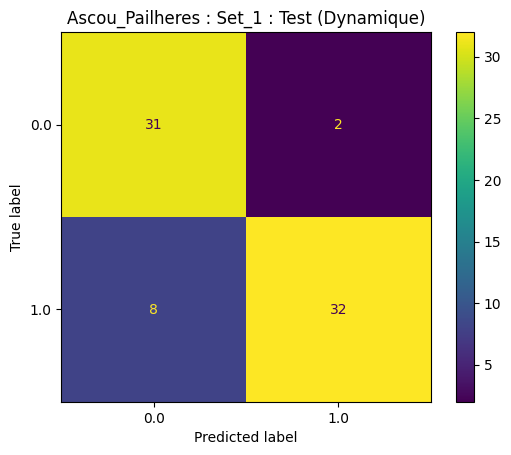



Dossier Aston_Plateau_de_Beille (7 cross validation) :

Gradient Boosting Classifier : Position :
- Précisions sur les ensembles de test : [0.98, 0.92, 0.91, 0.96, 0.96, 0.95, 0.97]
- Moyenne des précisions : 0.95
- Intervalle de confiance (à 95%) : [0.92, 0.97]
- Top 5 local des features : ['V49', 'V32', 'V22', 'V8', 'V24']

Gradient Boosting Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.98, 0.93, 0.98, 0.93, 0.84, 0.92, 0.94]
- Moyenne des précisions : 0.93
- Intervalle de confiance (à 95%) : [0.89, 0.97]
- Top 5 local des features : ['V85', 'V43', 'V104', 'V12', 'V15']



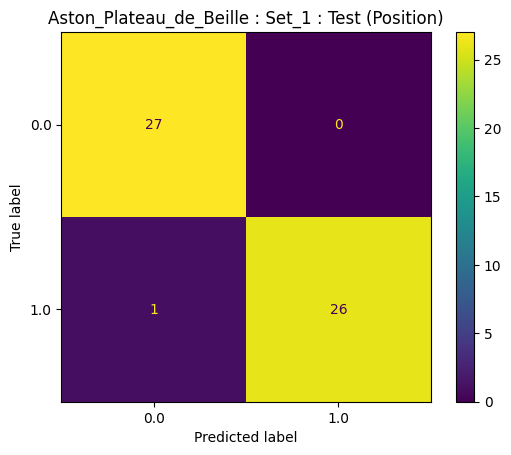

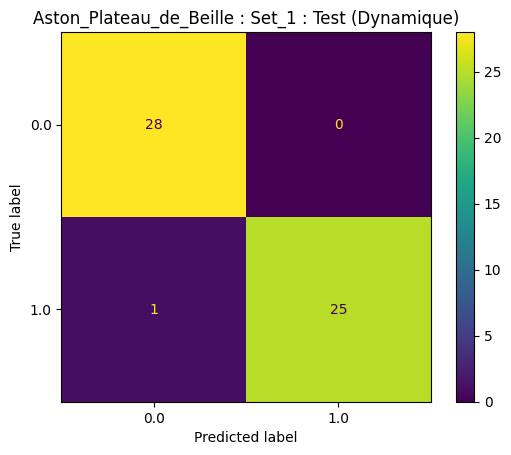



Dossier Aulus_Turon_Rose (8 cross validation) :

Gradient Boosting Classifier : Position :
- Précisions sur les ensembles de test : [0.98, 0.95, 0.94, 1.0, 0.96, 0.99, 0.92, 0.91]
- Moyenne des précisions : 0.95
- Intervalle de confiance (à 95%) : [0.93, 0.98]
- Top 5 local des features : ['V34', 'V88', 'V12', 'V24', 'V16']

Gradient Boosting Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.88, 0.79, 0.9, 0.95, 0.83, 0.85, 0.92, 0.93]
- Moyenne des précisions : 0.88
- Intervalle de confiance (à 95%) : [0.84, 0.92]
- Top 5 local des features : ['V62', 'V108', 'V105', 'V58', 'V20']



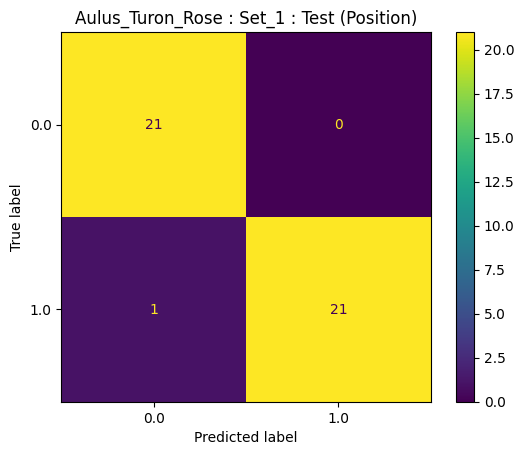

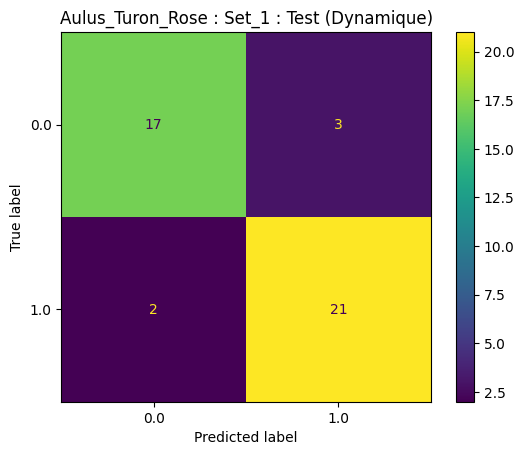



Dossier Bestiac_Trimouns (6 cross validation) :

Gradient Boosting Classifier : Position :
- Précisions sur les ensembles de test : [0.91, 0.96, 0.99, 0.95, 0.97, 0.9]
- Moyenne des précisions : 0.95
- Intervalle de confiance (à 95%) : [0.91, 0.98]
- Top 5 local des features : ['V49', 'V40', 'V37', 'V12', 'V45']

Gradient Boosting Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.89, 0.82, 0.82, 0.94, 0.88, 0.92]
- Moyenne des précisions : 0.88
- Intervalle de confiance (à 95%) : [0.83, 0.93]
- Top 5 local des features : ['V17', 'V119', 'V67', 'V70', 'V4']



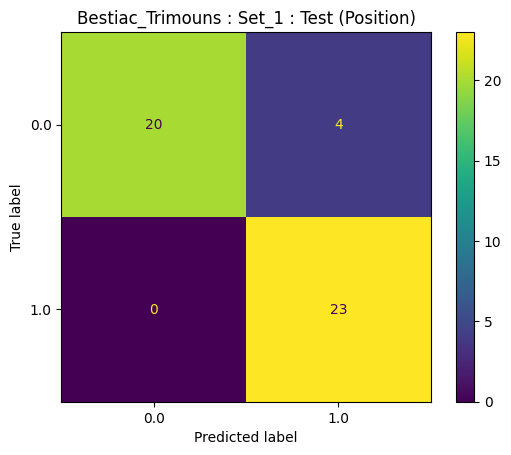

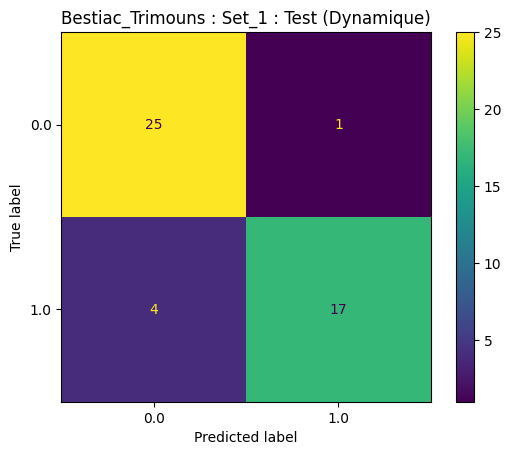



Dossier Bethmale_Ayet (5 cross validation) :

Gradient Boosting Classifier : Position :
- Précisions sur les ensembles de test : [0.95, 0.94, 0.97, 0.94, 1.0]
- Moyenne des précisions : 0.96
- Intervalle de confiance (à 95%) : [0.93, 0.99]
- Top 5 local des features : ['V23', 'V12', 'V1', 'V88', 'V34']

Gradient Boosting Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.78, 0.9, 0.85, 0.88, 0.97]
- Moyenne des précisions : 0.88
- Intervalle de confiance (à 95%) : [0.79, 0.96]
- Top 5 local des features : ['V3', 'V87', 'V75', 'V41', 'V14']



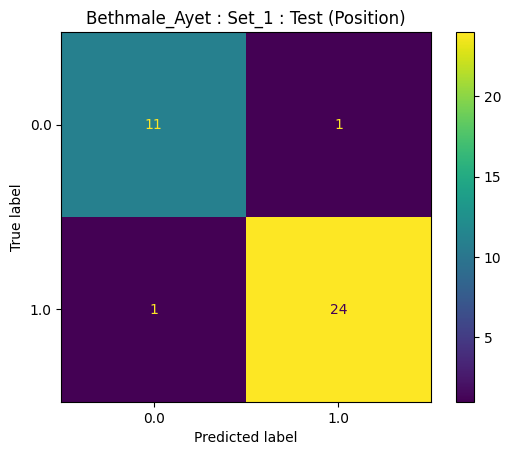

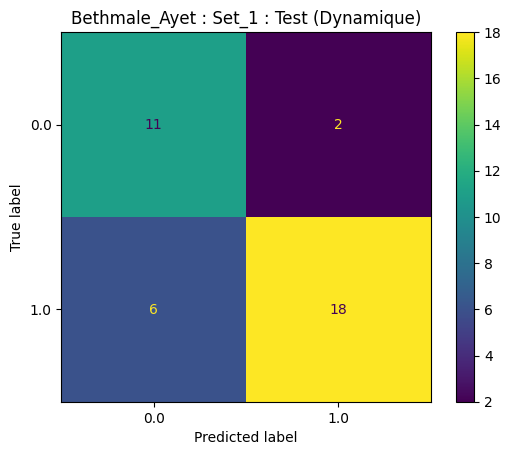



Dossier Bethmale_Eychelle (6 cross validation) :

Gradient Boosting Classifier : Position :
- Précisions sur les ensembles de test : [0.62, 0.33, 0.86, 0.92, 0.93, 0.95]
- Moyenne des précisions : 0.77
- Intervalle de confiance (à 95%) : [0.51, 1.03]
- Top 5 local des features : ['V12', 'V80', 'V93', 'V62', 'V56']

Gradient Boosting Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.94, 0.53, 0.71, 0.84, 0.89, 0.88]
- Moyenne des précisions : 0.8
- Intervalle de confiance (à 95%) : [0.64, 0.96]
- Top 5 local des features : ['V20', 'V99', 'V6', 'V85', 'V47']



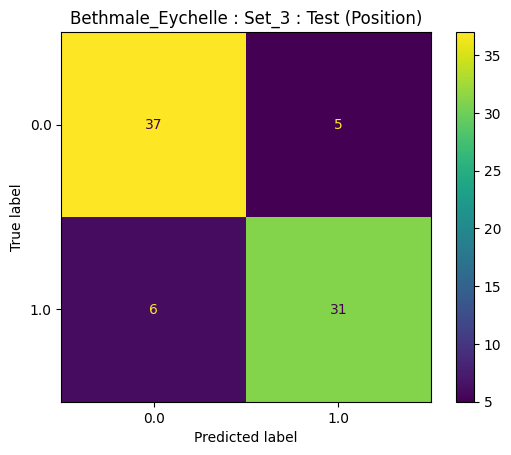

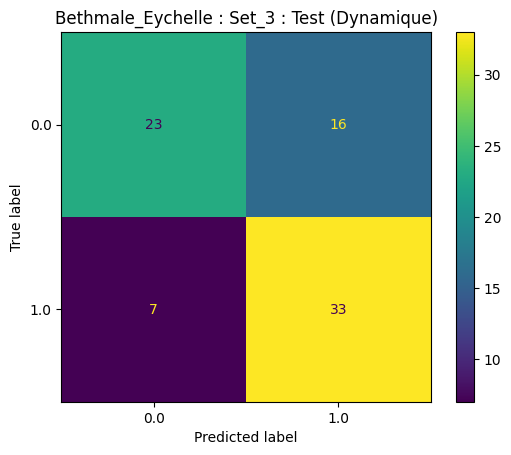



Dossier Bonac_Arech (9 cross validation) :

Gradient Boosting Classifier : Position :
- Précisions sur les ensembles de test : [0.82, 0.92, 0.88, 0.95, 0.94, 0.97, 0.97, 0.85, 0.79]
- Moyenne des précisions : 0.9
- Intervalle de confiance (à 95%) : [0.85, 0.95]
- Top 5 local des features : ['V109', 'V52', 'V23', 'V53', 'V12']

Gradient Boosting Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.84, 0.92, 0.91, 0.88, 0.84, 0.91, 0.93, 0.88, 0.96]
- Moyenne des précisions : 0.89
- Intervalle de confiance (à 95%) : [0.86, 0.92]
- Top 5 local des features : ['V10', 'V33', 'V56', 'V47', 'V65']



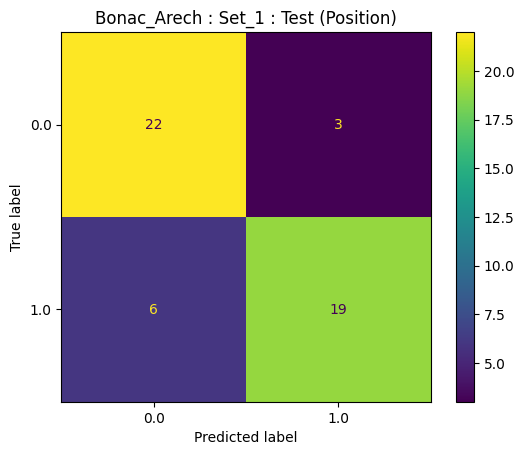

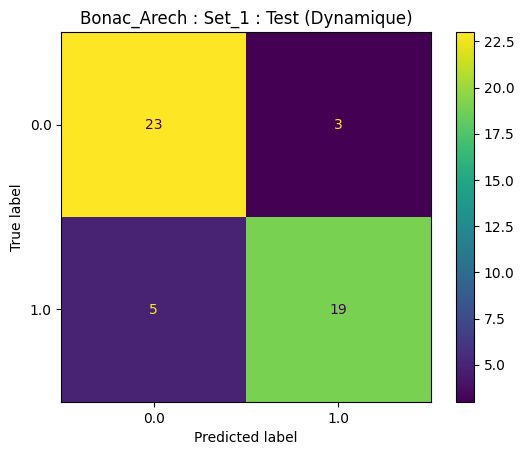



Dossier Bonac_Orle (8 cross validation) :

Gradient Boosting Classifier : Position :
- Précisions sur les ensembles de test : [0.92, 0.94, 0.84, 0.94, 0.95, 0.91, 0.9, 0.97]
- Moyenne des précisions : 0.92
- Intervalle de confiance (à 95%) : [0.89, 0.95]
- Top 5 local des features : ['V24', 'V9', 'V90', 'V72', 'V8']

Gradient Boosting Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.97, 0.93, 0.85, 0.94, 0.93, 0.94, 0.97, 0.99]
- Moyenne des précisions : 0.94
- Intervalle de confiance (à 95%) : [0.9, 0.97]
- Top 5 local des features : ['V64', 'V72', 'V24', 'V22', 'V85']



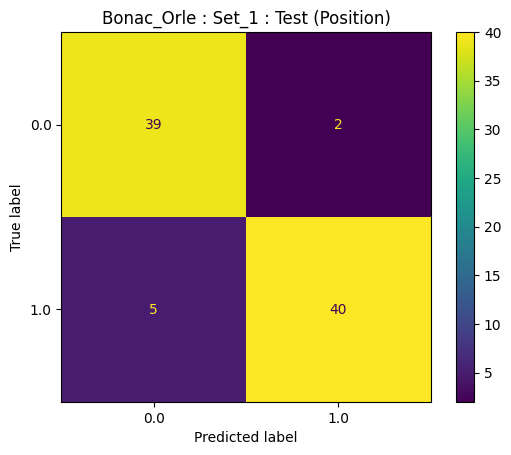

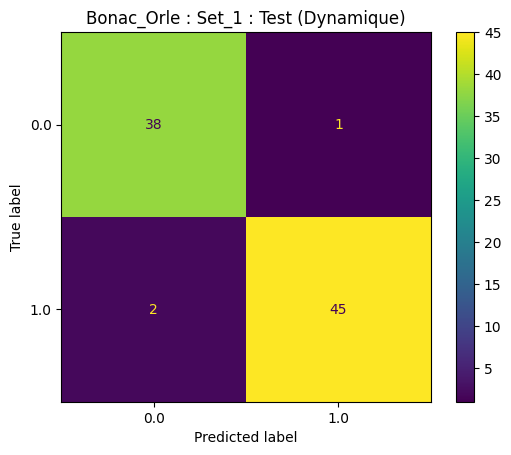



Dossier Couflens_Pouill (4 cross validation) :

Gradient Boosting Classifier : Position :
- Précisions sur les ensembles de test : [0.82, 0.92, 0.9, 0.96]
- Moyenne des précisions : 0.9
- Intervalle de confiance (à 95%) : [0.8, 0.99]
- Top 5 local des features : ['V32', 'V36', 'V100', 'V112', 'V67']

Gradient Boosting Classifier : Dynamique :
- Précisions sur les ensembles de test : [0.89, 0.9, 0.91, 0.96]
- Moyenne des précisions : 0.91
- Intervalle de confiance (à 95%) : [0.86, 0.97]
- Top 5 local des features : ['V9', 'V22', 'V108', 'V122', 'V33']



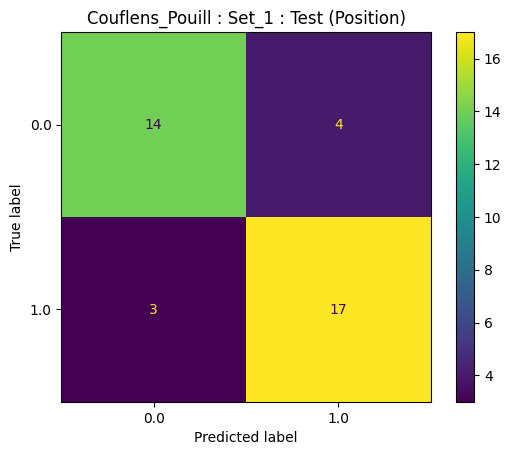

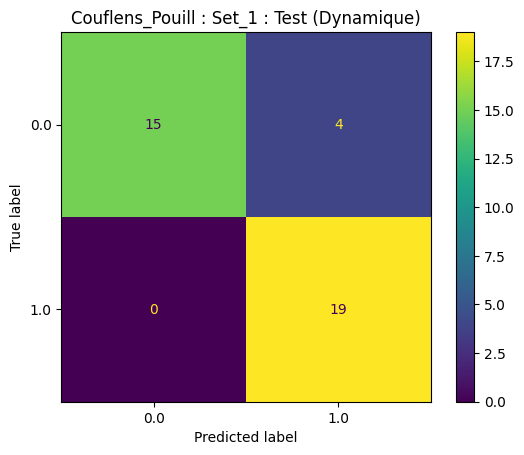

ValueError: y contains 1 class after sample_weight trimmed classes with zero weights, while a minimum of 2 classes are required.

In [8]:
import pandas as pd
import os
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
import numpy as np
from scipy import stats

# Chemin vers le répertoire contenant les dossiers de données sur Google Drive
data_directory = "/content/gdrive/MyDrive/ListenToTheWild/vggish_cross_validation_par_site"

# Liste des dossiers dans le répertoire
directories = sorted(os.listdir(data_directory))

# Initialisation du dictionnaire
main_dico = {}
for key in directories:
    main_dico[key] = {
        'list_acc': [],
        'mean_acc': 0,
        'mean_confidence_interval': (0, 0),
        'top_5_features_lists': [],
        'local_top_5_features': [],
        'conf_mat': np.array([]),
        'title_conf_mat': None,
        'list_acc_bis': [],
        'mean_acc_bis': 0,
        'mean_confidence_interval_bis': (0, 0),
        'top_5_features_lists_bis': [],
        'local_top_5_features_bis': [],
        'conf_mat_bis': np.array([]),
        'title_conf_mat_bis': None
    }
# Boucle sur chaque dossier
for directory in directories:
  # Chemin vers le dossier contenant les sous-dossiers de données sur Google Drive
  sub_data_directory = "/content/gdrive/MyDrive/ListenToTheWild/vggish_cross_validation_par_site/"+directory

  # Liste des sous-dossiers dans le dossier
  sub_directories = sorted(os.listdir(sub_data_directory), key=lambda x: int(x.split('_')[1]))

  # Boucle sur chaque sous-dossier
  for sub_directory in sub_directories:
    # Chemin vers le sous-dossier contenant les fichiers de train/test
    sub_directory_path = os.path.join(sub_data_directory, sub_directory)

    # Charger les données d'entraînement
    train_data = pd.read_csv(os.path.join(sub_directory_path, f"{directory}_{sub_directory}_train.csv"))
    # Ajouter les labels
    train_data_with_labels = add_labels(train_data)
    # Supprimer les colonnes "station_name" et "file_name"
    train_data_with_labels = train_data_with_labels.drop(['station_name', 'file_name'], axis=1)
    # Créer X et y
    X_train = train_data_with_labels.drop(columns=['label_position', 'label_dynamique'])  # attributs
    y_train = train_data_with_labels['label_position']  # étiquettes
    y_train_bis = train_data_with_labels['label_dynamique']  # étiquettes

    # Charger les données de test
    test_data = pd.read_csv(os.path.join(sub_directory_path, f"{directory}_{sub_directory}_test.csv"))
    # Ajouter les labels
    test_data_with_labels = add_labels(test_data)
    # Supprimer les colonnes "station_name" et "file_name"
    test_data_with_labels = test_data_with_labels.drop(['station_name', 'file_name'], axis=1)
    # Créer X et y
    X_test = test_data_with_labels.drop(columns=['label_position', 'label_dynamique'])  # attributs
    y_test = test_data_with_labels['label_position']  # étiquettes
    y_test_bis = test_data_with_labels['label_dynamique']  # étiquettes

    # Créer le modèle
    gb_model = GradientBoostingClassifier()
    gb_model_bis = GradientBoostingClassifier()

    # Entraîner sur l'ensemble de train et prédire sur l'ensemble de test
    gb_accuracy, gb_y_pred = train_and_predict(gb_model, X_train, y_train, X_test, y_test)
    gb_accuracy_bis, gb_y_pred_bis = train_and_predict(gb_model_bis, X_train, y_train_bis, X_test, y_test_bis)

    # Ajouter la valeur de la précision au main_dico
    main_dico[directory]['list_acc'].append(gb_accuracy)
    main_dico[directory]['list_acc_bis'].append(gb_accuracy_bis)

    # Créer series contenant les importances des features du modèle et les noms des features à partir des données d'entraînement
    gb_feature_importances = pd.Series(gb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    gb_feature_importances_bis = pd.Series(gb_model_bis.feature_importances_, index=X_train.columns).sort_values(ascending=False)

    # Ajouter le top 5 des features au main_dico
    top_5_features = gb_feature_importances.head(5)
    list_top_5_features = top_5_features.index.tolist()
    main_dico[directory]['top_5_features_lists'].append(list_top_5_features)

    top_5_features_bis = gb_feature_importances_bis.head(5)
    list_top_5_features_bis = top_5_features_bis.index.tolist()
    main_dico[directory]['top_5_features_lists_bis'].append(list_top_5_features_bis)

    # Calculer une matrice de confusion par station (si toutes les classes)
    train_classes = list(gb_model.classes_)
    test_classes = list(set(y_test))
    if main_dico[directory]['conf_mat'].size == 0 and train_classes == test_classes:
      main_dico[directory]['conf_mat'] = confusion_matrix(y_test, gb_y_pred, labels=gb_model.classes_)
      main_dico[directory]['title_conf_mat'] = f"{directory} : {sub_directory} : Test"

    train_classes_bis = list(gb_model_bis.classes_)
    test_classes_bis = list(set(y_test_bis))
    if main_dico[directory]['conf_mat_bis'].size == 0 and train_classes_bis == test_classes_bis:
      main_dico[directory]['conf_mat_bis'] = confusion_matrix(y_test_bis, gb_y_pred_bis, labels=gb_model_bis.classes_)
      main_dico[directory]['title_conf_mat_bis'] = f"{directory} : {sub_directory} : Test"

  # Calculer la moyenne des précisions pour le site "directory"
  sample_data = main_dico[directory]['list_acc']
  sample_mean = np.mean(sample_data)
  main_dico[directory]['mean_acc'] = sample_mean

  sample_data_bis = main_dico[directory]['list_acc_bis']
  sample_mean_bis = np.mean(sample_data_bis)
  main_dico[directory]['mean_acc_bis'] = sample_mean_bis

  # Calculer l'intervalle de confiance de la moyenne pour le site "directory"
  # (Intervalle de confiance t de Student car moins de 30 échantillons)
  sample_std = np.std(sample_data, ddof=1)  # ddof=1 pour utiliser la formule non biaisée de l'écart-type
  n = len(sample_data)
  confidence_level = 0.95
  degrees_of_freedom = n - 1
  t_critical = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)
  margin_of_error = t_critical * (sample_std / np.sqrt(n))
  main_dico[directory]['mean_confidence_interval'] = (sample_mean - margin_of_error, sample_mean + margin_of_error)

  sample_std_bis = np.std(sample_data_bis, ddof=1)  # ddof=1 pour utiliser la formule non biaisée de l'écart-type
  n_bis = len(sample_data_bis)
  confidence_level_bis = 0.95
  degrees_of_freedom_bis = n_bis - 1
  t_critical_bis = stats.t.ppf((1 + confidence_level_bis) / 2, degrees_of_freedom_bis)
  margin_of_error_bis = t_critical_bis * (sample_std_bis / np.sqrt(n_bis))
  main_dico[directory]['mean_confidence_interval_bis'] = (sample_mean_bis - margin_of_error_bis, sample_mean_bis + margin_of_error_bis)

  # Calculer le top 5 local (pour le site "directory") des features
  all_features = [feature for sublist in main_dico[directory]['top_5_features_lists'] for feature in sublist]
  feature_counter = Counter(all_features)
  top_5_features_tuples = feature_counter.most_common(5)
  top_5_features_names = []
  for feature_tuple in top_5_features_tuples:
    top_5_features_names.append(feature_tuple[0])
  main_dico[directory]['local_top_5_features'] = top_5_features_names

  all_features_bis = [feature for sublist in main_dico[directory]['top_5_features_lists_bis'] for feature in sublist]
  feature_counter_bis = Counter(all_features_bis)
  top_5_features_tuples_bis = feature_counter_bis.most_common(5)
  top_5_features_names_bis = []
  for feature_tuple in top_5_features_tuples_bis:
    top_5_features_names_bis.append(feature_tuple[0])
  main_dico[directory]['local_top_5_features_bis'] = top_5_features_names_bis

  # Affichage des différents résultats
  print(f"Dossier {directory} ({len(sub_directories)} cross validation) :")
  print()
  print("Gradient Boosting Classifier : Position :")
  rounded_list = [round(x, 2) for x in main_dico[directory]['list_acc']]
  print(f"- Précisions sur les ensembles de test : {rounded_list}")
  print(f"- Moyenne des précisions : {round(main_dico[directory]['mean_acc'], 2)}")
  rounded_confidence_interval = tuple(round(value, 2) for value in main_dico[directory]['mean_confidence_interval'])
  print(f"- Intervalle de confiance (à {int(confidence_level*100)}%) : [{rounded_confidence_interval[0]}, {rounded_confidence_interval[1]}]")
  print(f"- Top 5 local des features : {main_dico[directory]['local_top_5_features']}")
  print()
  print("Gradient Boosting Classifier : Dynamique :")
  rounded_list_bis = [round(x, 2) for x in main_dico[directory]['list_acc_bis']]
  print(f"- Précisions sur les ensembles de test : {rounded_list_bis}")
  print(f"- Moyenne des précisions : {round(main_dico[directory]['mean_acc_bis'], 2)}")
  rounded_confidence_interval_bis = tuple(round(value, 2) for value in main_dico[directory]['mean_confidence_interval_bis'])
  print(f"- Intervalle de confiance (à {int(confidence_level_bis*100)}%) : [{rounded_confidence_interval_bis[0]}, {rounded_confidence_interval_bis[1]}]")
  print(f"- Top 5 local des features : {main_dico[directory]['local_top_5_features_bis']}")

  print()

  # Affichage de la matrice de confusion
  if main_dico[directory]['conf_mat'].size != 0:
    ConfusionMatrixDisplay(main_dico[directory]['conf_mat'], display_labels=gb_model.classes_).plot();
    plt.title(main_dico[directory]['title_conf_mat'] + " (Position)")
    plt.show()
  else:
    print("Pas de matrice de confusion présentant toutes les classes. (Position)")

  print()

  # Affichage de la matrice de confusion
  if main_dico[directory]['conf_mat_bis'].size != 0:
    ConfusionMatrixDisplay(main_dico[directory]['conf_mat_bis'], display_labels=gb_model_bis.classes_).plot();
    plt.title(main_dico[directory]['title_conf_mat_bis'] + " (Dynamique)")
    plt.show()
  else:
    print("Pas de matrice de confusion présentant toutes les classes. (Dynamique)")

  print()
  print("=======================================================================================================================================================")
  print()

# Calculer la moyenne globale des précisions sur tous les sites
global_list_acc = []
for key, value in main_dico.items():
    global_list_acc.append(value['mean_acc'])
global_mean_acc = np.mean(global_list_acc)

global_list_acc_bis = []
for key, value in main_dico.items():
    global_list_acc_bis.append(value['mean_acc_bis'])
global_mean_acc_bis = np.mean(global_list_acc_bis)

# Calculer l'intervalle de confiance de la moyenne globale
# (Intervalle de confiance z car plus de 30 échantillons)
sample_mean = global_mean_acc
sample_std = np.std(global_list_acc, ddof=1)  # ddof=1 pour utiliser la formule non biaisée de l'écart-type
n = len(global_list_acc)
confidence_level = 0.95
z_critical = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_critical * (sample_std / np.sqrt(n))
global_confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

sample_mean_bis = global_mean_acc_bis
sample_std_bis = np.std(global_list_acc_bis, ddof=1)  # ddof=1 pour utiliser la formule non biaisée de l'écart-type
n_bis = len(global_list_acc_bis)
confidence_level_bis = 0.95
z_critical_bis = stats.norm.ppf((1 + confidence_level_bis) / 2)
margin_of_error_bis = z_critical_bis * (sample_std_bis / np.sqrt(n_bis))
global_confidence_interval_bis = (sample_mean_bis - margin_of_error_bis, sample_mean_bis + margin_of_error_bis)

# Calculer le top 5 global des features
global_top_5_features_lists = []
for key, value in main_dico.items():
    global_top_5_features_lists.append(value['local_top_5_features'])
all_features = [feature for sublist in global_top_5_features_lists for feature in sublist]
feature_counter = Counter(all_features)
global_top_5_features = feature_counter.most_common(5)

global_top_5_features_lists_bis = []
for key, value in main_dico.items():
    global_top_5_features_lists_bis.append(value['local_top_5_features_bis'])
all_features_bis = [feature for sublist in global_top_5_features_lists_bis for feature in sublist]
feature_counter_bis = Counter(all_features_bis)
global_top_5_features_bis = feature_counter_bis.most_common(5)

# Affichage des différents résultats
print(f"GLOBAL ({len(directories)} stations) :")
print()
print("Gradient Boosting Classifier : Position :")
print(f"- Moyenne globale des précisions : {round(global_mean_acc, 2)}")
rounded_global_confidence_interval = tuple(round(value, 2) for value in global_confidence_interval)
print(f"- Intervalle de confiance global (à {int(confidence_level*100)}%) : [{rounded_global_confidence_interval[0]}, {rounded_global_confidence_interval[1]}]")
print(f"- Top 5 global des features : {global_top_5_features}")
print()
print("Gradient Boosting Classifier : Dynamique :")
print(f"- Moyenne globale des précisions : {round(global_mean_acc_bis, 2)}")
rounded_global_confidence_interval_bis = tuple(round(value, 2) for value in global_confidence_interval_bis)
print(f"- Intervalle de confiance global (à {int(confidence_level_bis*100)}%) : [{rounded_global_confidence_interval_bis[0]}, {rounded_global_confidence_interval_bis[1]}]")
print(f"- Top 5 global des features : {global_top_5_features_bis}")